In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from datetime import date
from datetime import datetime
import itertools
import statsmodels.api as sm
import warnings
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
import scipy as sc


C:\Users\inf_s\Anaconda2\envs\python3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from sklearn.linear_model import Lasso
from sklearn import metrics


In [3]:
irf=pd.read_csv('c:/python/sgi_in_russia.csv',sep='\t',index_col='year',decimal=',')
irf.head()

FSI     SGR    EROI   PRP      ES   ROEnv     RoL   ROEsr     RER  \
year                                                                       
1996  0.25  0.1434  0.4300  0.17  2300.0  0.0350  0.0365  0.0225  0.2315   
1997  0.26  0.1400  0.4500  0.16  2330.0  0.0500  0.0479  0.0275  0.2973   
1998  0.21  0.1647  0.4400  0.17  2350.0  0.0562  0.0694  0.0350  0.4166   
1999  0.19  0.1754  0.4375  0.17  2380.0  0.0339  0.0656  0.0413  0.5338   
2000  0.23  0.1323  0.4375  0.17  2390.0  0.0525  0.0485  0.0470  0.3864   

        CR   ...       ROA     ROE     EBIT    WACC      RG     NPG     NAG  \
year         ...                                                              
1996  1.48   ...    0.1373  0.1851   7.9230  0.0845  1.1690 -0.2340 -0.1180   
1997  1.90   ...    0.1274  0.1719  11.6525  0.0855  1.1659  0.2340  0.1180   
1998  1.34   ...    0.1507  0.2648  16.9833  0.0894  0.7895  0.1442  0.1447   
1999  1.40   ...    0.1481  0.2338  17.0332  0.0893  0.8730  0.0607  0.0150   
2000  1.43   ...    0.0962  0.1543  12.3710  0.1050  1.0248 -0.0953 -0.0227   

          FL     DOL     DER  
year                          
1996  1.4299  0.3763  0.3692  
1997  1.4216  0.3716  0.3214  
1998  1.4954  0.3924  0.7326  
1999  1.4364  0.0040  0.5819  
2000  1.5192 -0.1936  0.6012  

[5 rows x 24 columns]

In [4]:
icf=pd.read_csv('c:/python/sgi_in_china.csv',sep=';',decimal=',',index_col='year')
icf.head()

FSI     SGR  EROI     PRP      ES  ROEnv   RoL  ROEsr  RER   CR  \
year                                                                     
1996  0.11  0.0020  0.10  0.1837  1800.0    0.0  0.00   0.03  0.0  0.8   
1997  0.10  0.0018  0.11  0.1837  1700.0    0.0  0.08   0.04  0.3  0.8   
1998  0.11  0.0008  0.11  0.1837  1600.0    0.0  0.07   0.05  0.3  0.9   
1999  0.09  0.0087  0.12  0.1837  1600.0    0.0  0.06   0.04  0.3  0.7   
2000  0.18  0.0100  0.13  0.1837  1500.0    0.0  0.08   0.03  0.3  0.8   

       ...       ROA     ROE  EBIT  WACC      RG     NPG     NAG      FL  \
year   ...                                                                 
1996   ...    0.2635  0.2798  19.1  0.06  0.3552  0.1914  0.1770  0.3748   
1997   ...    0.2635  0.2798  19.1  0.07  0.3552  0.1914  0.1770  0.3748   
1998   ...    0.2429  0.2636  18.0  0.06  0.1553  0.2790  0.2548  0.3042   
1999   ...    0.2010  0.2118  17.0  0.08  0.2677 -0.1372  0.1568  0.3487   
2000   ...    0.1333  0.1591  18.0  0.60 -0.0175  0.3410  0.1648  0.2867   

         DOL     DER  
year                  
1996  0.6903  0.8210  
1997  0.6903  0.8210  
1998  1.6737  0.8244  
1999 -1.7519  0.8256  
2000  0.8823  0.8805  

[5 rows x 24 columns]

In [5]:
irf.index=list(map(lambda x: datetime(x,1,1,0,0,0), irf.index))

In [6]:
icf.index=list(map(lambda x: datetime(x,1,1,0,0,0), icf.index))
icf.head()

FSI     SGR  EROI     PRP      ES  ROEnv   RoL  ROEsr  RER   CR  \
1996-01-01  0.11  0.0020  0.10  0.1837  1800.0    0.0  0.00   0.03  0.0  0.8   
1997-01-01  0.10  0.0018  0.11  0.1837  1700.0    0.0  0.08   0.04  0.3  0.8   
1998-01-01  0.11  0.0008  0.11  0.1837  1600.0    0.0  0.07   0.05  0.3  0.9   
1999-01-01  0.09  0.0087  0.12  0.1837  1600.0    0.0  0.06   0.04  0.3  0.7   
2000-01-01  0.18  0.0100  0.13  0.1837  1500.0    0.0  0.08   0.03  0.3  0.8   

             ...       ROA     ROE  EBIT  WACC      RG     NPG     NAG  \
1996-01-01   ...    0.2635  0.2798  19.1  0.06  0.3552  0.1914  0.1770   
1997-01-01   ...    0.2635  0.2798  19.1  0.07  0.3552  0.1914  0.1770   
1998-01-01   ...    0.2429  0.2636  18.0  0.06  0.1553  0.2790  0.2548   
1999-01-01   ...    0.2010  0.2118  17.0  0.08  0.2677 -0.1372  0.1568   
2000-01-01   ...    0.1333  0.1591  18.0  0.60 -0.0175  0.3410  0.1648   

                FL     DOL     DER  
1996-01-01  0.3748  0.6903  0.8210  
1997-01-01  0.3748  0.6903  0.8210  
1998-01-01  0.3042  1.6737  0.8244  
1999-01-01  0.3487 -1.7519  0.8256  
2000-01-01  0.2867  0.8823  0.8805  

[5 rows x 24 columns]

In [7]:
irf1=irf[irf.index<datetime(2017,1,1,0,0,0)]
irf1.tail()

FSI     SGR    EROI   PRP      ES   ROEnv     RoL   ROEsr  \
2012-01-01  0.22  0.1361  0.4367  0.18  2177.5  0.0366  0.0878  0.0450   
2013-01-01  0.25  0.1683  0.4305  0.18  2317.9  0.0391  0.0687  0.0453   
2014-01-01  0.29  0.1851  0.3350  0.17  2477.3  0.0432  0.0308  0.0610   
2015-01-01  0.26  0.1876  0.2750  0.17  2685.0  0.0386  0.0393  0.0773   
2016-01-01  0.20  0.2593  0.2167  0.18  2762.0  0.0340  0.0405  0.0700   

               RER    CR   ...       ROA     ROE     EBIT    WACC      RG  \
2012-01-01  0.7723  1.68   ...    0.1112  0.1676  20.0532  0.1226  0.9705   
2013-01-01  0.9273  1.57   ...    0.1057  0.1763  20.3163  0.1274  0.8593   
2014-01-01  0.9117  1.52   ...    0.0842  0.1653   7.1334  0.1123  0.9405   
2015-01-01  0.6550  1.41   ...    0.0889  0.2043   7.7464  0.1108  0.9098   
2016-01-01  0.6475  1.41   ...    0.0889  0.2043   7.5000  0.1074  1.2565   

                NPG     NAG      FL     DOL     DER  
2012-01-01 -0.03870  0.0559  1.3035 -0.1433  0.5069  
2013-01-01  0.01460  0.0466  1.2425  0.0112  0.6949  
2014-01-01 -0.13440 -0.1203  1.2994 -0.6911  0.9318  
2015-01-01  0.14141 -0.1860  1.3587  0.0115  1.4431  
2016-01-01 -0.07114  0.1784  2.5000 -0.2951  1.2604  

[5 rows x 24 columns]

In [8]:
icf1=icf[icf.index<datetime(2017,1,1,0,0,0)]
icf1.tail()

FSI     SGR  EROI     PRP      ES   ROEnv   RoL  ROEsr  RER  \
2012-01-01  0.11  0.0143  0.14  0.0602  1678.0  0.0213  0.08   0.06  0.3   
2013-01-01  0.08  0.0136  0.13  0.0607  1567.0  0.0143  0.09   0.07  0.3   
2014-01-01  0.07  0.0098  0.12  0.0495  1467.0  0.0950  0.10   0.08  0.3   
2015-01-01  0.07  0.0033  0.10  0.0177  1325.0  0.0905  0.10   0.09  0.3   
2016-01-01  0.10  0.0025  0.10  0.0123  1456.0  0.1003  0.10   0.08  0.3   

                CR   ...       ROA     ROE    EBIT  WACC      RG     NPG  \
2012-01-01  0.9477   ...    0.0807  0.1227  17.491  0.20  0.0592  0.0421   
2013-01-01  0.7514   ...    0.0712  0.1255  16.671  0.12  0.0096 -0.1260   
2014-01-01  0.7886   ...    0.0707  0.1012  17.015  0.20 -0.2782 -0.4122   
2015-01-01  0.8741   ...    0.0329  0.0359   7.882  0.20 -0.0260 -0.2303   
2016-01-01  0.9645   ...    0.0205  0.0247   4.917  0.20  0.1000  0.0100   

               NAG      FL     DOL     DER  
2012-01-01  0.1176  0.3928 -1.1537  1.1709  
2013-01-01  0.0893  0.3804  5.2673  1.2727  
2014-01-01  0.0891  0.3327  1.6072  1.2381  
2015-01-01  0.0073  0.2961 -8.7119  1.0931  
2016-01-01  0.0600  0.3209  1.0000  1.0559  

[5 rows x 24 columns]

In [9]:
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA



In [10]:
from sklearn import mixture


In [12]:
preobr={'GINI':1, 'HDI':2, 'ER':1, 'Footprint':1, 'Biocapacity':2, 'GDP':1, 'GDP_growth':0, 'GDP_per_capita':0,
        'GDP_Annual_growth':0, 'Energy_Intensity_index':0, 'FSI':2, 'SGR':2, 'EROI':0, 'PRP':0, 'ES':0, 'ROEnv':2,
        'RoL':2, 'ROEsr':2, 'RER':2, 'CR':1, 'NWCT':0, 'ROFA':2, 'ROS':2, 'ROCE':2, 'ROA':2, 'ROE':2, 'EBIT':0, 'WACC':0,
        'RG':0, 'NPG':0, 'NAG':0, 'FL':0, 'DOL':0, 'DER':0}
iiirf1=np.array(irf1).T
iiicf1=np.array(icf1).T
#for num,el in enumerate(irf1.columns):
#    print (el, preobr[el], np.min(iiirf1[num]),np.max(iiirf1[num]))
#    iiirf1[num]= (iiirf1[num] if preobr[el]==0 else np.log(iiirf1[num]) if preobr[el]==1 else 
#        np.log((iiirf1[num]*0.98+0.01)/(0.99-0.98*iiirf1[num])))
#    iiicf1[num]= (iiicf1[num] if preobr[el]==0 else np.log(iiicf1[num]) if preobr[el]==1 else 
#        np.log((iiicf1[num]*0.98+0.01)/(0.99-0.98*iiicf1[num])))


In [13]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler().fit(np.vstack((iiirf1.T,iiicf1.T)))
irf2=pd.DataFrame(mms.transform(iiirf1.T),columns=irf1.columns,index=irf1.index)
icf2=pd.DataFrame(mms.transform(iiicf1.T),columns=icf1.columns,index=icf1.index)
icf2.head()
    

FSI       SGR      EROI       PRP        ES     ROEnv  \
1996-01-01 -0.996554 -1.118814 -1.170223  0.621298 -0.678927 -1.282245   
1997-01-01 -1.134690 -1.121360 -1.102454  0.621298 -0.856291 -1.282245   
1998-01-01 -0.996554 -1.134089 -1.102454  0.621298 -1.033656 -1.282245   
1999-01-01 -1.272827 -1.033528 -1.034685  0.621298 -1.033656 -1.282245   
2000-01-01 -0.029601 -1.016980 -0.966916  0.621298 -1.211021 -1.282245   

                 RoL     ROEsr       RER        CR    ...          ROA  \
1996-01-01 -2.729388 -1.236016 -1.993782 -1.453781    ...     2.271784   
1997-01-01  0.168528 -0.656051 -0.573581 -1.453781    ...     2.271784   
1998-01-01 -0.193712 -0.076086 -0.573581 -1.159115    ...     1.917899   
1999-01-01 -0.555951 -0.656051 -0.573581 -1.748448    ...     1.198104   
2000-01-01  0.168528 -1.236016 -0.573581 -1.453781    ...     0.035094   

                 ROE      EBIT      WACC        RG       NPG       NAG  \
1996-01-01  1.596141  0.704302 -0.920004 -0.507029  0.686980  0.948608   
1997-01-01  1.596141  0.704302 -0.845205 -0.507029  0.686980  0.948608   
1998-01-01  1.328201  0.462158 -0.920004 -0.970139  1.133177  1.757119   
1999-01-01  0.471455  0.242026 -0.770407 -0.709741 -0.986766  0.738686   
2000-01-01 -0.400177  0.462158  3.119115 -1.370467  1.448978  0.821823   

                  FL       DOL       DER  
1996-01-01 -0.897799  0.344928  0.007315  
1997-01-01 -0.897799  0.344928  0.007315  
1998-01-01 -1.018726  0.907998  0.019308  
1999-01-01 -0.942504 -1.053413  0.023541  
2000-01-01 -1.048701  0.454863  0.217193  

[5 rows x 24 columns]

In [14]:
raic=float("inf")
rkols=0
model=0
for kols in range(1,20):
    clf = mixture.GaussianMixture(n_components=kols, random_state=0)
    clf.fit(np.vstack((np.array(irf2),np.array(icf2))))
    rraic=clf.aic(np.vstack((np.array(irf2),np.array(icf2))))
    print ('Для {} score={}'.format(kols,rraic))
    if rraic<raic:
        raic=rraic
        rkols=kols
        model=clf


Для 1 score=1580.5241753537605
Для 2 score=-1360.5249338274816
Для 3 score=-3086.6274089785056
Для 4 score=-3212.21105251223
Для 5 score=-3305.2275525607347
Для 6 score=-3942.274435081621
Для 7 score=-3737.8095337120776
Для 8 score=-3097.0137943967457
Для 9 score=-2768.9296594024
Для 10 score=-2323.6978573159104
Для 11 score=-1732.4353719811425
Для 12 score=-1789.2642109855406
Для 13 score=-1668.9276245745968
Для 14 score=-1103.2057635827023
Для 15 score=-554.2009297495097
Для 16 score=36.25925178656507
Для 17 score=534.5427024575474
Для 18 score=1124.9166144267056
Для 19 score=1744.985641628491


In [15]:
clf = mixture.GaussianMixture(n_components=5, random_state=0)
clf.fit(np.vstack((np.array(irf2),np.array(icf2))))
res=clf.predict(irf2)
res

array([0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64)

In [16]:
ces=clf.predict(icf2)
ces

array([4, 4, 4, 4, 2, 2, 1, 1, 1, 4, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [17]:
res1=clf.predict(np.vstack((np.array(irf2),np.array(icf2))))
res1

array([0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 2, 2, 1, 1, 1, 4, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

# Внутренние параметры

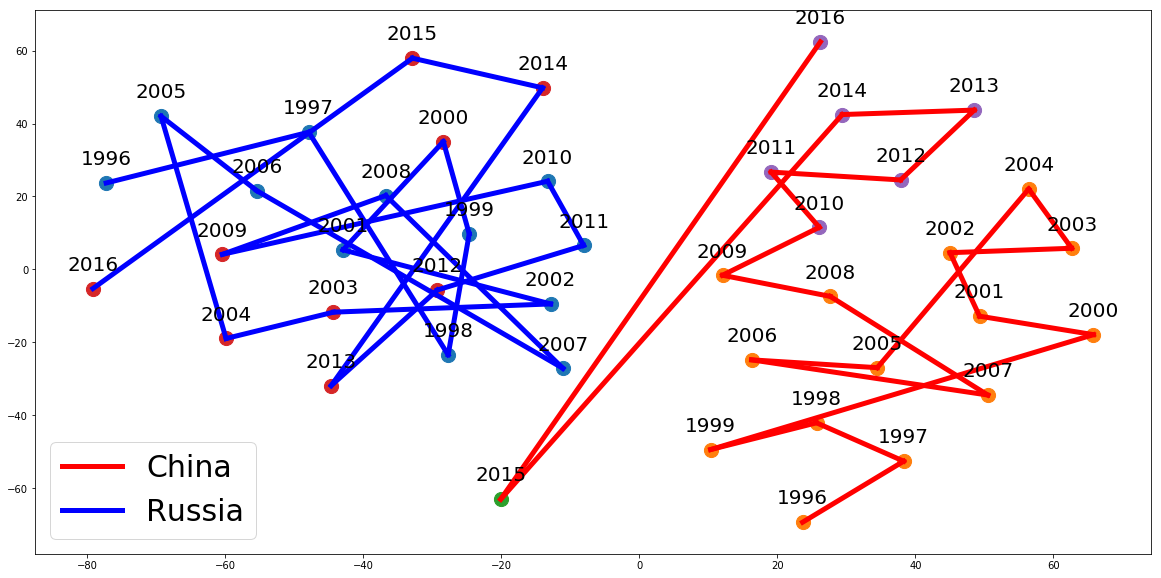

In [19]:
mdl=TSNE()
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
mds_representation=mdl.fit_transform(np.vstack((np.array(irf2),np.array(icf2))))
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
yyr=mds_representation.T[1][:21]
xxc=mds_representation.T[0][21:]
yyc=mds_representation.T[1][21:]
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)
for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if icf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+5,'{}'.format(icf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if irf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+5,'{}'.format(irf2.index[el].year),horizontalalignment='center',fontsize=20)

plt.show()

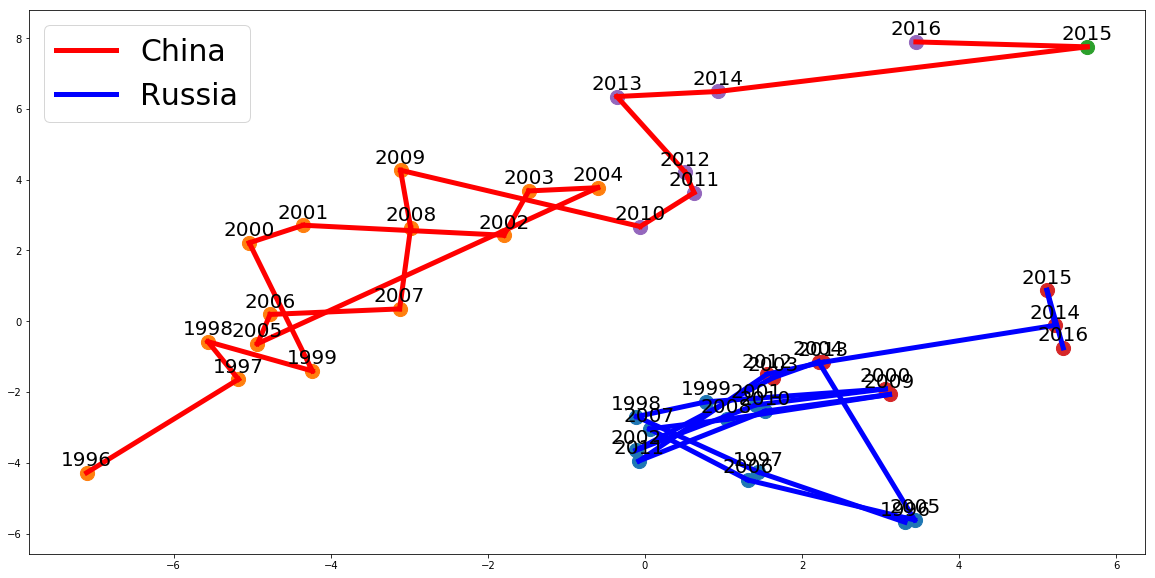

In [20]:
mdl=MDS()
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
mds_representation=mdl.fit_transform(np.vstack((np.array(irf2),np.array(icf2))))
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
yyr=mds_representation.T[1][:21]
xxc=mds_representation.T[0][21:]
yyc=mds_representation.T[1][21:]
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)
for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if icf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+0.2,'{}'.format(icf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if irf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+0.2,'{}'.format(irf2.index[el].year),horizontalalignment='center',fontsize=20)

plt.show()

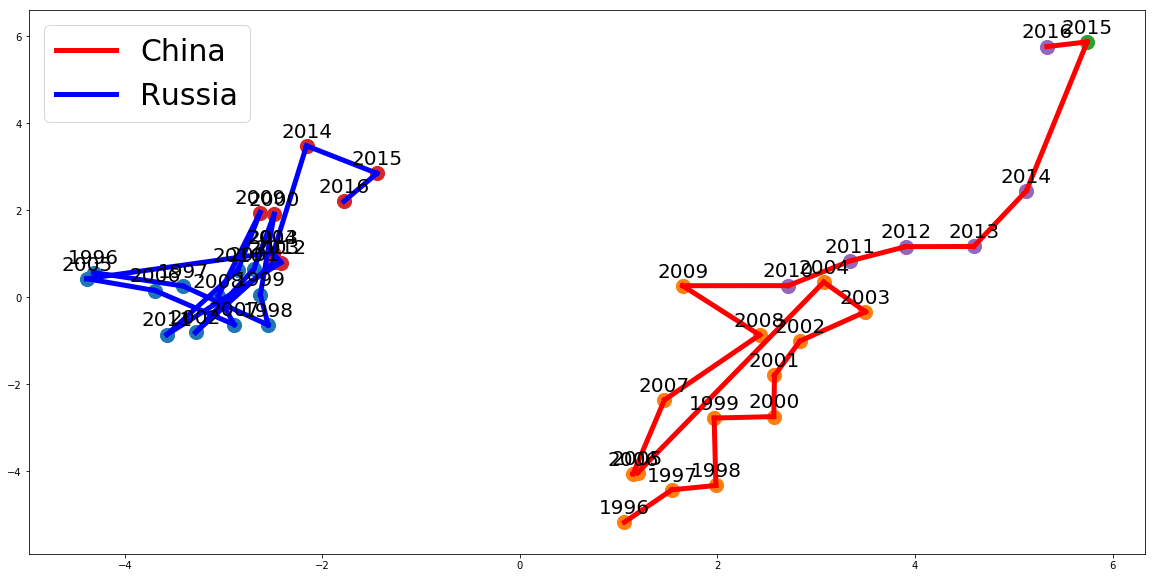

In [21]:
mdl=TruncatedSVD(n_components=2)
mds_representation=mdl.fit_transform(np.vstack((np.array(irf2),np.array(icf2))))
m1svd=mdl
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
xr1s=xxr
yyr=mds_representation.T[1][:21]
yr1s=yyr
xxc=mds_representation.T[0][21:]
xc1s=xxc
yyc=mds_representation.T[1][21:]
yc1s=yyc
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)
for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if icf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+0.2,'{}'.format(icf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if irf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+0.2,'{}'.format(irf2.index[el].year),horizontalalignment='center',fontsize=20)

plt.show()

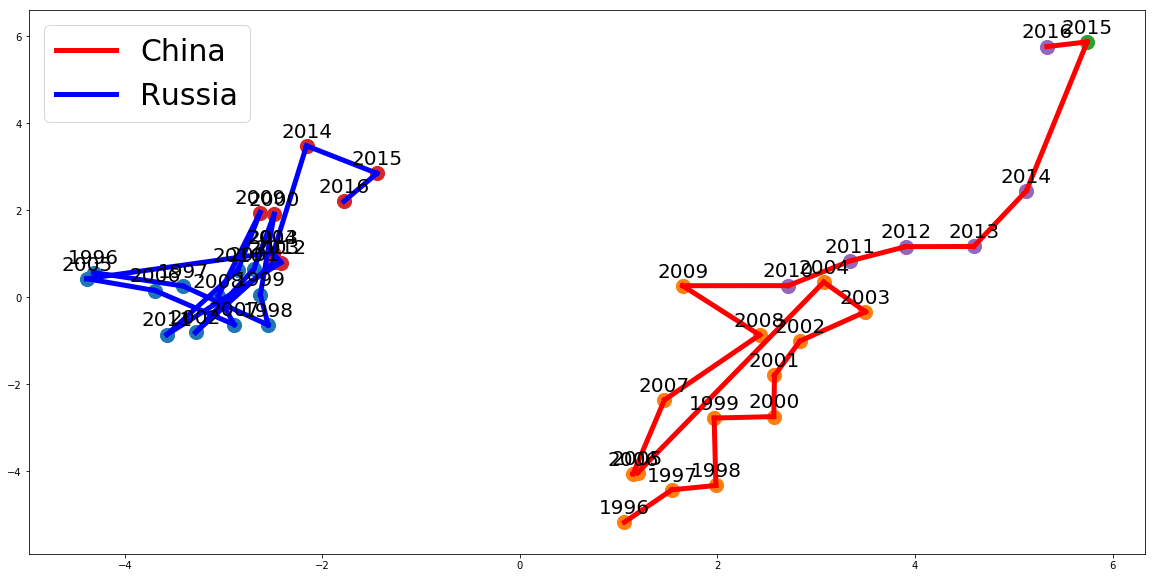

In [22]:
mdl=PCA(n_components=2)
mds_representation=mdl.fit_transform(np.vstack((np.array(irf2),np.array(icf2))))
m1=mdl
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
xr1=xxr
yyr=mds_representation.T[1][:21]
yr1=yyr
xxc=mds_representation.T[0][21:]
xc1=xxc
yyc=mds_representation.T[1][21:]
yc1=yyc
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)
for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if icf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+0.2,'{}'.format(icf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if irf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+0.2,'{}'.format(irf2.index[el].year),horizontalalignment='center',fontsize=20)

plt.show()

In [18]:
X_columns=['GINI','HDI','ER','Footprint','Biocapacity','GDP','GDP_growth','GDP_per_capita','GDP_Annual_growth','Energy_Intensity_index']
cf=pd.read_csv('c:/python/sgi_gdp_china.csv',sep=';',decimal=',', index_col='year')
cf1=cf[(cf.index<2017)&(cf.index>1995)][X_columns]
cf1.index=list(map(lambda x: datetime(x,1,1,0,0,0), cf1.index))
cf1.head()

GINI    HDI   ER  Footprint  Biocapacity        GDP  GDP_growth  \
1996-01-01  35.3  0.550  0.3        1.3          2.0   867224.0       0.099   
1997-01-01  35.3  0.559  0.2        1.2          2.0   965338.0       0.092   
1998-01-01  35.3  0.568  0.1        1.4          2.0  1032570.0       0.078   
1999-01-01  38.7  0.576  0.2        1.5          2.0  1097140.0       0.077   
2000-01-01  38.7  0.585  0.2        1.6          2.0  1214920.0       0.085   

            GDP_per_capita  GDP_Annual_growth  Energy_Intensity_index  
1996-01-01           709.0              0.165                   13.30  
1997-01-01           781.0              0.102                   12.70  
1998-01-01           828.0              0.060                   11.36  
1999-01-01           872.0              0.054                   10.76  
2000-01-01           959.0              0.099                   10.23

In [19]:
rf=pd.read_csv('c:/python/sgi_gdp_russia.csv',sep=';',decimal=',', index_col='year')
rf1=rf[(rf.index<2017)&(rf.index>1995)][X_columns]
rf1.index=list(map(lambda x: datetime(x,1,1,0,0,0), rf1.index))
rf1.head()

GINI    HDI   ER  Footprint  Biocapacity       GDP  GDP_growth  \
1996-01-01  38.4  0.709  0.8       0.47        0.640  419522.0      -0.036   
1997-01-01  38.1  0.710  0.9       0.48        0.658  433619.0       0.014   
1998-01-01  37.4  0.718  1.0       0.43        0.629  290231.0      -0.053   
1999-01-01  37.1  0.720  1.1       0.43        0.638   20977.0       0.064   
2000-01-01  36.9  0.727  1.2       0.43        0.650  278075.0       0.100   

            GDP_per_capita  GDP_Annual_growth  Energy_Intensity_index  
1996-01-01           2.833              0.133                   14.39  
1997-01-01           2.934              0.252                   13.56  
1998-01-01           1.969              0.036                   13.99  
1999-01-01           1.428             -0.329                   13.62  
2000-01-01           1.899             -0.275                   12.59

In [20]:
mms=StandardScaler().fit(np.vstack((np.array(rf1),np.array(cf1))))
rf2=pd.DataFrame(mms.transform(rf1),columns=rf1.columns,index=rf1.index)
cf2=pd.DataFrame(mms.transform(cf1),columns=cf1.columns,index=cf1.index)
cf2.head()

GINI       HDI        ER  Footprint  Biocapacity       GDP  \
1996-01-01 -2.028273 -2.077443 -0.636897   0.979892     0.999818 -0.609194   
1997-01-01 -2.028273 -1.954667 -0.813579   0.753390     0.999818 -0.578138   
1998-01-01 -2.028273 -1.831891 -0.990261   1.206394     0.999818 -0.556857   
1999-01-01 -0.454157 -1.722757 -0.813579   1.432896     0.999818 -0.536419   
2000-01-01 -0.454157 -1.599982 -0.813579   1.659399     0.999818 -0.499138   

            GDP_growth  GDP_per_capita  GDP_Annual_growth  \
1996-01-01    0.785947        2.253870           0.272159   
1997-01-01    0.637255        2.522151          -0.100195   
1998-01-01    0.339869        2.697279          -0.348431   
1999-01-01    0.318627        2.861228          -0.383893   
2000-01-01    0.488562        3.185401          -0.117926   

            Energy_Intensity_index  
1996-01-01                1.692131  
1997-01-01                1.391435  
1998-01-01                0.719881  
1999-01-01                0.419185  
2000-01-01                0.153570

In [21]:
raic=float("inf")
rkols=0
model=0
for kols in range(1,20):
    clf = mixture.GaussianMixture(n_components=kols, random_state=0)
    clf.fit(np.vstack((np.array(rf2),np.array(cf2))))
    rraic=clf.aic(np.vstack((np.array(rf2),np.array(cf2))))
    print ('Для {} score={}'.format(kols,rraic))
    if rraic<raic:
        raic=rraic
        rkols=kols
        model=clf


Для 1 score=723.7376208097464
Для 2 score=-209.11562527578496
Для 3 score=-493.80456562780194
Для 4 score=-777.0554099094131
Для 5 score=-1047.380710135248
Для 6 score=-1093.6754288503712
Для 7 score=-1334.8160759699267
Для 8 score=-1444.5786936776208
Для 9 score=-1595.4832858151512
Для 10 score=-1579.3803615099514
Для 11 score=-1638.6101951505711
Для 12 score=-1647.4284288502126
Для 13 score=-1595.185970568236
Для 14 score=-1591.4480860097433
Для 15 score=-1635.0600039991623
Для 16 score=-1528.6070753597055
Для 17 score=-1422.721447004771
Для 18 score=-1418.352711443421
Для 19 score=-1332.410036829905


In [22]:
clf = mixture.GaussianMixture(n_components=12, random_state=0)
clf.fit(np.vstack((np.array(rf2),np.array(cf2))))
res=clf.predict(rf2)
res

array([ 0,  9,  0,  7,  7,  9,  8,  8,  8,  8,  8,  8,  2, 10,  6,  2,  2,
       10, 10, 10,  6], dtype=int64)

In [23]:
ces=clf.predict(cf2)
ces

array([ 3,  3,  3, 11, 11,  1,  1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5,
        4,  4,  4,  4], dtype=int64)

In [24]:
res1=clf.predict(np.vstack((np.array(rf2),np.array(cf2))))
res1

array([ 0,  9,  0,  7,  7,  9,  8,  8,  8,  8,  8,  8,  2, 10,  6,  2,  2,
       10, 10, 10,  6,  3,  3,  3, 11, 11,  1,  1,  1,  1,  1,  1,  1,  5,
        5,  5,  5,  5,  4,  4,  4,  4], dtype=int64)

# Внешние

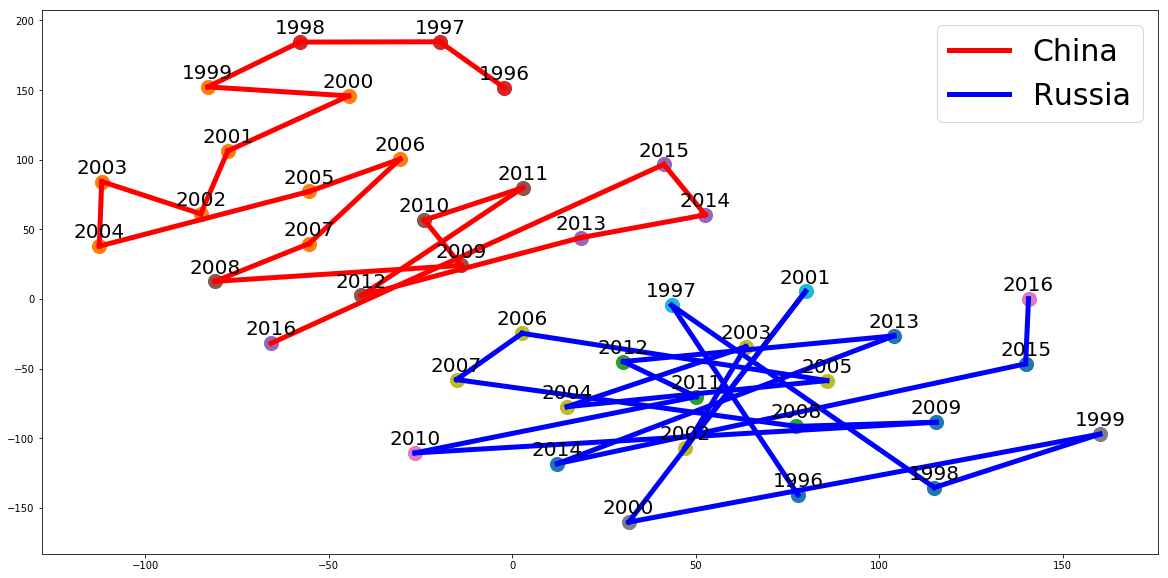

In [30]:
mdl=TSNE()
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
mds_representation=mdl.fit_transform(np.vstack((np.array(rf2),np.array(cf2))))
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
yyr=mds_representation.T[1][:21]
xxc=mds_representation.T[0][21:]
yyc=mds_representation.T[1][21:]
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)

for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(12):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if cf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+6,'{}'.format(cf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if rf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+6,'{}'.format(rf2.index[el].year),horizontalalignment='center',fontsize=20)

plt.show()

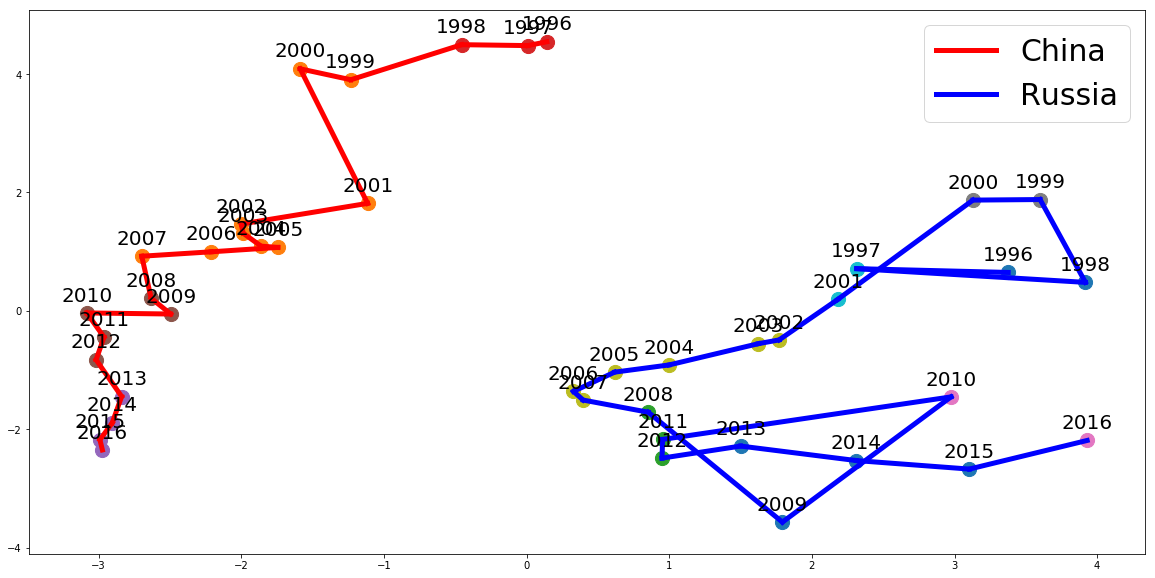

In [31]:
mdl=MDS()
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
mds_representation=mdl.fit_transform(np.vstack((np.array(rf2),np.array(cf2))))
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
yyr=mds_representation.T[1][:21]
xxc=mds_representation.T[0][21:]
yyc=mds_representation.T[1][21:]
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)

for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(12):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if cf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+0.2,'{}'.format(cf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if rf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+0.2,'{}'.format(rf2.index[el].year),horizontalalignment='center',fontsize=20)

plt.show()

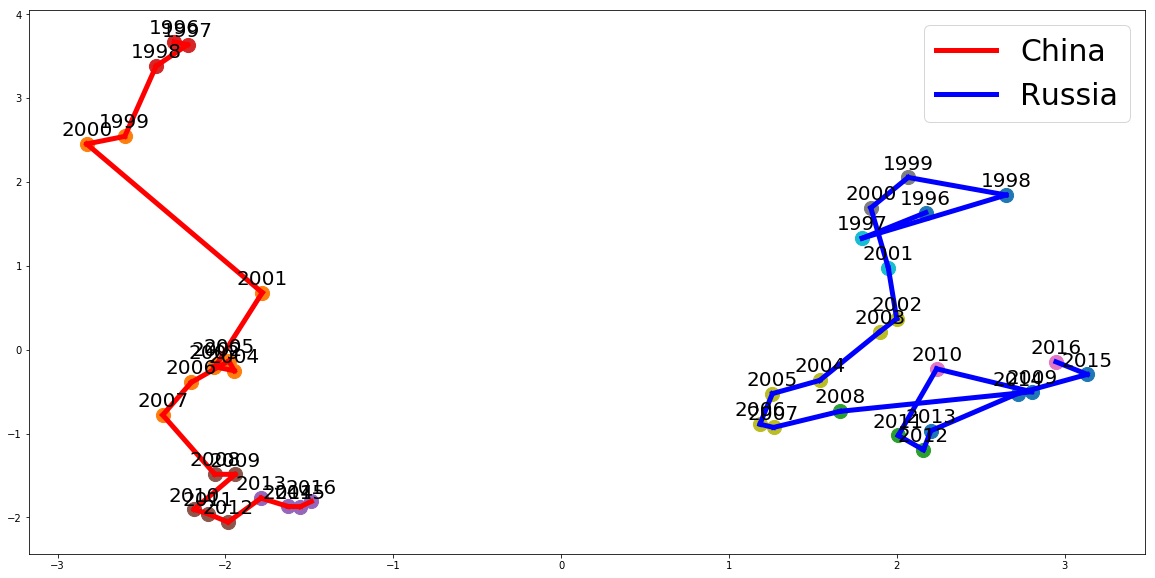

In [32]:
mdl=TruncatedSVD(n_components=2)
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
mds_representation=mdl.fit_transform(np.vstack((np.array(rf2),np.array(cf2))))
m2svd=mdl
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
xr2s=xxr
yyr=mds_representation.T[1][:21]
yr2s=yyr
xxc=mds_representation.T[0][21:]
xc2s=xxc
yyc=mds_representation.T[1][21:]
yc2s=yyc
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)

for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(12):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if cf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+0.1,'{}'.format(cf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if rf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+0.1,'{}'.format(rf2.index[el].year),horizontalalignment='center',fontsize=20)

plt.show()

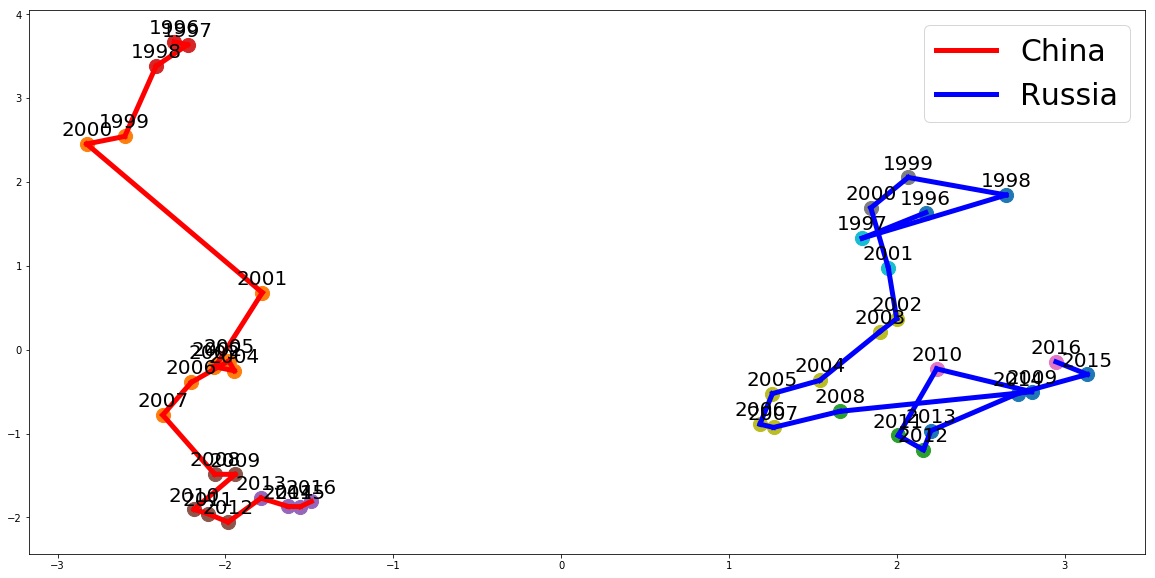

In [33]:
mdl=PCA(n_components=2)
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
mds_representation=mdl.fit_transform(np.vstack((np.array(rf2),np.array(cf2))))
m2=mdl
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
xr2=xxr
yyr=mds_representation.T[1][:21]
yr2=yyr
xxc=mds_representation.T[0][21:]
xc2=xxc
yyc=mds_representation.T[1][21:]
yc2=yyc
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)

for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(12):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if cf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+0.1,'{}'.format(cf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if rf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+0.1,'{}'.format(rf2.index[el].year),horizontalalignment='center',fontsize=20)

plt.show()

In [25]:
srf1=pd.DataFrame(np.hstack((np.array(rf1),np.array(irf1))),index=rf1.index,columns=list(rf1.columns)+list(irf1.columns))
scf1=pd.DataFrame(np.hstack((np.array(cf1),np.array(icf1))),index=cf1.index,columns=list(cf1.columns)+list(icf1.columns))


preobr={'GINI':1, 'HDI':2, 'ER':1, 'Footprint':1, 'Biocapacity':1, 'GDP':1, 'GDP_growth':0, 'GDP_per_capita':0,
        'GDP_Annual_growth':0, 'Energy_Intensity_index':0, 'FSI':2, 'SGR':2, 'EROI':0, 'PRP':0, 'ES':0, 'ROEnv':2,
        'RoL':2, 'ROEsr':2, 'RER':2, 'CR':1, 'NWCT':0, 'ROFA':2, 'ROS':2, 'ROCE':2, 'ROA':2, 'ROE':2, 'EBIT':0, 'WACC':0,
        'RG':0, 'NPG':0, 'NAG':0, 'FL':0, 'DOL':0, 'DER':0}
iiirf1=np.array(srf1).T
iiicf1=np.array(scf1).T
#for num,el in enumerate(srf1.columns):
#    print (el, preobr[el], np.min(iiirf1[num]),np.max(iiirf1[num]), np.min(iiicf1[num]),np.max(iiicf1[num]))
#    iiirf1[num]= (iiirf1[num] if preobr[el]==0 else np.log(iiirf1[num]) if preobr[el]==1 else 
#        np.log((iiirf1[num]*0.98+0.01)/(0.99-0.98*iiirf1[num])))
#    iiicf1[num]= (iiicf1[num] if preobr[el]==0 else np.log(iiicf1[num]) if preobr[el]==1 else 
#        np.log((iiicf1[num]*0.98+0.01)/(0.99-0.98*iiicf1[num])))


In [26]:
mms=StandardScaler().fit(np.vstack((iiirf1.T,iiicf1.T)))
srf2=pd.DataFrame(mms.transform(iiirf1.T),columns=srf1.columns,index=srf1.index)
scf2=pd.DataFrame(mms.transform(iiicf1.T),columns=scf1.columns,index=scf1.index)
scf2.head()

GINI       HDI        ER  Footprint  Biocapacity       GDP  \
1996-01-01 -2.028273 -2.077443 -0.636897   0.979892     0.999818 -0.609194   
1997-01-01 -2.028273 -1.954667 -0.813579   0.753390     0.999818 -0.578138   
1998-01-01 -2.028273 -1.831891 -0.990261   1.206394     0.999818 -0.556857   
1999-01-01 -0.454157 -1.722757 -0.813579   1.432896     0.999818 -0.536419   
2000-01-01 -0.454157 -1.599982 -0.813579   1.659399     0.999818 -0.499138   

            GDP_growth  GDP_per_capita  GDP_Annual_growth  \
1996-01-01    0.785947        2.253870           0.272159   
1997-01-01    0.637255        2.522151          -0.100195   
1998-01-01    0.339869        2.697279          -0.348431   
1999-01-01    0.318627        2.861228          -0.383893   
2000-01-01    0.488562        3.185401          -0.117926   

            Energy_Intensity_index    ...          ROA       ROE      EBIT  \
1996-01-01                1.692131    ...     2.271784  1.596141  0.704302   
1997-01-01                1.391435    ...     2.271784  1.596141  0.704302   
1998-01-01                0.719881    ...     1.917899  1.328201  0.462158   
1999-01-01                0.419185    ...     1.198104  0.471455  0.242026   
2000-01-01                0.153570    ...     0.035094 -0.400177  0.462158   

                WACC        RG       NPG       NAG        FL       DOL  \
1996-01-01 -0.920004 -0.507029  0.686980  0.948608 -0.897799  0.344928   
1997-01-01 -0.845205 -0.507029  0.686980  0.948608 -0.897799  0.344928   
1998-01-01 -0.920004 -0.970139  1.133177  1.757119 -1.018726  0.907998   
1999-01-01 -0.770407 -0.709741 -0.986766  0.738686 -0.942504 -1.053413   
2000-01-01  3.119115 -1.370467  1.448978  0.821823 -1.048701  0.454863   

                 DER  
1996-01-01  0.007315  
1997-01-01  0.007315  
1998-01-01  0.019308  
1999-01-01  0.023541  
2000-01-01  0.217193  

[5 rows x 34 columns]

In [27]:
raic=float("inf")
rkols=0
model=0
for kols in range(1,20):
    clf = mixture.GaussianMixture(n_components=kols, random_state=0)
    clf.fit(np.vstack((np.array(srf2),np.array(scf2))))
    rraic=clf.aic(np.vstack((np.array(srf2),np.array(scf2))))
    print ('Для {} score={}'.format(kols,rraic))
    if rraic<raic:
        raic=rraic
        rkols=kols
        model=clf


Для 1 score=1820.7553127379072
Для 2 score=-3686.2630500092646
Для 3 score=-4969.363423008301
Для 4 score=-4614.541815741102
Для 5 score=-4374.633587997028
Для 6 score=-4878.507895118457
Для 7 score=-4210.258818699498
Для 8 score=-1937.870857089085
Для 9 score=-1801.1310517982256
Для 10 score=-1610.3904816585855
Для 11 score=-499.71426045314183
Для 12 score=508.1708121249958
Для 13 score=1161.0328012897826
Для 14 score=2389.8747876140624
Для 15 score=3619.7549239103464
Для 16 score=4819.62281617008
Для 17 score=5939.4245384068745
Для 18 score=7170.123915344044
Для 19 score=8343.98791973842


In [28]:
clf = mixture.GaussianMixture(n_components=6, random_state=0)
clf.fit(np.vstack((np.array(srf2),np.array(scf2))))
res=clf.predict(srf2)
ces=clf.predict(scf2)
res1=clf.predict(np.vstack((np.array(srf2),np.array(scf2))))

# Все факторы

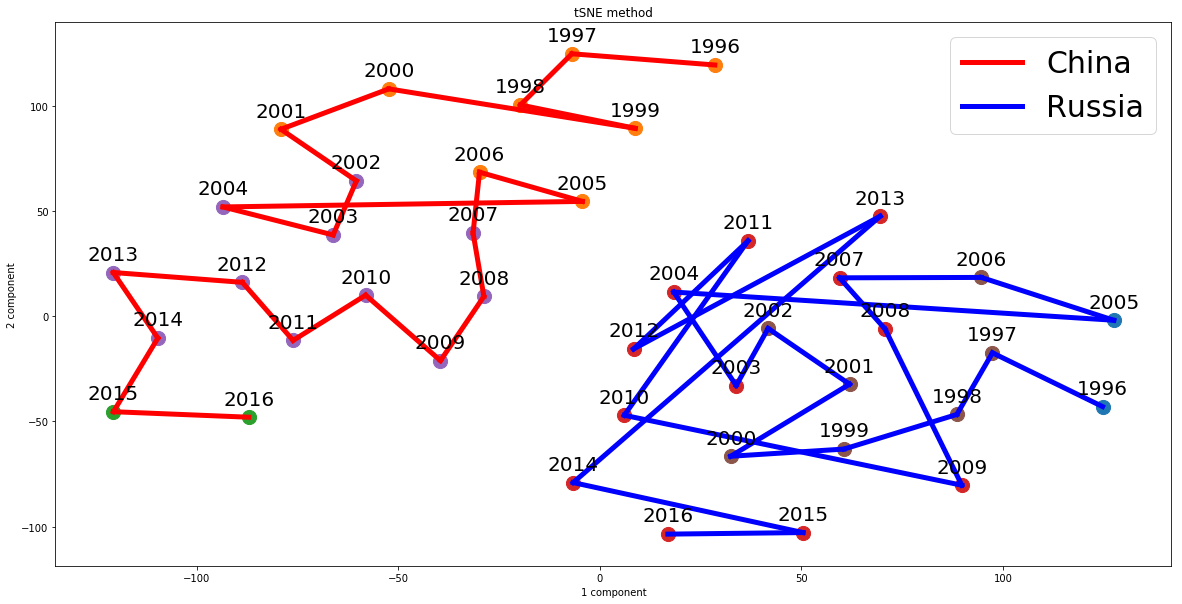

In [38]:
mdl=TSNE()
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
mds_representation=mdl.fit_transform(np.vstack((np.array(srf2),np.array(scf2))))
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
yyr=mds_representation.T[1][:21]
xxc=mds_representation.T[0][21:]
yyc=mds_representation.T[1][21:]
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)

for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if cf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+6,'{}'.format(scf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if rf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+6,'{}'.format(srf2.index[el].year),horizontalalignment='center',fontsize=20)
plt.xlabel('1 component')
plt.ylabel('2 component')
plt.title('tSNE method')
plt.show()

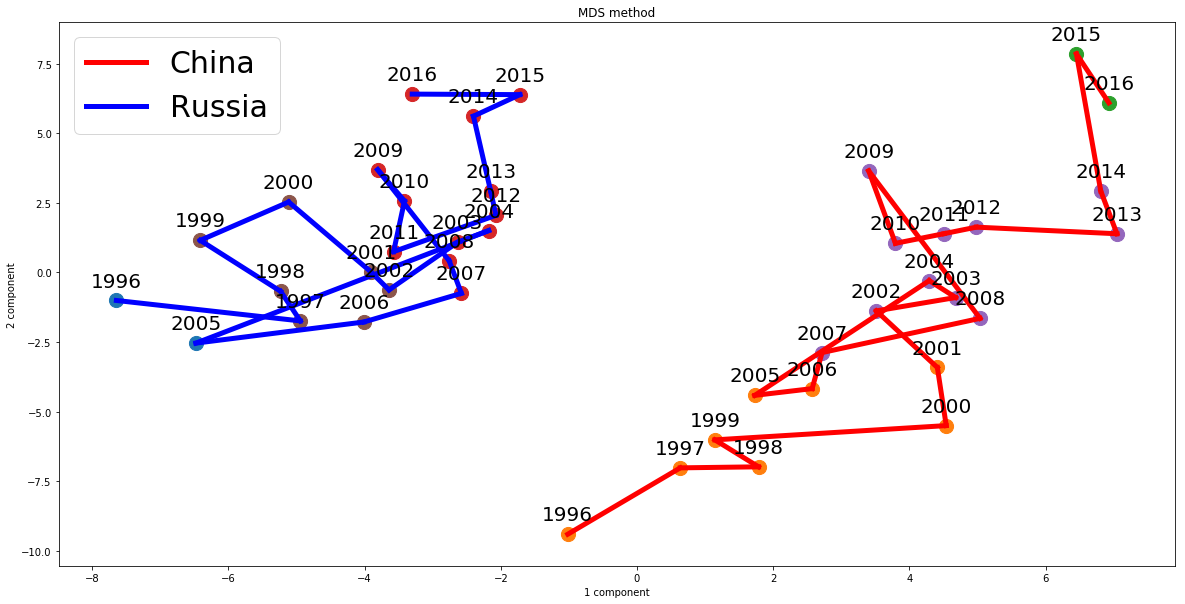

In [39]:
mdl=MDS()
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
mds_representation=mdl.fit_transform(np.vstack((np.array(srf2),np.array(scf2))))
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
yyr=mds_representation.T[1][:21]
xxc=mds_representation.T[0][21:]
yyc=mds_representation.T[1][21:]
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)

for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if cf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+0.5,'{}'.format(scf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if rf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+0.5,'{}'.format(srf2.index[el].year),horizontalalignment='center',fontsize=20)
plt.xlabel('1 component')
plt.ylabel('2 component')
plt.title('MDS method')

plt.show()

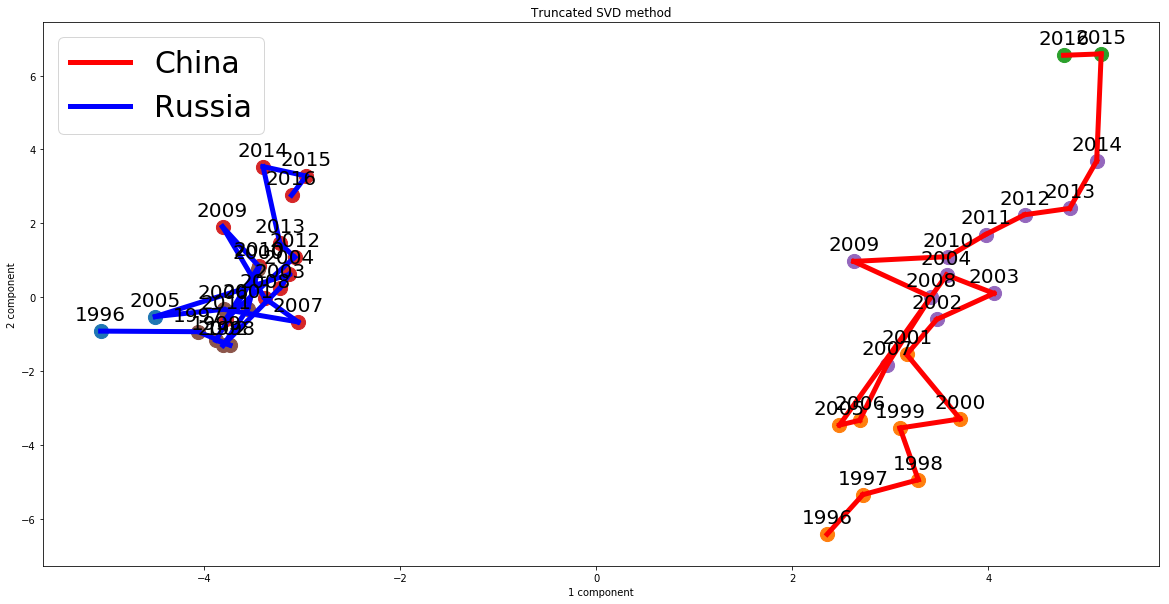

In [40]:
mdl=TruncatedSVD(n_components=2)
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
mds_representation=mdl.fit_transform(np.vstack((np.array(srf2),np.array(scf2))))
m3svd=mdl
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
xr3s=xxr
yyr=mds_representation.T[1][:21]
yr3s=yyr
xxc=mds_representation.T[0][21:]
xc3s=xxc
yyc=mds_representation.T[1][21:]
yc3s=yyc
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)

for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if cf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+0.3,'{}'.format(scf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if rf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+0.3,'{}'.format(srf2.index[el].year),horizontalalignment='center',fontsize=20)
plt.xlabel('1 component')
plt.ylabel('2 component')
plt.title('Truncated SVD method')

plt.show()

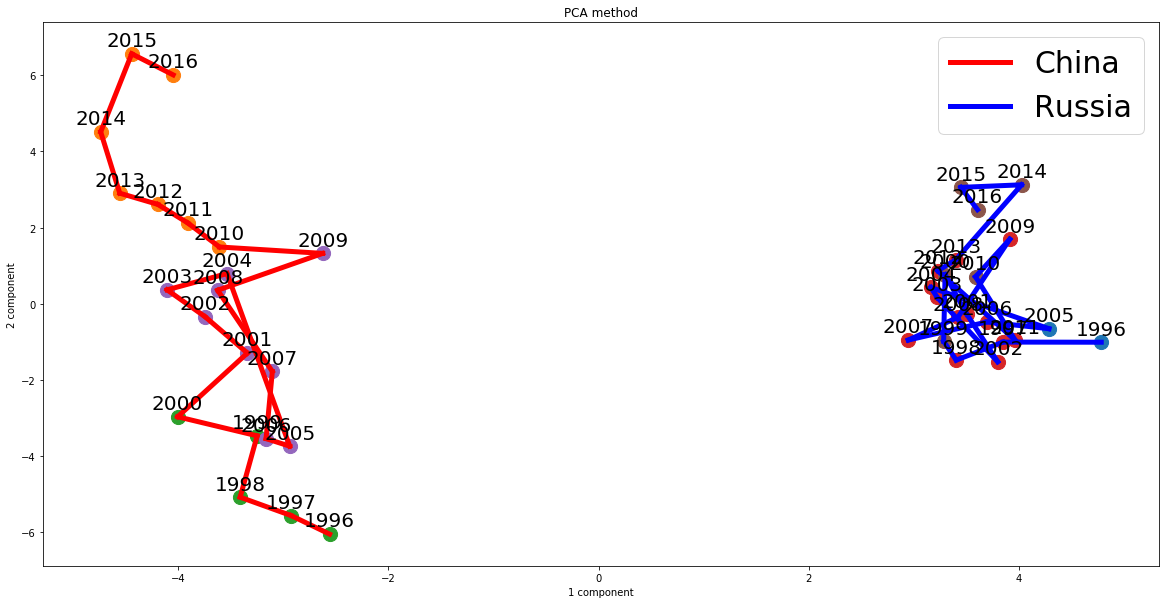

In [29]:
mdl=PCA(n_components=2)
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
mds_representation=mdl.fit_transform(np.vstack((np.array(srf2),np.array(scf2))))
m3=mdl
plt.figure(figsize=(20,10))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
xr3=xxr
yyr=mds_representation.T[1][:21]
yr3=yyr
xxc=mds_representation.T[0][21:]
xc3=xxc
yyc=mds_representation.T[1][21:]
yc3=yyc
plt.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
plt.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
plt.legend(['China','Russia'],fontsize=30)

for el in range(2,len(xxc)):
    plt.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    plt.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    plt.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if cf2.index[el].month==1:
        plt.text(xxc[el],yyc[el]+0.2,'{}'.format(scf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if rf2.index[el].month==1:
        plt.text(xxr[el],yyr[el]+0.2,'{}'.format(srf2.index[el].year),horizontalalignment='center',fontsize=20)
plt.xlabel('1 component')
plt.ylabel('2 component')
plt.title('PCA method')

plt.show()

# Раскладываю на 7 компонент

In [30]:
mdl=TruncatedSVD(n_components=7)
mds_representation=mdl.fit_transform(np.vstack((np.array(srf2),np.array(scf2))))

In [31]:
#Доля объясненной зависимости
for el in range(7):
    print('1-{}: {}'.format(el+1,np.sum(mdl.explained_variance_ratio_[:el+1])))

1-1: 0.3911023968653548
1-2: 0.6090069227139262
1-3: 0.6905309878048571
1-4: 0.7463882525585728
1-5: 0.7871054586903654
1-6: 0.8243485850435883
1-7: 0.8545919621952387


In [32]:
#Вес показателей в компонентах
qqq1=pd.DataFrame(mdl.components_.T,columns=range(1,8),index=srf1.columns)
qqq1

1         2         3         4         5  \
GINI                   -0.053037  0.095541 -0.479410  0.192886 -0.021642   
HDI                     0.187116  0.237875 -0.082749 -0.029014  0.028572   
ER                      0.257967  0.028091 -0.014058 -0.171452 -0.091622   
Footprint              -0.264229 -0.070744  0.000979 -0.011413  0.040382   
Biocapacity            -0.271440 -0.029646  0.003208  0.011884  0.039070   
GDP                    -0.166046  0.243636  0.015072  0.135254  0.085366   
GDP_growth             -0.178938 -0.089084 -0.205111  0.056617 -0.034135   
GDP_per_capita         -0.088672 -0.220482  0.296565 -0.106730  0.018109   
GDP_Annual_growth      -0.017196 -0.070694 -0.280619  0.430874 -0.005763   
Energy_Intensity_index  0.064386 -0.245175  0.163633  0.196419 -0.005281   
FSI                     0.251123 -0.011655 -0.099912 -0.012787 -0.049131   
SGR                     0.261344  0.038827 -0.030402 -0.131067 -0.047539   
EROI                    0.257669  0.009489 -0.094996  0.118658  0.016457   
PRP                     0.143076 -0.248382 -0.055634 -0.171327 -0.227030   
ES                      0.166098  0.008377 -0.207813 -0.063530  0.439146   
ROEnv                   0.076402  0.247430 -0.004973  0.151490  0.328619   
RoL                    -0.165933  0.044852 -0.341588 -0.039644 -0.167520   
ROEsr                  -0.142320  0.217759 -0.062277 -0.233933  0.024489   
RER                     0.165161  0.090456 -0.154969 -0.337539 -0.244675   
CR                      0.206035 -0.022208 -0.275614  0.020491 -0.105356   
NWCT                    0.164416 -0.171568 -0.022443 -0.166241  0.345222   
ROFA                   -0.157478 -0.271154 -0.008527 -0.046466  0.036108   
ROS                     0.165939 -0.128691  0.064268  0.394870  0.023185   
ROCE                    0.025621 -0.338426 -0.017421  0.102067  0.016986   
ROA                    -0.012502 -0.337504 -0.003977 -0.005710  0.003261   
ROE                     0.091498 -0.293843 -0.033234 -0.124160 -0.050250   
EBIT                   -0.059297 -0.183699 -0.310810 -0.077004 -0.297695   
WACC                   -0.161584 -0.004632 -0.243841 -0.107009  0.122397   
RG                      0.260457 -0.024291  0.000363 -0.003326  0.057240   
NPG                    -0.024065 -0.169134 -0.188611 -0.248252  0.498805   
NAG                    -0.154783 -0.175237 -0.169097 -0.127343  0.100481   
FL                      0.258853  0.037943  0.038697 -0.081421 -0.010751   
DOL                     0.006215 -0.106799 -0.081357 -0.055120  0.173849   
DER                    -0.182949  0.151494  0.078014 -0.316648 -0.037435   

                               6         7  
GINI                    0.056766  0.042927  
HDI                    -0.212395  0.049858  
ER                     -0.018203 -0.005139  
Footprint               0.082712  0.024140  
Biocapacity             0.011687  0.044704  
GDP                    -0.276970  0.018786  
GDP_growth             -0.028369  0.107259  
GDP_per_capita         -0.001867  0.042219  
GDP_Annual_growth      -0.034702  0.089547  
Energy_Intensity_index  0.150011 -0.177051  
FSI                     0.095738 -0.009903  
SGR                    -0.062173  0.006098  
EROI                   -0.005442 -0.091673  
PRP                     0.232646 -0.005848  
ES                     -0.158227  0.129412  
ROEnv                  -0.221105  0.041543  
RoL                     0.058089 -0.076307  
ROEsr                  -0.166481  0.256974  
RER                    -0.105757  0.061771  
CR                      0.093190  0.111070  
NWCT                    0.151684  0.261460  
ROFA                   -0.118837  0.216367  
ROS                     0.028350  0.018883  
ROCE                   -0.235666  0.133059  
ROA                    -0.253778  0.208582  
ROE                    -0.323060  0.092099  
EBIT                   -0.218956 -0.162751  
WACC                    0.462702  0.016776  
RG                      0.082736  0.017380  
NPG                 

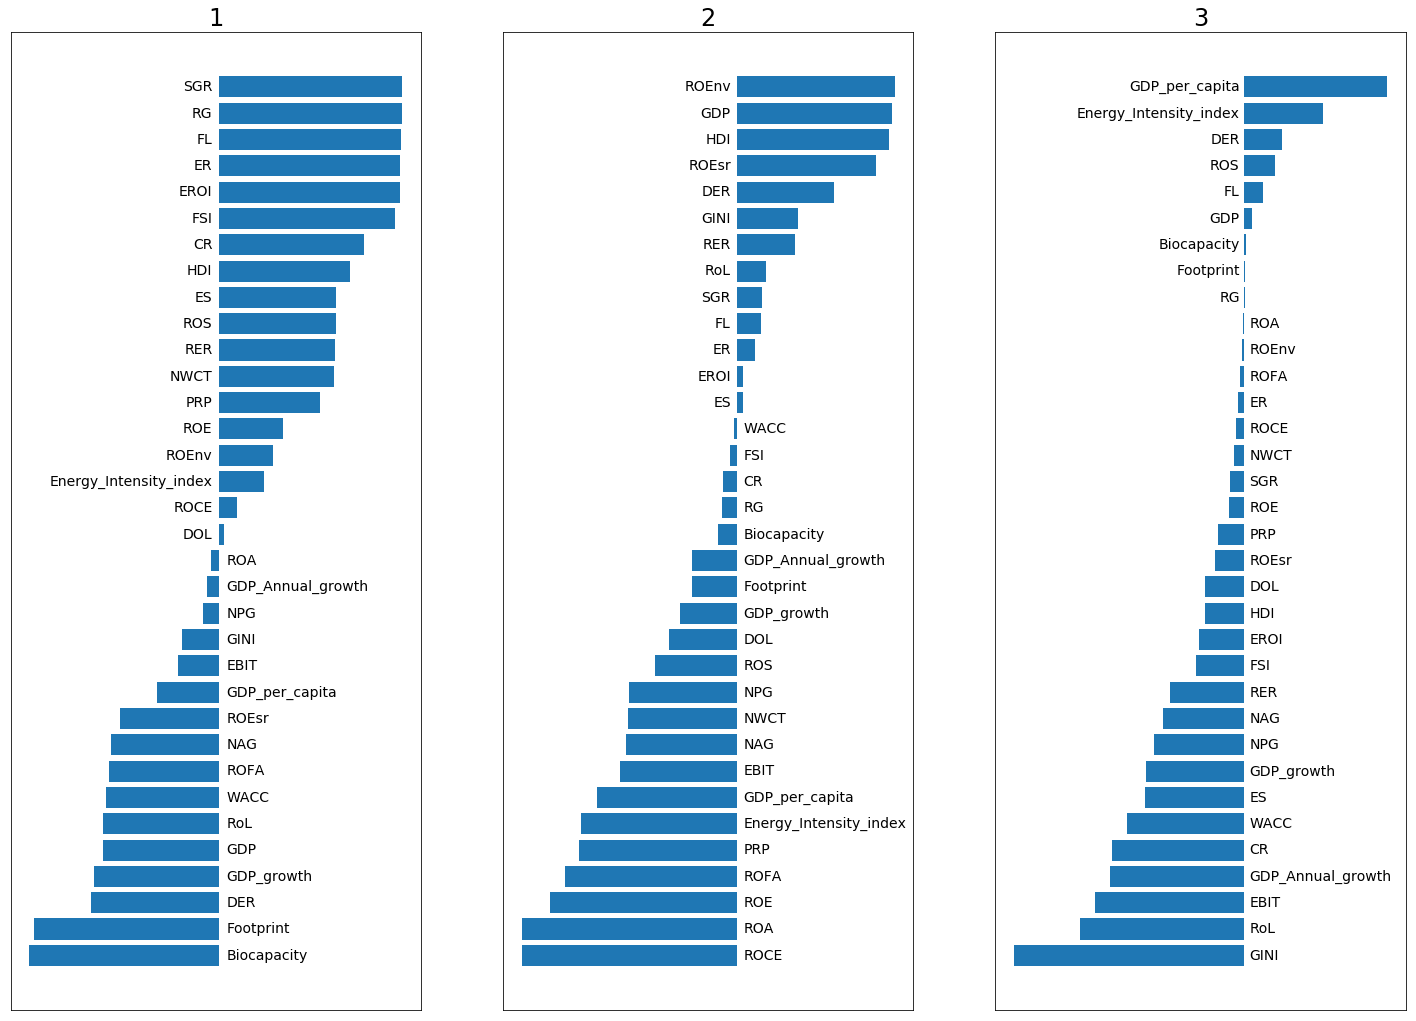

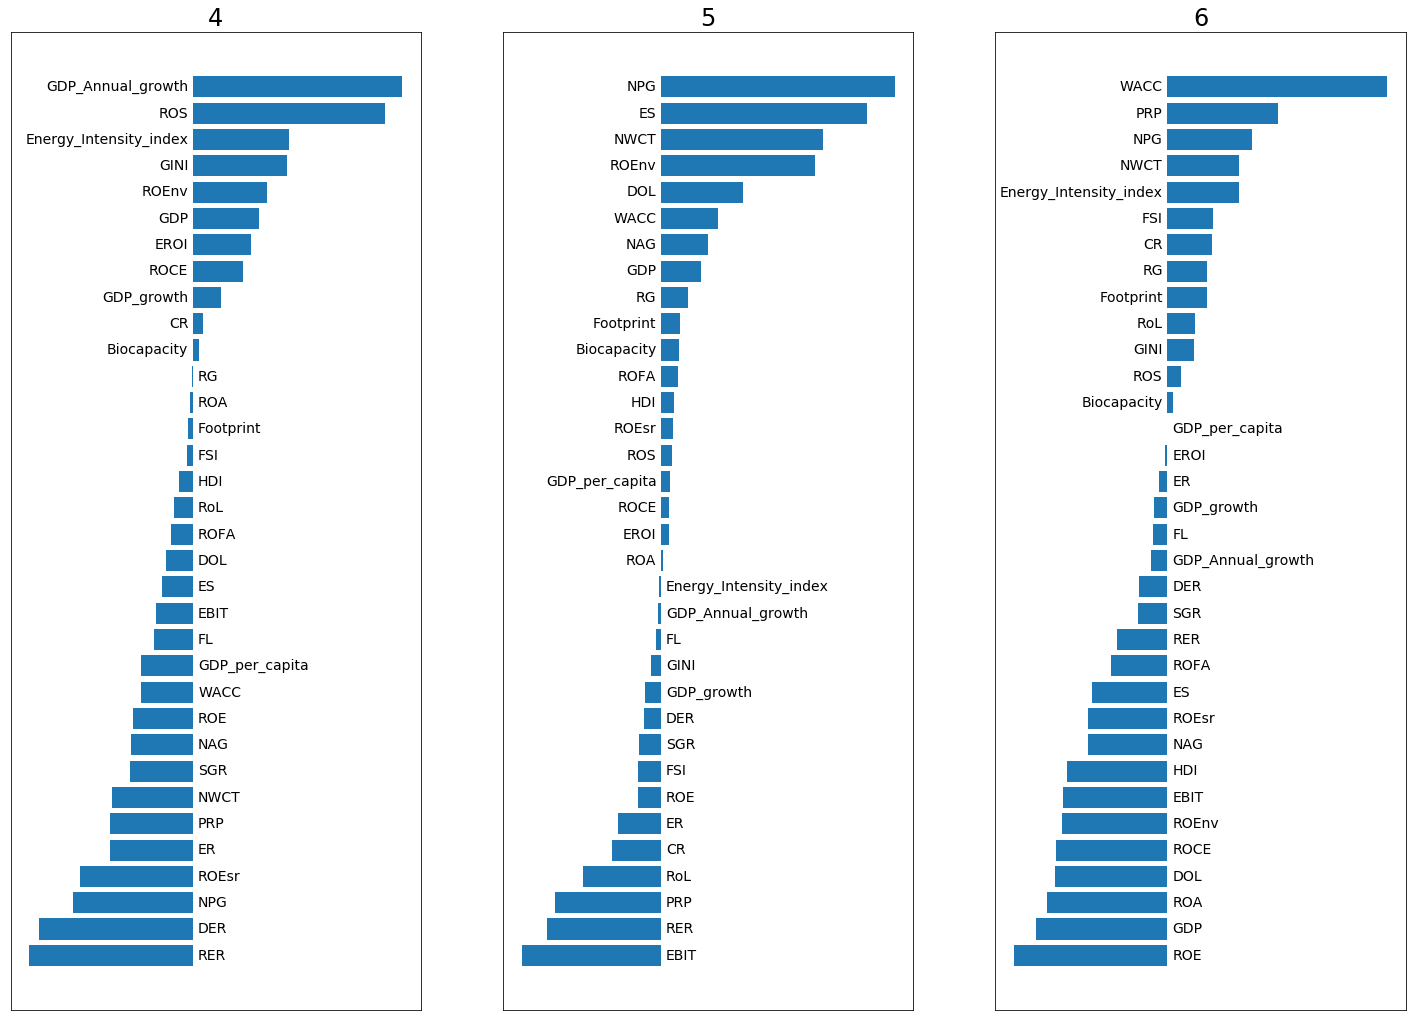

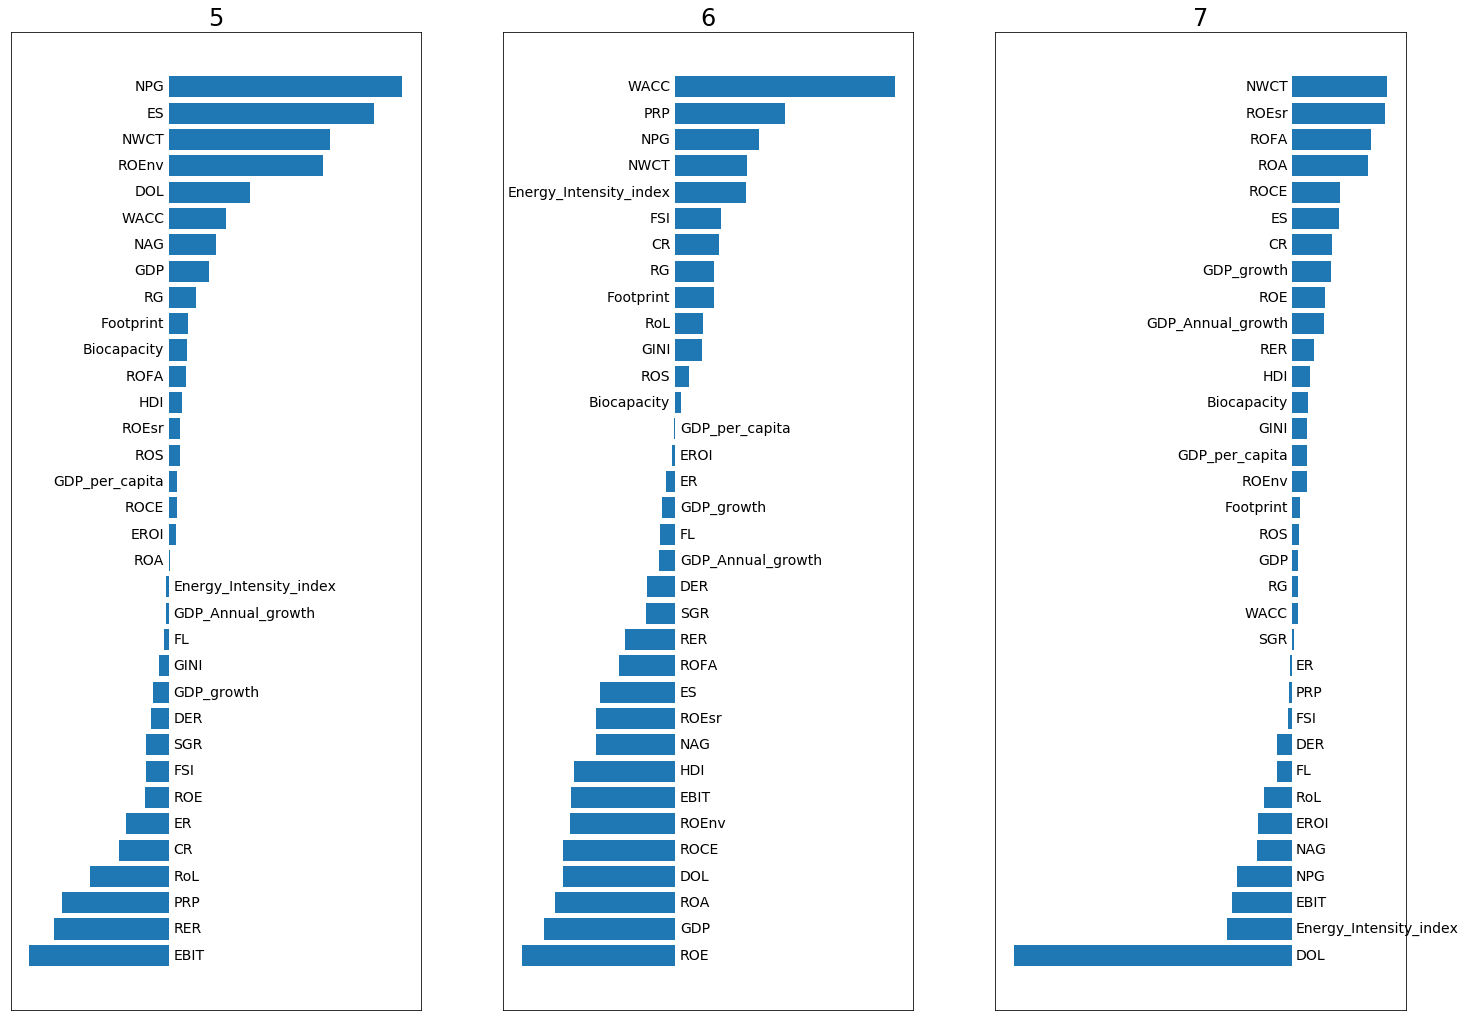

In [33]:
fig,axes=plt.subplots(1,3,figsize=(25,18))
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 5

for el in range(3):
    tt=sorted(list(zip(qqq1.index,qqq1[el+1])),key=lambda x: x[1])
    qqq2=np.double(np.array(tt).T[1])
    qqq3=np.array(tt).T[0]
    axes[el].barh(range(len(tt)),qqq2,left=-0.5)
    axes[el].set_xticks([],[])
    axes[el].set_yticks([],[])
    axes[el].set_title(el+1)
    for xx in range(len(tt)):
        if qqq2[xx]<0:
            axes[el].text(-0.49,xx,qqq3[xx],horizontalalignment='left',verticalalignment='center',fontsize=14)
        else:
            axes[el].text(-0.51,xx,qqq3[xx],horizontalalignment='right',verticalalignment='center',fontsize=14)
plt.show()

fig,axes=plt.subplots(1,3,figsize=(25,18))
for el in range(3,6):
    tt=sorted(list(zip(qqq1.index,qqq1[el+1])),key=lambda x: x[1])
    qqq2=np.double(np.array(tt).T[1])
    qqq3=np.array(tt).T[0]
    axes[el-3].barh(range(len(tt)),qqq2,left=-0.5)
    axes[el-3].set_xticks([],[])
    axes[el-3].set_yticks([],[])
    axes[el-3].set_title(el+1)
    for xx in range(len(tt)):
        if qqq2[xx]<0:
            axes[el-3].text(-0.49,xx,qqq3[xx],horizontalalignment='left',verticalalignment='center',fontsize=14)
        else:
            axes[el-3].text(-0.51,xx,qqq3[xx],horizontalalignment='right',verticalalignment='center',fontsize=14)
fig,axes=plt.subplots(1,3,figsize=(25,18))
for el in range(4,7):
    tt=sorted(list(zip(qqq1.index,qqq1[el+1])),key=lambda x: x[1])
    qqq2=np.double(np.array(tt).T[1])
    qqq3=np.array(tt).T[0]
    axes[el-4].barh(range(len(tt)),qqq2,left=-0.5)
    axes[el-4].set_xticks([],[])
    axes[el-4].set_yticks([],[])
    axes[el-4].set_title(el+1)
    for xx in range(len(tt)):
        if qqq2[xx]<0:
            axes[el-4].text(-0.49,xx,qqq3[xx],horizontalalignment='left',verticalalignment='center',fontsize=14)
        else:
            axes[el-4].text(-0.51,xx,qqq3[xx],horizontalalignment='right',verticalalignment='center',fontsize=14)
plt.show()

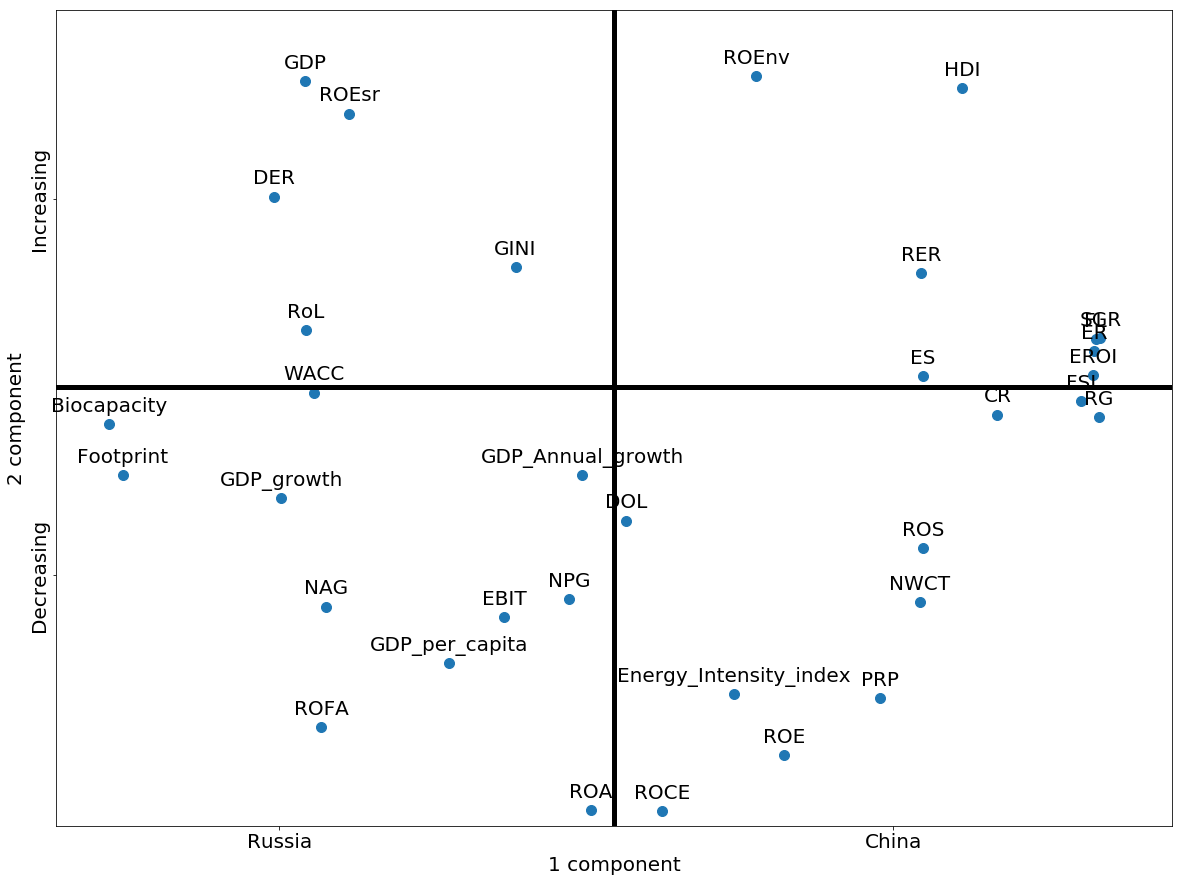

In [34]:
plt.figure(figsize=(20,15))
plt.scatter(qqq1[1],qqq1[2],100)
plt.plot([-0.3,0.3],[0,0],color='black')
plt.xticks([-0.18,0.15],['Russia', 'China'])
plt.yticks([-0.15,0.15],['Decreasing', 'Increasing'],rotation='vertical', verticalalignment='center')
plt.xlim((-0.3,0.3))
plt.plot([0,0],[-0.35,0.3],color='black')
plt.ylim((-0.35,0.3))
qqq3=qqq1.index
plt.xlabel('1 component')
plt.ylabel('2 component')
for el in range(len(qqq3)):
    plt.text(qqq1[1][qqq3[el]],qqq1[2][qqq3[el]]+0.01,qqq3[el],horizontalalignment='center',fontsize=20)

plt.show()

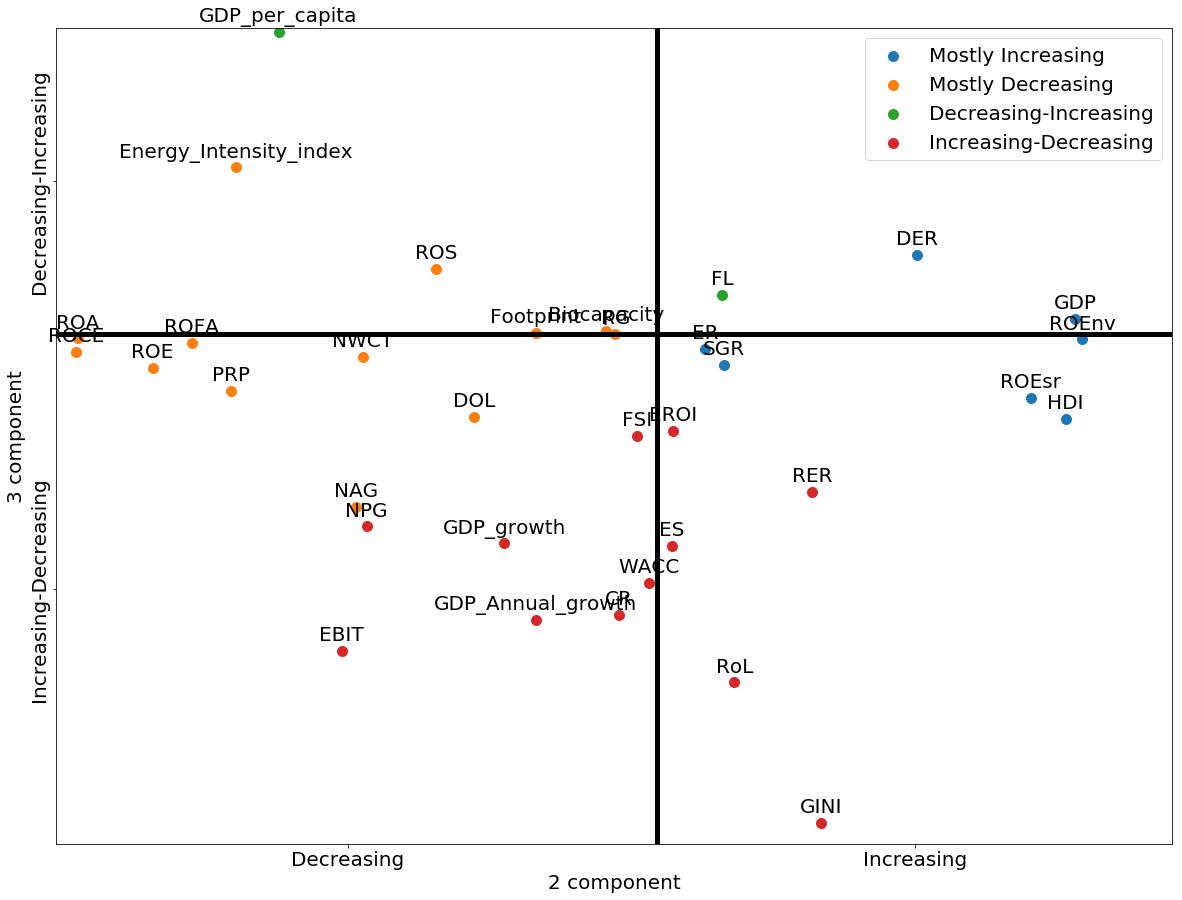

In [35]:
plt.figure(figsize=(20,15))
plt.xticks([-0.18,0.15],['Decreasing', 'Increasing'])
plt.yticks([-0.25,0.15],['Increasing-Decreasing', 'Decreasing-Increasing'],rotation='vertical', verticalalignment='center')
or1=(qqq1[2]>qqq1[3]) & (qqq1[2]>-qqq1[3])
or2=(qqq1[2]>qqq1[3]) & (qqq1[2]<-qqq1[3])
or3=(qqq1[2]<qqq1[3]) & (qqq1[2]>-qqq1[3])
or4=(qqq1[2]<qqq1[3]) & (qqq1[2]<-qqq1[3])
plt.scatter(qqq1[2][or1],qqq1[3][or1],100)
plt.scatter(qqq1[2][or4],qqq1[3][or4],100)
plt.scatter(qqq1[2][or3],qqq1[3][or3],100)
plt.scatter(qqq1[2][or2],qqq1[3][or2],100)
plt.legend(['Mostly Increasing','Mostly Decreasing','Decreasing-Increasing','Increasing-Decreasing'])
plt.plot([-0.35,0.3],[0,0],color='black')
plt.xlim((-0.35,0.3))
plt.plot([0,0],[-0.5,0.3],color='black')
plt.ylim((-0.5,0.3))
qqq3=qqq1.index
plt.xlabel('2 component')
plt.ylabel('3 component')
for el in range(len(qqq3)):
    plt.text(qqq1[2][qqq3[el]],qqq1[3][qqq3[el]]+0.01,qqq3[el],horizontalalignment='center',fontsize=20)

plt.show()

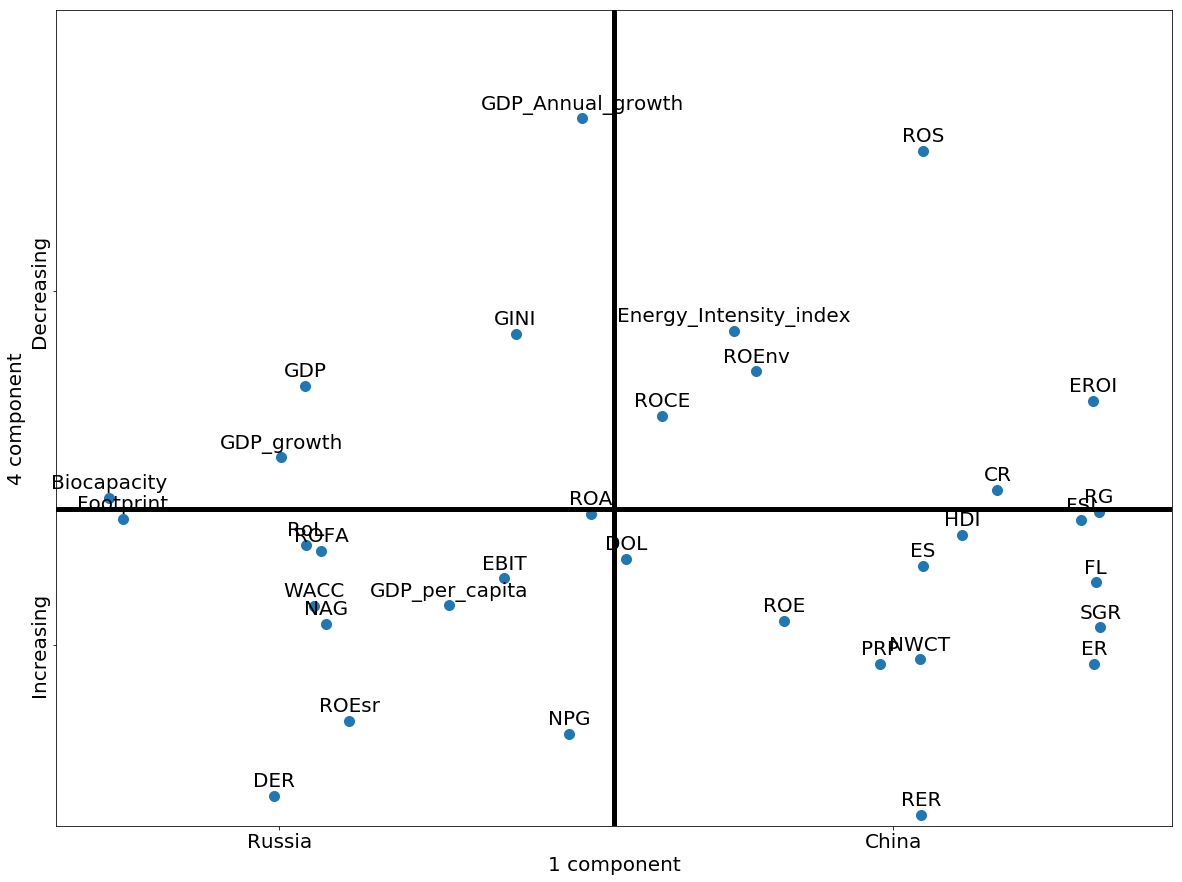

In [36]:
plt.figure(figsize=(20,15))
plt.scatter(qqq1[1],qqq1[4],100)
plt.plot([-0.3,0.3],[0,0],color='black')
plt.xticks([-0.18,0.15],['Russia', 'China'])
plt.yticks([-0.15,0.24],['Increasing', 'Decreasing'],rotation='vertical', verticalalignment='center')
plt.xlim((-0.3,0.3))
plt.plot([0,0],[-0.35,0.55],color='black')
plt.ylim((-0.35,0.55))
qqq3=qqq1.index
plt.xlabel('1 component')
plt.ylabel('4 component')
for el in range(len(qqq3)):
    plt.text(qqq1[1][qqq3[el]],qqq1[4][qqq3[el]]+0.01,qqq3[el],horizontalalignment='center',fontsize=20)

plt.show()

In [37]:
mds_representation[:21].T[0]

array([4.78255662, 3.84782337, 3.40269928, 3.28320269, 3.29672399,
       3.50311321, 3.79712727, 3.22245714, 3.16100399, 4.28420539,
       3.69333715, 2.94685611, 3.41897038, 3.91191934, 3.58638717,
       3.96422644, 3.22746537, 3.39849419, 4.02453285, 3.44660047,
       3.60553486])

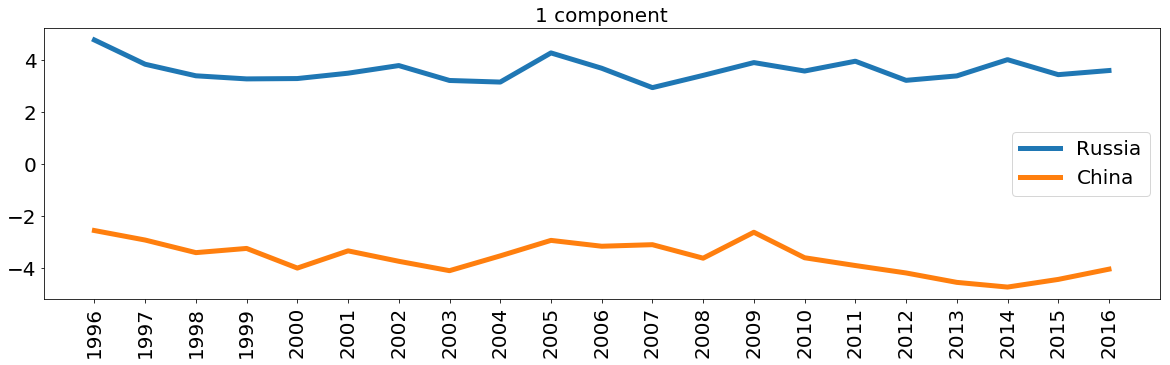

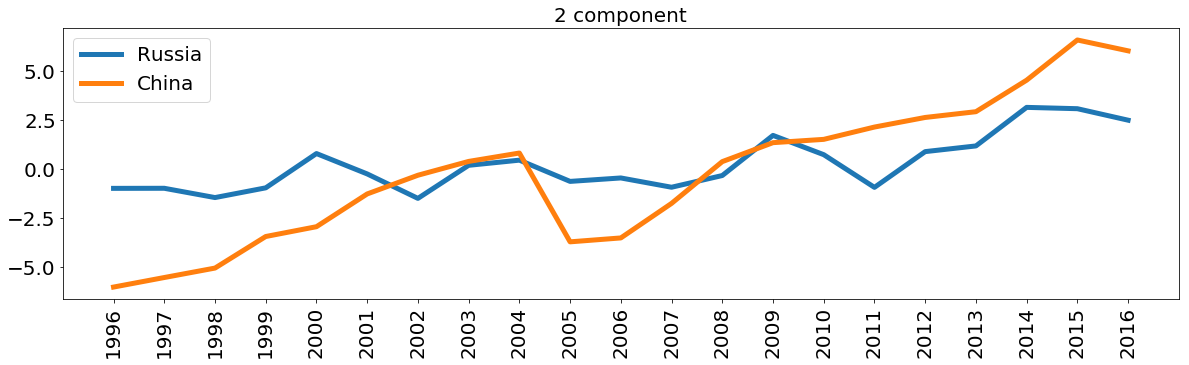

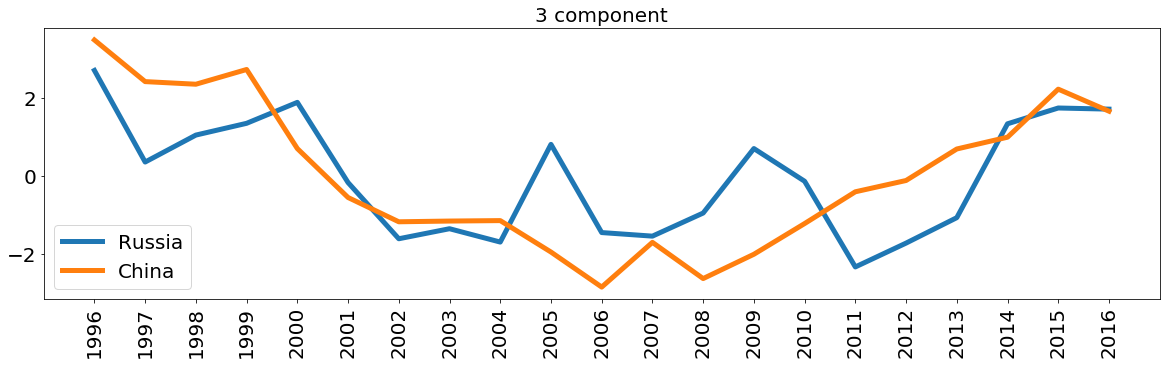

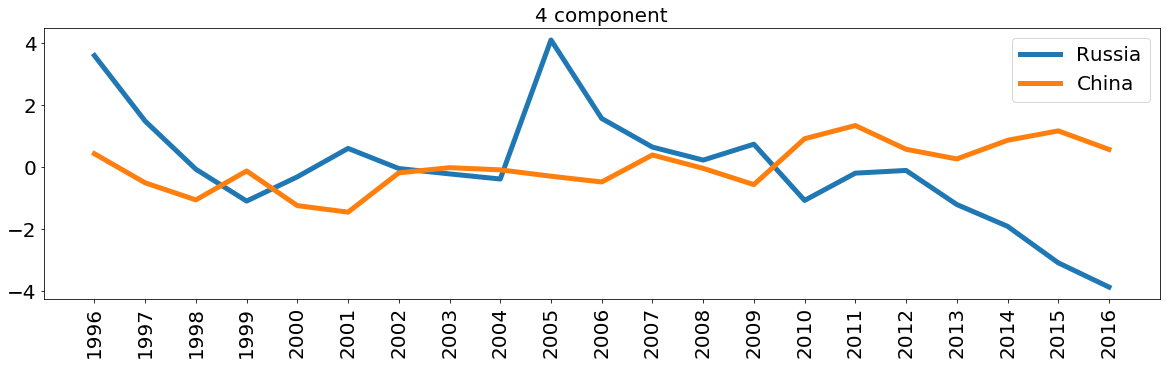

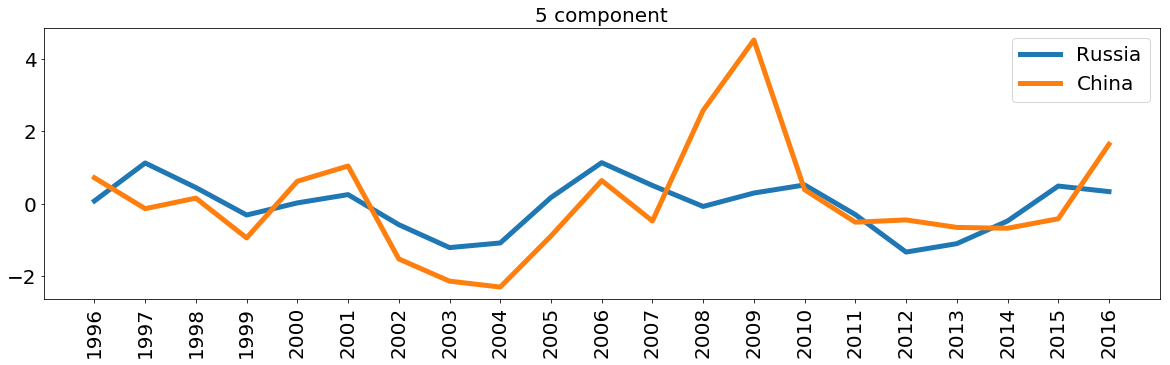

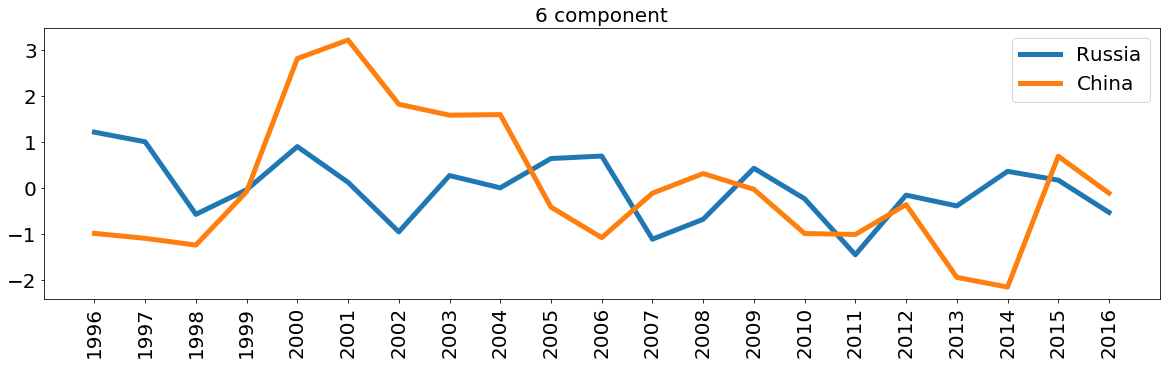

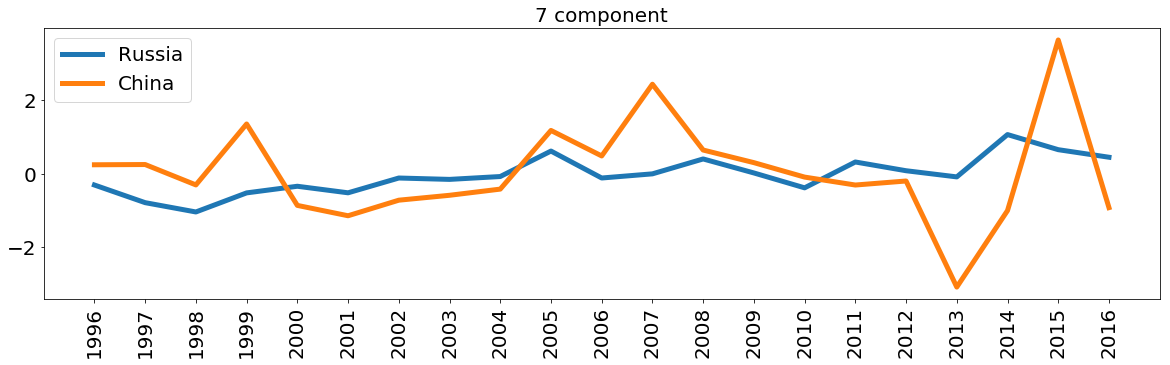

In [38]:
for el in range(7):
    plt.figure(figsize=(20,5))
    plt.title('{} component'.format(el+1),fontsize=20)
    plt.plot(range(1996,2017),mds_representation[:21].T[el],linewidth=5)
    plt.plot(range(1996,2017),mds_representation[21:].T[el],linewidth=5)
    plt.legend(['Russia', 'China'])
    plt.xticks(range(1996,2017),range(1996,2017),rotation='vertical')
    plt.show()    

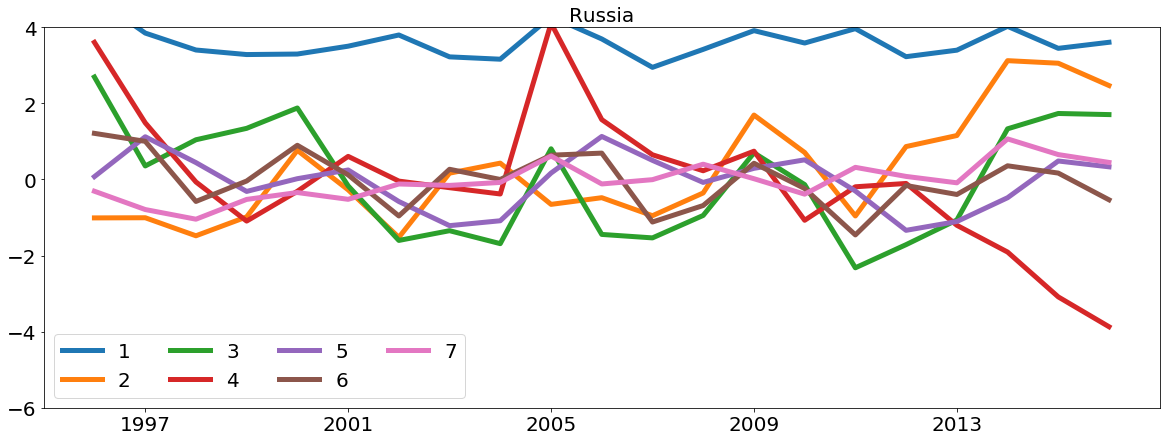

In [39]:
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
plt.figure(figsize=(20,7))
plt.ylim(-6,4)
plt.title('Russia',fontsize=20)
plt.plot(srf2.index,mds_representation[:21],linewidth=5)
plt.legend(range(1,8),ncol=4)
plt.show()

In [40]:
ff1=pd.DataFrame(np.array([range(14)]).T+21,columns=['x'])
ff1['x2']=ff1['x']**2
ff1.index=list(map(lambda x: datetime(x+1996,1,1,0,0,0),ff1.x))

ff1.tail()

x    x2
2026-01-01  30   900
2027-01-01  31   961
2028-01-01  32  1024
2029-01-01  33  1089
2030-01-01  34  1156

best parameters: (0, 0, 1, 0). AIC=31.37770333898345
best parameters: (0, 1, 0, 0). AIC=31.24328261718325
best parameters: (0, 1, 1, 0). AIC=26.106221426830466
                                 Statespace Model Results                                
Dep. Variable:                                c1   No. Observations:                   21
Model:             SARIMAX(0, 1, 1)x(1, 0, 0, 9)   Log Likelihood                  -9.053
Date:                           Thu, 05 Sep 2019   AIC                             26.106
Time:                                   16:56:11   BIC                             30.284
Sample:                               01-01-1996   HQIC                            27.013
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

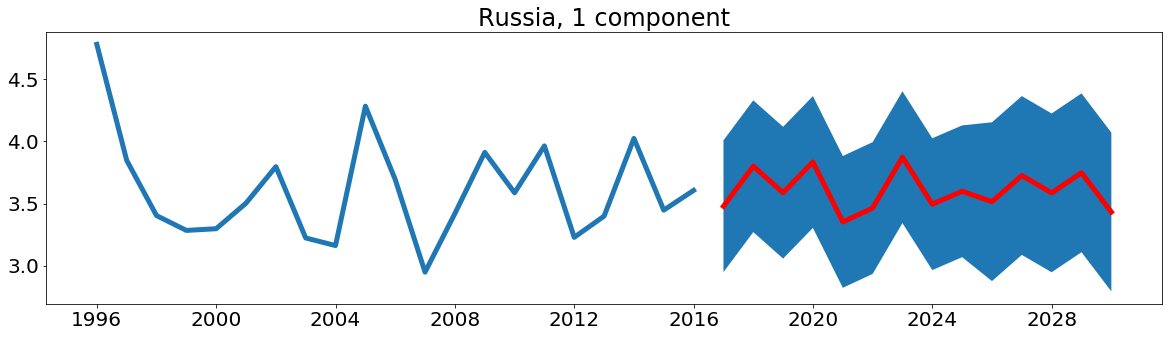

best parameters: (0, 0, 1, 0). AIC=62.277658818498665
                                 Statespace Model Results                                
Dep. Variable:                                c2   No. Observations:                   21
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 9)   Log Likelihood                 -28.139
Date:                           Thu, 05 Sep 2019   AIC                             62.278
Time:                                   16:56:12   BIC                             65.411
Sample:                               01-01-1996   HQIC                            62.958
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.1969      0.401      0.490      0.624      -0.590  

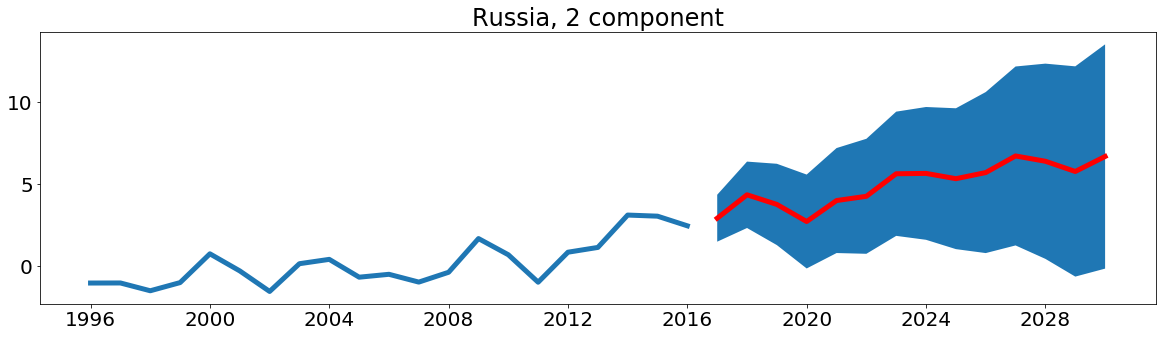

best parameters: (0, 0, 1, 0). AIC=67.97551579155086
                                 Statespace Model Results                                
Dep. Variable:                                c3   No. Observations:                   21
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 9)   Log Likelihood                 -30.988
Date:                           Thu, 05 Sep 2019   AIC                             67.976
Time:                                   16:56:13   BIC                             71.109
Sample:                               01-01-1996   HQIC                            68.656
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.0373      0.430      0.087      0.931      -0.806   

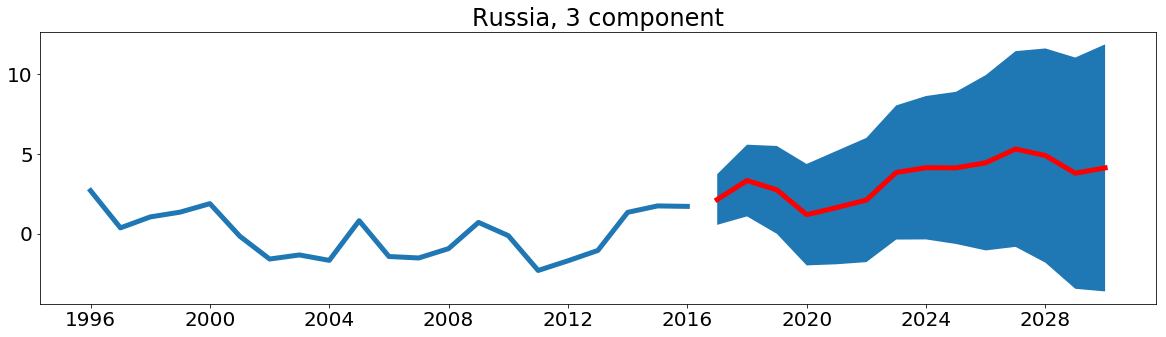

best parameters: (0, 0, 1, 0). AIC=77.68770920168342
best parameters: (0, 1, 0, 0). AIC=77.1026502979366
                           Statespace Model Results                           
Dep. Variable:                     c4   No. Observations:                   21
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -35.551
Date:                Thu, 05 Sep 2019   AIC                             77.103
Time:                        16:56:14   BIC                             80.236
Sample:                    01-01-1996   HQIC                            77.783
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x             -0.3369      0.375     -0.898      0.369      -1.072       0.398
ma.L1         -0.2608     

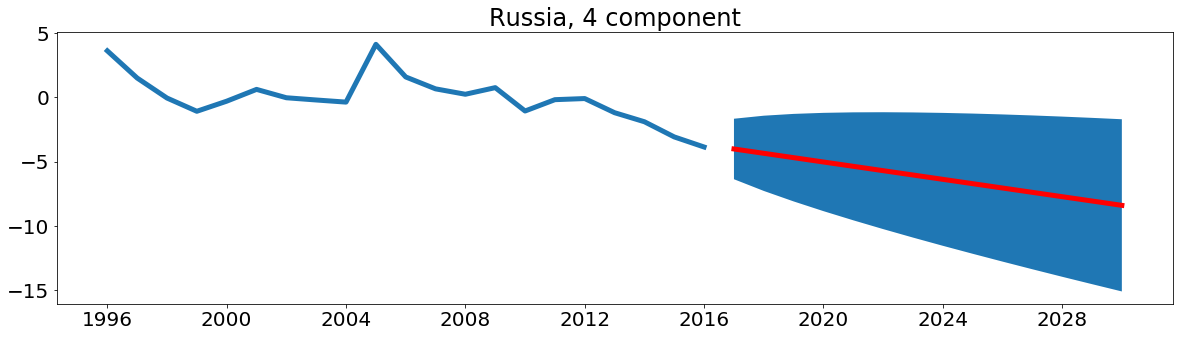

best parameters: (0, 0, 1, 0). AIC=27.38898838021449
                                 Statespace Model Results                                
Dep. Variable:                                c5   No. Observations:                   21
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 9)   Log Likelihood                 -10.694
Date:                           Thu, 05 Sep 2019   AIC                             27.389
Time:                                   16:56:15   BIC                             30.523
Sample:                               01-01-1996   HQIC                            28.069
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x             -0.0027      0.235     -0.011      0.991      -0.464   

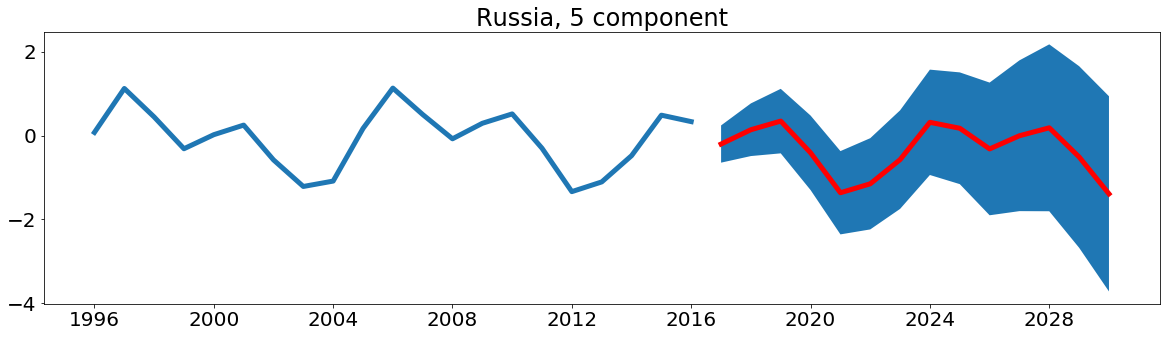

best parameters: (0, 0, 1, 0). AIC=37.994131877632945
best parameters: (0, 1, 1, 0). AIC=31.00598170567566
                                 Statespace Model Results                                
Dep. Variable:                                c6   No. Observations:                   21
Model:             SARIMAX(0, 1, 1)x(1, 0, 0, 9)   Log Likelihood                 -11.503
Date:                           Thu, 05 Sep 2019   AIC                             31.006
Time:                                   16:56:18   BIC                             35.184
Sample:                               01-01-1996   HQIC                            31.913
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x             -

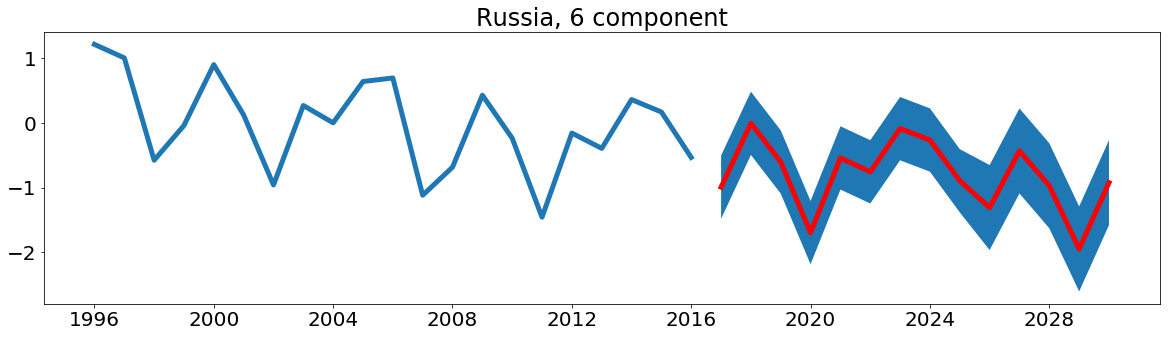

best parameters: (0, 1, 0, 0). AIC=21.59788939395682
                           Statespace Model Results                           
Dep. Variable:                     c7   No. Observations:                   21
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  -7.799
Date:                Thu, 05 Sep 2019   AIC                             21.598
Time:                        16:56:19   BIC                             24.731
Sample:                    01-01-1996   HQIC                            22.278
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.0610      0.012      4.961      0.000       0.037       0.085
ma.L1         -0.9993     29.109     -0.034      0.973     -58.051      56.052

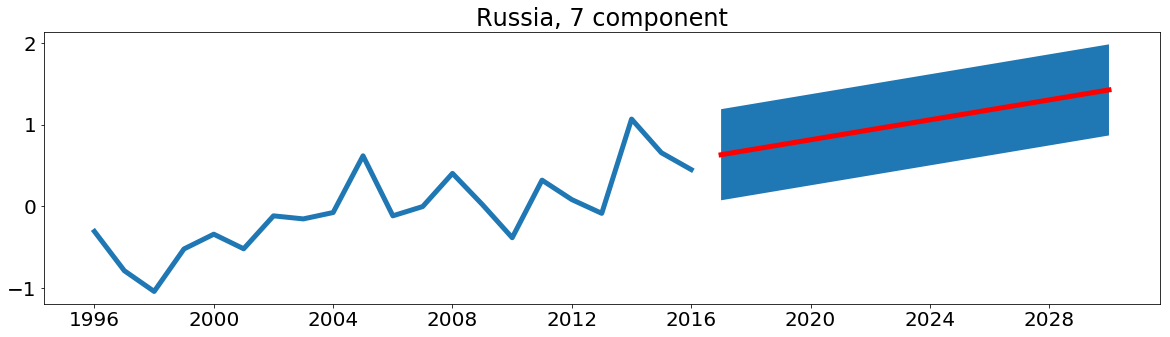

In [41]:
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 5

ff=pd.DataFrame(mds_representation[:21],columns=list(map(lambda x: 'c'+str(x+1),range(7))),index=srf2.index)
ff['x']=list(map(lambda x: x.year-1996,ff.index))
ff['x2']=ff['x']**2

lr=[]
mr=[]
ur=[]
models_r=[]
for el in range(7):
    ss1='c'+str(el+1)
    ps = range(0, 2) 
    d=1
    qs = range(0, 2) 
    Ps = range(0, 2) 
    D=0
    Qs = range(0, 2) 

    parameters = itertools.product(ps, qs, Ps, Qs)
    parameters_list = list(parameters)
    len(parameters_list)
    best_aic = 99999999999
    best_params=(8,1,1,1)
    excl_params=[]
# parameters_list=[(2,2,2,1)]

    warnings.filterwarnings('ignore')

    for param in parameters_list:
        if not (param in excl_params):
            #print (param)
            #try except нужен, потому что на некоторых наборах параметров модель не обучается
            try:
                model=sm.tsa.statespace.SARIMAX(ff[ss1], 
                                        order=(param[0], d, param[1]), 
                                        exog=ff[['x']],
                                        seasonal_order=(param[2], D, param[3], 9)).fit(disp=-1)
            #выводим параметры, на которых модель не обучается и переходим к следующему набору
            except ValueError:
                #print('wrong parameters:', param)
                continue
            aic = model.aic
            #сохраняем лучшую модель, aic, параметры
            if aic < best_aic:
                best_model = model
                best_aic = aic
                best_param = param
                print('best parameters: {}. AIC={}'.format(param,aic))
            #results.append([param, model.aic])
    
    warnings.filterwarnings('default')
    print(best_model.summary()) 
    res=best_model.get_prediction(start=len(ff), end=len(ff)+13,exog=ff1[['x']])
    models_r.append(res)
    res_lo= res.conf_int(alpha=0.1)['lower '+ss1]
    lr.append(res_lo)
    res_up= res.conf_int(alpha=0.1)['upper '+ss1]
    ur.append(res_up)
    res_mn= res.predicted_mean
    mr.append(res_mn)
    plt.figure(figsize=(20,5))
    plt.title ('Russia, {} component'.format(el+1))
    plt.plot(ff[ss1])
    plt.fill_between(res_lo.index,np.array(res_lo),np.array(res_up))
    plt.plot(res_mn,color='red')
    plt.show()

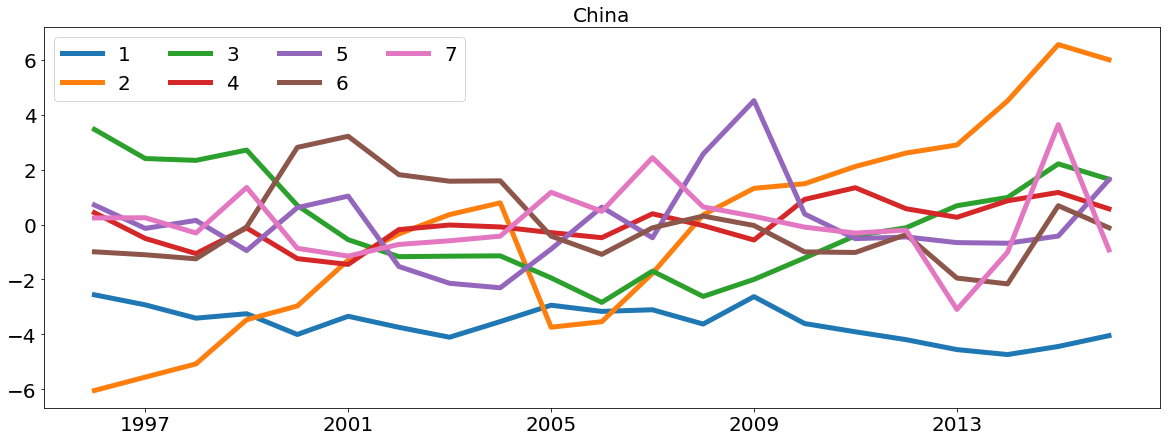

In [42]:
#mdl=TruncatedSVD(n_components=10)
#mds_representation=mdl.fit_transform(np.vstack((X,kl2)))
#mds_representation=mdl.fit_transform(np.vstack((np.array(srf2),np.array(scf2))))
plt.figure(figsize=(20,7))
plt.title('China',fontsize=20)
plt.plot(srf2.index,mds_representation[21:],linewidth=5)
plt.legend(range(1,8),ncol=4)
plt.show()

best parameters: (0, 0, 1, 0). AIC=35.146089939867764
best parameters: (0, 1, 0, 0). AIC=33.21148213708148
best parameters: (0, 1, 1, 0). AIC=32.064836180982766
                                 Statespace Model Results                                
Dep. Variable:                                c1   No. Observations:                   21
Model:             SARIMAX(0, 1, 1)x(1, 0, 0, 6)   Log Likelihood                 -12.032
Date:                           Thu, 05 Sep 2019   AIC                             32.065
Time:                                   16:56:39   BIC                             36.243
Sample:                               01-01-1996   HQIC                            32.972
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

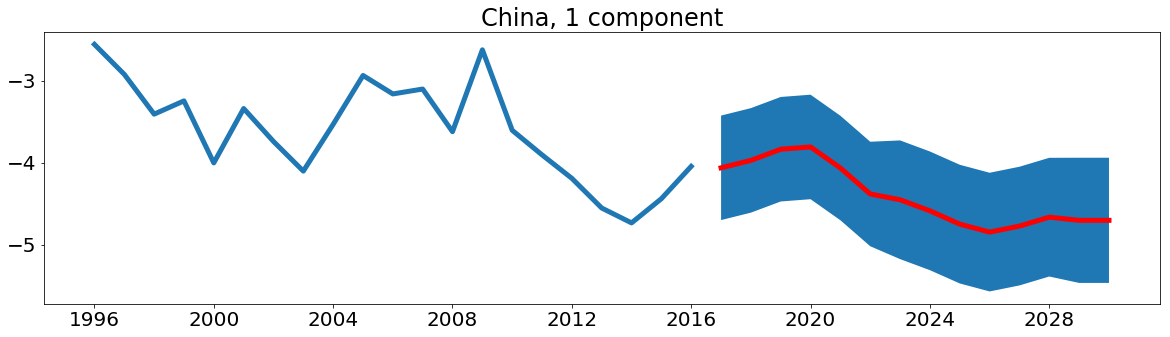

best parameters: (0, 0, 1, 0). AIC=75.27998983592249
best parameters: (0, 1, 0, 0). AIC=74.88509713716064
best parameters: (1, 1, 0, 0). AIC=74.72448043176144
                           Statespace Model Results                           
Dep. Variable:                     c2   No. Observations:                   21
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -33.362
Date:                Thu, 05 Sep 2019   AIC                             74.724
Time:                        16:56:41   BIC                             78.903
Sample:                    01-01-1996   HQIC                            75.631
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.5618      0.170      3.296      0.

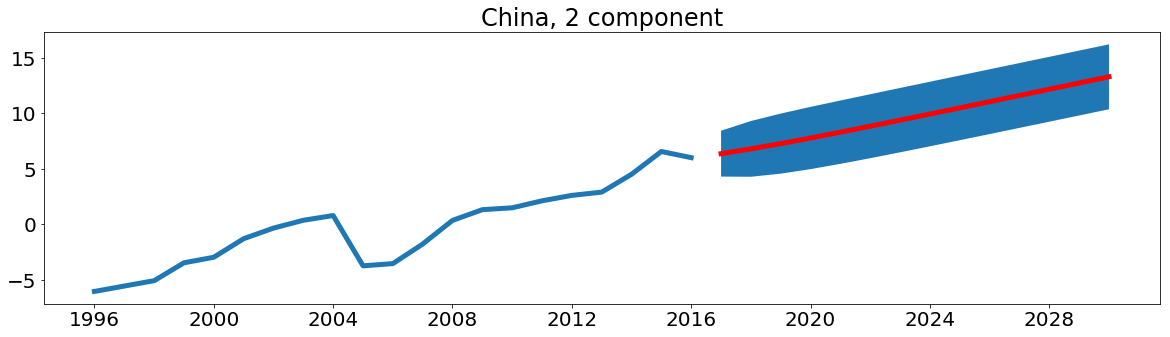

best parameters: (0, 0, 1, 0). AIC=56.96056398773408
best parameters: (0, 1, 0, 0). AIC=56.69568680450674
best parameters: (1, 0, 0, 0). AIC=56.60739537761538
                           Statespace Model Results                           
Dep. Variable:                     c3   No. Observations:                   21
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -25.304
Date:                Thu, 05 Sep 2019   AIC                             56.607
Time:                        16:56:42   BIC                             59.741
Sample:                    01-01-1996   HQIC                            57.287
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x             -0.1029      0.233     -0.442      0.

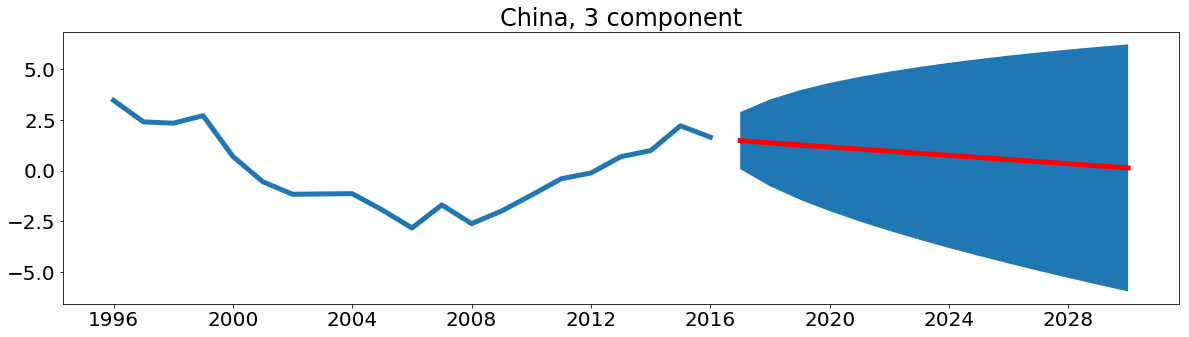

best parameters: (0, 0, 1, 0). AIC=47.08727357493677
best parameters: (0, 1, 0, 0). AIC=42.96763645934867
                           Statespace Model Results                           
Dep. Variable:                     c4   No. Observations:                   21
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -18.484
Date:                Thu, 05 Sep 2019   AIC                             42.968
Time:                        16:56:45   BIC                             46.101
Sample:                    01-01-1996   HQIC                            43.648
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.0819      0.028      2.893      0.004       0.026       0.137
ma.L1         -0.9985    

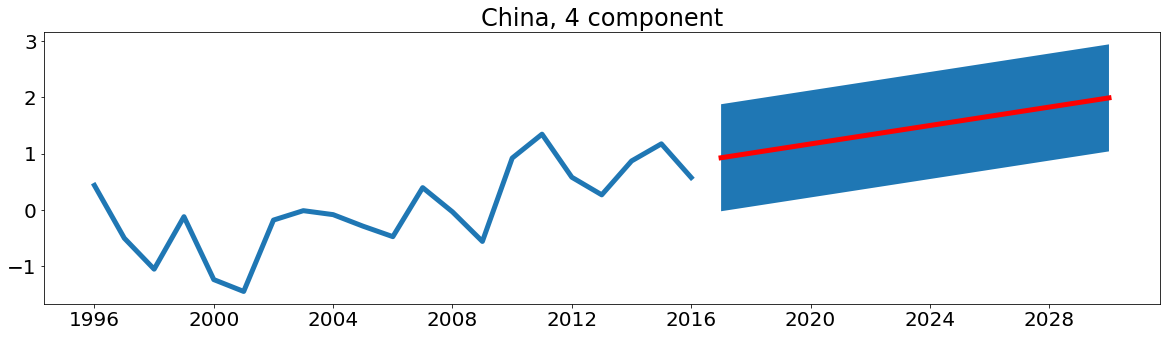

best parameters: (0, 0, 1, 0). AIC=79.85837663453198
best parameters: (1, 1, 1, 0). AIC=79.45272949828934
                                 Statespace Model Results                                
Dep. Variable:                                c5   No. Observations:                   21
Model:             SARIMAX(1, 1, 1)x(1, 0, 0, 6)   Log Likelihood                 -34.726
Date:                           Thu, 05 Sep 2019   AIC                             79.453
Time:                                   16:56:48   BIC                             84.675
Sample:                               01-01-1996   HQIC                            80.586
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0

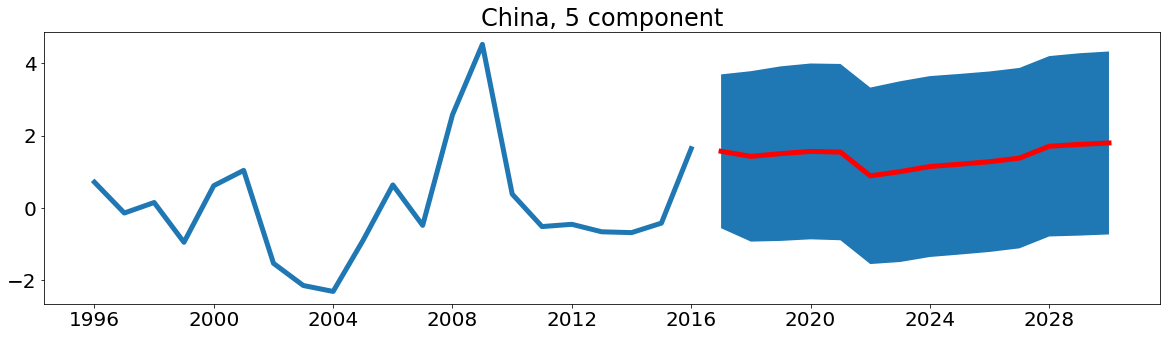

best parameters: (0, 0, 1, 0). AIC=69.16504838295636
best parameters: (0, 1, 0, 0). AIC=68.3437969265293
best parameters: (1, 1, 0, 0). AIC=68.21329113331618
                           Statespace Model Results                           
Dep. Variable:                     c6   No. Observations:                   21
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -30.107
Date:                Thu, 05 Sep 2019   AIC                             68.213
Time:                        16:56:51   BIC                             72.391
Sample:                    01-01-1996   HQIC                            69.120
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x             -0.0129      0.409     -0.031      0.9

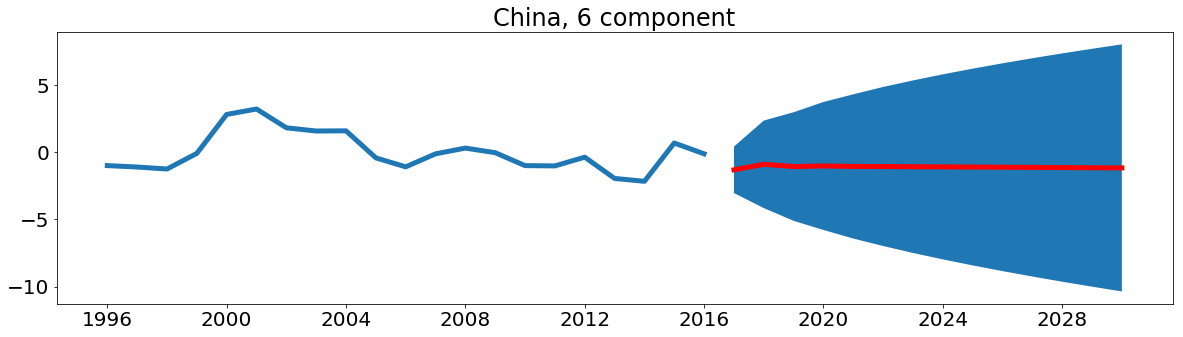

best parameters: (0, 0, 1, 0). AIC=88.48515048699988
best parameters: (0, 1, 0, 0). AIC=78.66435337726826
best parameters: (0, 1, 1, 0). AIC=78.24991447130476
                                 Statespace Model Results                                
Dep. Variable:                                c7   No. Observations:                   21
Model:             SARIMAX(0, 1, 1)x(1, 0, 0, 6)   Log Likelihood                 -35.125
Date:                           Thu, 05 Sep 2019   AIC                             78.250
Time:                                   16:56:53   BIC                             82.428
Sample:                               01-01-1996   HQIC                            79.157
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

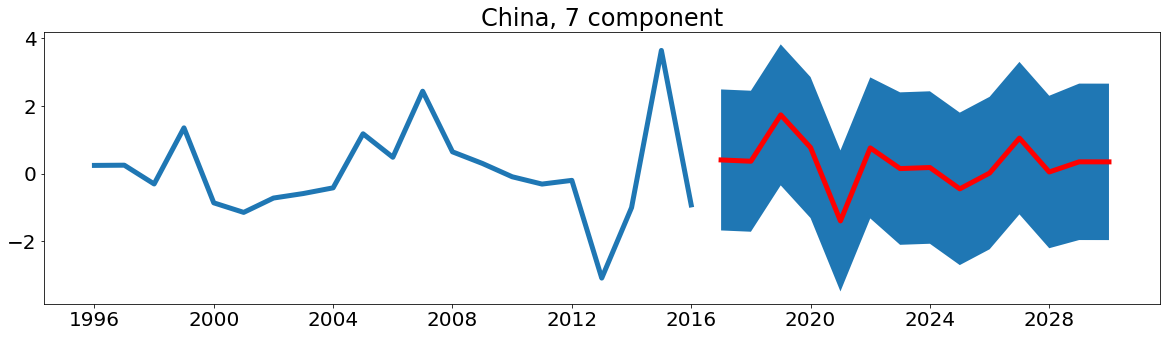

In [43]:
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 5
ff=pd.DataFrame(mds_representation[21:],columns=list(map(lambda x: 'c'+str(x+1),range(7))),index=srf2.index)
ff['x']=list(map(lambda x: x.year-1996,ff.index))
ff['x2']=ff['x']**2

lc=[]
mc=[]
uc=[]
models_c=[]

for el in range(7):
    ss1='c'+str(el+1)
    ps = range(0, 2) 
    d=1
    qs = range(0, 2) 
    Ps = range(0, 2) 
    D=0
    Qs = range(0, 2) 

    parameters = itertools.product(ps, qs, Ps, Qs)
    parameters_list = list(parameters)
    len(parameters_list)
    best_aic = 99999999999
    best_params=(8,1,1,1)
    excl_params=[]
# parameters_list=[(2,2,2,1)]

    warnings.filterwarnings('ignore')

    for param in parameters_list:
        if not (param in excl_params):
            #print (param)
            #try except нужен, потому что на некоторых наборах параметров модель не обучается
            try:
                model=sm.tsa.statespace.SARIMAX(ff[ss1], 
                                        order=(param[0], d, param[1]), 
                                        exog=ff[['x']],
                                        seasonal_order=(param[2], D, param[3], 6)).fit(disp=-1)
            #выводим параметры, на которых модель не обучается и переходим к следующему набору
            except ValueError:
                #print('wrong parameters:', param)
                continue
            aic = model.aic
            #сохраняем лучшую модель, aic, параметры
            if aic < best_aic:
                best_model = model
                best_aic = aic
                best_param = param
                print('best parameters: {}. AIC={}'.format(param,aic))
            #results.append([param, model.aic])
    
    warnings.filterwarnings('default')
    print(best_model.summary()) 
    res=best_model.get_prediction(start=len(ff), end=len(ff)+13,exog=ff1[['x']])
    models_c.append(res)
    res_lo= res.conf_int(alpha=0.1)['lower '+ss1]
    lc.append(res_lo)
    res_up= res.conf_int(alpha=0.1)['upper '+ss1]
    uc.append(res_up)
    res_mn= res.predicted_mean
    mc.append(res_mn)
    plt.figure(figsize=(20,5))
    plt.plot(ff[ss1])
    plt.title ('China, {} component'.format(el+1))
    plt.fill_between(res_lo.index,np.array(res_lo),np.array(res_up))
    plt.plot(res_mn,color='red')
    plt.show()

In [44]:
from matplotlib.patches import Ellipse
from matplotlib.collections import PatchCollection


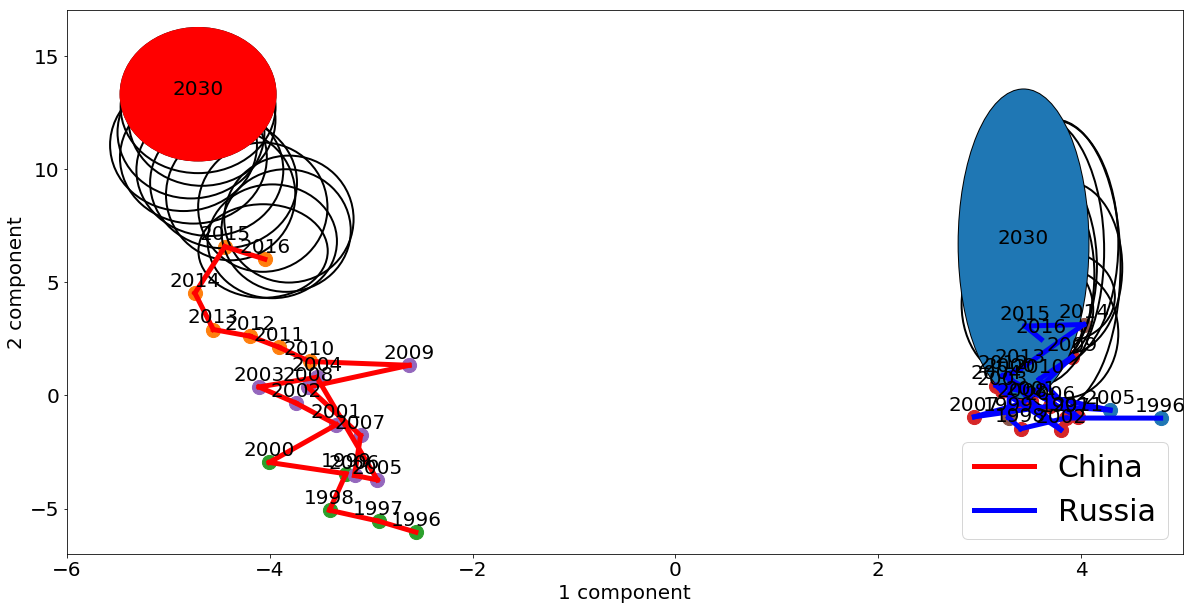

In [56]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlim((-6,5))
ax.set_ylim((-7,17))
xx=mds_representation.T[0]
yy=mds_representation.T[1]
xxr=mds_representation.T[0][:21]
yyr=mds_representation.T[1][:21]
xxc=mds_representation.T[0][21:]
yyc=mds_representation.T[1][21:]
ax.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='red')
ax.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
ax.legend(['China','Russia'],fontsize=30,loc='lower right')
cc1=(lr[0]+ur[0])/2
cc2=(lr[1]+ur[1])/2
rc1=(-lr[0]+ur[0])
rc2=(-lr[1]+ur[1])
pp=[]
for el in rc2.index:
    ax.add_artist(Ellipse((cc1[el],cc2[el]),rc1[el],rc2[el],linewidth=2, fill=False))
ax.add_artist(Ellipse((cc1[rc2.index[-1]],cc2[rc2.index[-1]]),rc1[rc2.index[-1]],rc2[rc2.index[-1]],linewidth=2))
ax.text(cc1[rc2.index[-1]],cc2[rc2.index[-1]],'2030',horizontalalignment='center',fontsize=20)

cc1=(lc[0]+uc[0])/2
cc2=(lc[1]+uc[1])/2
rc1=(-lc[0]+uc[0])
rc2=(-lc[1]+uc[1])
pp=[]
for el in rc2.index:
    ax.add_artist(Ellipse((cc1[el],cc2[el]),rc1[el],rc2[el],linewidth=2, fill=False))
ax.add_artist(Ellipse((cc1[rc2.index[-1]],cc2[rc2.index[-1]]),rc1[rc2.index[-1]],rc2[rc2.index[-1]],linewidth=2,color='red'))
ax.text(cc1[rc2.index[-1]],cc2[rc2.index[-1]],'2030',horizontalalignment='center',fontsize=20)

for el in range(2,len(xxc)):
    ax.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='red')
for el in range(2,len(xxr)):
    ax.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    ax.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if cf2.index[el].month==1:
        ax.text(xxc[el],yyc[el]+0.3,'{}'.format(scf2.index[el].year),horizontalalignment='center',fontsize=20)
for el in range(len(xxr)):
    if rf2.index[el].month==1:
        ax.text(xxr[el],yyr[el]+0.3,'{}'.format(srf2.index[el].year),horizontalalignment='center',fontsize=20)
plt.xlabel('1 component')
plt.ylabel('2 component')

plt.show()

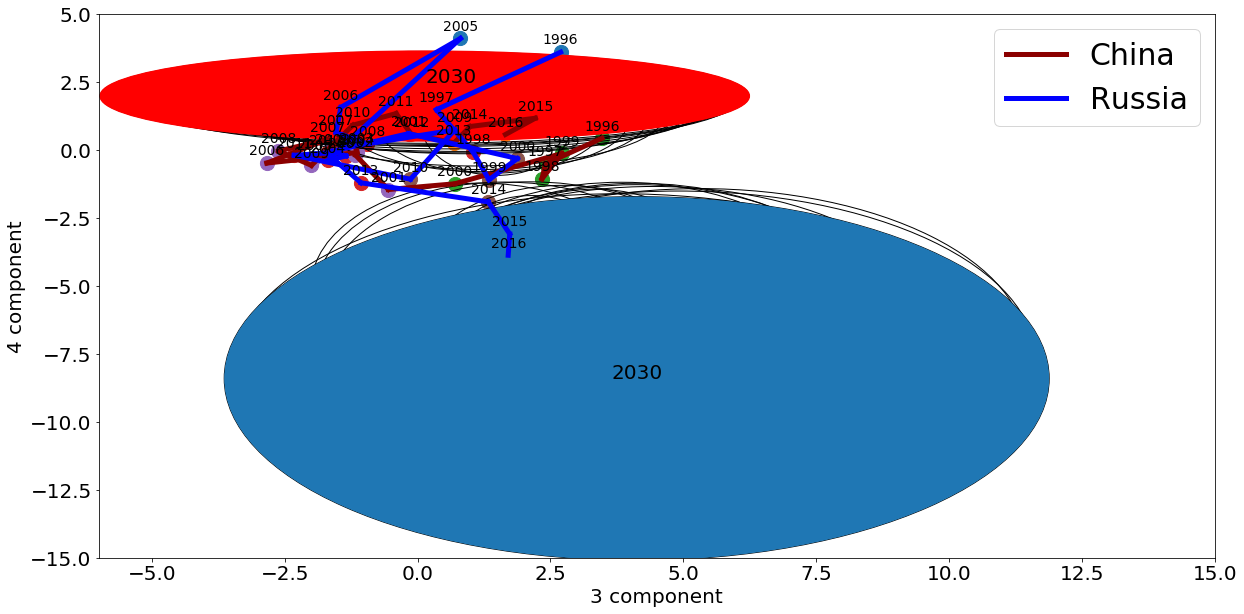

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlim((-6,15))
ax.set_ylim((-15,5))
xx=mds_representation.T[2]
yy=mds_representation.T[3]
xxr=mds_representation.T[2][:21]
yyr=mds_representation.T[3][:21]
xxc=mds_representation.T[2][21:]
yyc=mds_representation.T[3][21:]
ax.plot([xxc[0],xxc[1]],[yyc[0],yyc[1]],linewidth=5,color='darkred')
ax.plot([xxr[0],xxr[1]],[yyr[0],yyr[1]],linewidth=5,color='blue')
ax.legend(['China','Russia'],fontsize=30,loc='upper right')
cc1=(lr[2]+ur[2])/2
cc2=(lr[3]+ur[3])/2
rc1=(-lr[2]+ur[2])
rc2=(-lr[3]+ur[3])
pp=[]
for el in rc2.index:
    ax.add_artist(Ellipse((cc1[el],cc2[el]),rc1[el],rc2[el],linewidth=1, fill=False))
ax.add_artist(Ellipse((cc1[rc2.index[-1]],cc2[rc2.index[-1]]),rc1[rc2.index[-1]],rc2[rc2.index[-1]],linewidth=2))
ax.text(cc1[rc2.index[-1]],cc2[rc2.index[-1]],'2030',horizontalalignment='center',fontsize=20)

cc1=(lc[2]+uc[2])/2
cc2=(lc[3]+uc[3])/2
rc1=(-lc[2]+uc[2])
rc2=(-lc[3]+uc[4])
pp=[]
for el in rc2.index:
    ax.add_artist(Ellipse((cc1[el],cc2[el]),rc1[el],rc2[el],linewidth=1, fill=False))
ax.add_artist(Ellipse((cc1[rc2.index[-1]],cc2[rc2.index[-1]]),rc1[rc2.index[-1]],rc2[rc2.index[-1]],linewidth=2,color='red'))
ax.text(cc1[rc2.index[-1]]+0.5,cc2[rc2.index[-1]]+0.5,'2030',horizontalalignment='center',fontsize=20)

for el in range(2,len(xxc)):
    ax.plot([xxc[el-1],xxc[el]],[yyc[el-1],yyc[el]],linewidth=5,color='darkred')
for el in range(2,len(xxr)):
    ax.plot([xxr[el-1],xxr[el]],[yyr[el-1],yyr[el]],linewidth=5,color='blue')
for el in range(6):
    ax.scatter(xx[res1==el],yy[res1==el],200)
for el in range(len(xxc)):
    if cf2.index[el].month==1:
        ax.text(xxc[el],yyc[el]+0.3,'{}'.format(scf2.index[el].year),horizontalalignment='center',fontsize=14)
for el in range(len(xxr)):
    if rf2.index[el].month==1:
        ax.text(xxr[el],yyr[el]+0.3,'{}'.format(srf2.index[el].year),horizontalalignment='center',fontsize=14)
plt.xlabel('3 component')
plt.ylabel('4 component')

plt.show()

# Расчитываю возможные сценарии с вероятностью их реализации

In [56]:
it=itertools.product(np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),
                     np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),np.arange(0.1,1,0.4))
ll=3**7
ii=0
pii=0.01
ssl=list(map(lambda x: 'lower c'+str(x+1),range(7)))
ssu=list(map(lambda x: 'upper c'+str(x+1),range(7)))
ssp=list(map(lambda x: 'prob c'+str(x+1),range(7)))
it2=list(itertools.product(['lower c1','upper c1'],['lower c2','upper c2'],['lower c3','upper c3'],['lower c4','upper c4'],
                          ['lower c5','upper c5'],['lower c6','upper c6'],['lower c7','upper c7']))
clmns=list(map(lambda x: 'c'+str(x+1),range(7)))
yrs=np.array([range(2017,2031)]).T
mmm=np.zeros((0,36))
for rr in it:
    rrs=np.array([[np.product(rr)]*14]).T
    ii+=1
    #print(ii)    
    res_lo= models_r[0].conf_int(alpha=rr[0])
    for el in range(1,7):
        res_lo[ssl[el]]= models_r[el].conf_int(alpha=rr[el])[ssl[el]]
        res_lo[ssu[el]]= models_r[el].conf_int(alpha=rr[el])[ssu[el]]
    mm1=np.zeros((0,36))
    for el in it2:
        mm1=np.vstack((mm1,np.hstack((mms.inverse_transform(mdl.inverse_transform(res_lo[list(el)])),yrs,rrs))))
    mmm=np.vstack((mmm,mm1))
    del mm1
mmm

array([[3.60021473e+00, 1.42424552e+00, 1.33610189e+00, ...,
        1.34844486e+00, 2.01700000e+03, 1.00000000e-07],
       [3.57207382e+00, 1.41662671e+00, 1.63237333e+00, ...,
        1.41853691e+00, 2.01800000e+03, 1.00000000e-07],
       [3.58865896e+00, 1.43434746e+00, 1.62948248e+00, ...,
        1.46829806e+00, 2.01900000e+03, 1.00000000e-07],
       ...,
       [3.48540264e+00, 1.60182032e+00, 1.07305914e+00, ...,
        1.69552174e+00, 2.02800000e+03, 4.78296900e-01],
       [3.51290717e+00, 1.67713926e+00, 1.10497412e+00, ...,
        1.72820642e+00, 2.02900000e+03, 4.78296900e-01],
       [3.49959872e+00, 1.65301113e+00, 1.16345918e+00, ...,
        1.77405851e+00, 2.03000000e+03, 4.78296900e-01]])

In [57]:
mmm1=mmm.T
del mmm
for num,el in enumerate(srf1.columns):
    mmm1[num]= (mmm1[num] if preobr[el]==0 else np.exp(mmm1[num]) if preobr[el]==1 else 
        ((np.exp(mmm1[num])/(1+ np.exp(mmm1[num]))-0.01)/0.98))
mmm=mmm1.T
del mmm1



In [58]:
dfr=pd.DataFrame(mmm,columns=list(srf2.columns)+['year','prob'])
dfr.head()

GINI       HDI        ER  Footprint  Biocapacity           GDP  \
0  36.606094  0.812248  3.804185   0.406999     0.635681  1.266884e+06   
1  35.590325  0.811030  5.116002   0.395297     0.611141  9.158846e+05   
2  36.185517  0.813855  5.101234   0.392651     0.607079  7.938078e+05   
3  37.841641  0.831480  5.813514   0.378749     0.591130  1.230411e+06   
4  37.422462  0.824535  6.479344   0.392389     0.607843  9.372291e+05   

   GDP_growth  GDP_per_capita  GDP_Annual_growth  Energy_Intensity_index  \
0   -0.006067      255.885217          -0.331283                5.673028   
1   -0.015840      326.342768          -0.436574                5.708764   
2   -0.005290      227.742282          -0.485962                5.561891   
3    0.007046      105.749636          -0.443458                4.083059   
4    0.008306      128.622482          -0.521906                4.073490   

       ...            EBIT      WACC        RG       NPG       NAG        FL  \
0      ...       14.261818  0.125932  1.044493  0.083417  0.026848  1.864212   
1      ...       13.325522  0.130295  1.081979  0.108751  0.019696  1.950824   
2      ...       16.237505  0.165955  1.025710  0.177567  0.062139  1.953654   
3      ...       19.340635  0.216845  1.029365  0.194544  0.084928  1.984772   
4      ...       19.832429  0.245491  0.978876  0.156424  0.080438  1.965544   

        DOL       DER    year          prob  
0 -0.868226  1.348445  2017.0  1.000000e-07  
1 -1.156527  1.418537  2018.0  1.000000e-07  
2 -0.282979  1.468298  2019.0  1.000000e-07  
3 -0.307695  1.530240  2020.0  1.000000e-07  
4 -1.013728  1.602765  2021.0  1.000000e-07  

[5 rows x 36 columns]

In [59]:
del mmm

In [ ]:
dfr.to_csv('russia_progn.csv',index=False,sep=';')

In [60]:
dfrm=pd.DataFrame(dfr.min(),columns=['min'],index=dfr.columns)
dfrm['max']=dfr.max()
dfrm

min           max
GINI                    2.502210e+01  4.449336e+01
HDI                     7.418634e-01  9.164202e-01
ER                      3.678325e-01  3.516704e+01
Footprint               2.743557e-01  5.698928e-01
Biocapacity             4.482714e-01  9.599348e-01
GDP                     3.627056e+04  1.171037e+08
GDP_growth             -1.723878e-01  5.716184e-02
GDP_per_capita         -5.195939e+02  1.301476e+03
GDP_Annual_growth      -1.688169e+00  3.540559e-01
Energy_Intensity_index -3.769328e+00  1.177559e+01
FSI                     1.150573e-01  3.821996e-01
SGR                     2.612539e-02  7.065441e-01
EROI                   -1.277225e-01  4.259237e-01
PRP                     4.289951e-02  3.608806e-01
ES                      1.663360e+02  4.786540e+03
ROEnv                  -7.943736e-03  2.542616e-01
RoL                    -6.366545e-03  2.706727e-01
ROEsr                   4.178413e-02  2.915952e-01
RER                     4.842053e-02  1.010039e+00
CR                      4.934053e-01  2.489367e+00
NWCT                   -1.932734e+01  3.726521e+01
ROFA                    2.872127e-02  6.794219e-01
ROS                    -8.386868e-03  2.874090e-01
ROCE                    1.371366e-02  1.962249e-01
ROA                     3.080568e-02  1.706495e-01
ROE                     7.310264e-02  4.735750e-01
EBIT                   -1.320578e+01  2.569226e+01
WACC                   -4.129556e-01  4.820923e-01
RG                      6.477033e-01  1.287268e+00
NPG                    -1.157000e+00  9.945725e-01
NAG                    -3.588396e-01  2.249807e-01
FL                      1.271392e+00  2.791423e+00
DOL                    -7.316307e+00  3.771886e+00
DER                     7.878871e-01  2.681635e+00
year                    2.017000e+03  2.030000e+03
prob                    1.000000e-07  4.782969e-01

In [61]:
for el in dfrm.index[:-2]:
    print('{} {}'.format(el,np.array(dfrm[dfrm.index==el])[0]))

GINI [25.02209516 44.49336432]
HDI [0.74186337 0.9164202 ]
ER [ 0.36783247 35.1670443 ]
Footprint [0.27435573 0.56989283]
Biocapacity [0.44827139 0.95993481]
GDP [3.62705601e+04 1.17103659e+08]
GDP_growth [-0.17238777  0.05716184]
GDP_per_capita [-519.59390867 1301.47564412]
GDP_Annual_growth [-1.68816863  0.35405593]
Energy_Intensity_index [-3.76932768 11.77559176]
FSI [0.11505726 0.38219963]
SGR [0.02612539 0.70654409]
EROI [-0.12772253  0.42592372]
PRP [0.04289951 0.36088057]
ES [ 166.33597851 4786.54003509]
ROEnv [-0.00794374  0.25426161]
RoL [-0.00636654  0.27067274]
ROEsr [0.04178413 0.29159517]
RER [0.04842053 1.0100393 ]
CR [0.49340532 2.48936698]
NWCT [-19.3273426   37.26521121]
ROFA [0.02872127 0.67942188]
ROS [-0.00838687  0.28740901]
ROCE [0.01371366 0.19622486]
ROA [0.03080568 0.17064953]
ROE [0.07310264 0.47357501]
EBIT [-13.20578247  25.69225797]
WACC [-0.4129556  0.4820923]
RG [0.6477033  1.28726842]
NPG [-1.15699981  0.99457254]
NAG [-0.35883956  0.22498072]
FL [1.2713

In [62]:
dfr1=dfr[dfr.year==2030]

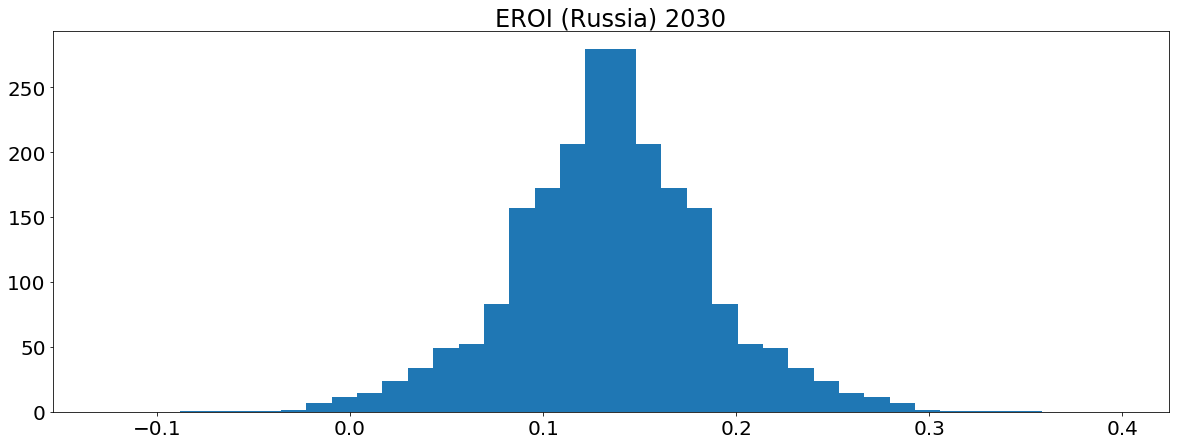

In [63]:
plt.figure(figsize=(20,7))
plt.hist(dfr1.EROI,40,weights=dfr1.prob)
plt.title('EROI (Russia) 2030')
plt.show()

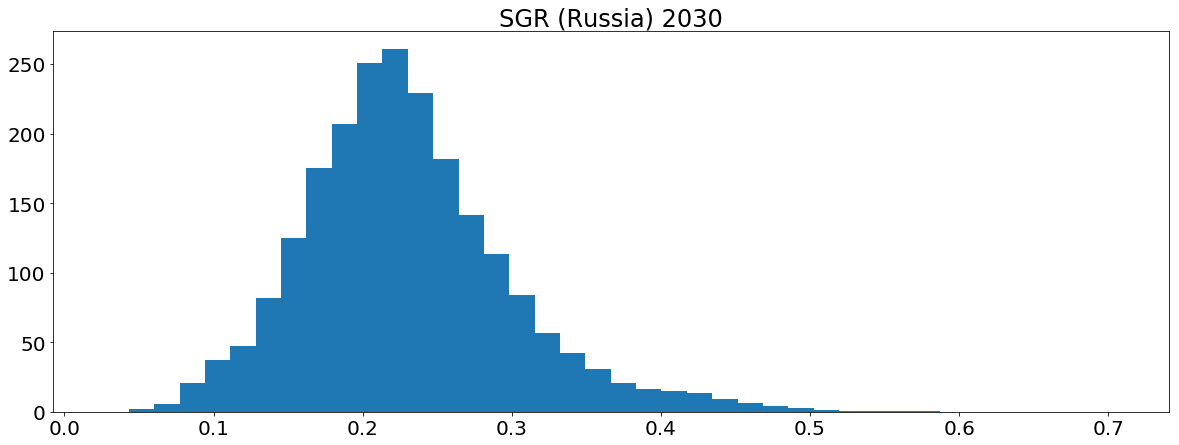

In [64]:
plt.figure(figsize=(20,7))
plt.hist(dfr1.SGR,40,weights=dfr1.prob)
plt.title('SGR (Russia) 2030')
plt.show()

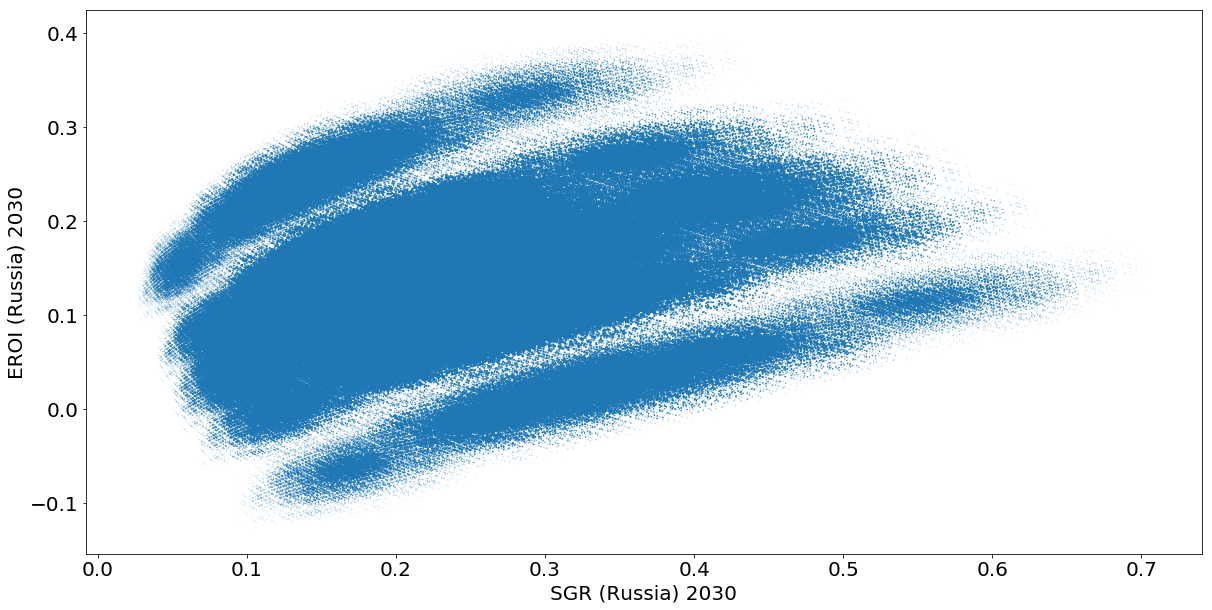

In [65]:
plt.figure(figsize=(20,10))
plt.scatter(dfr1.SGR,dfr1.EROI,dfr1.prob*1000)
plt.xlabel('SGR (Russia) 2030')
plt.ylabel('EROI (Russia) 2030')
plt.show()

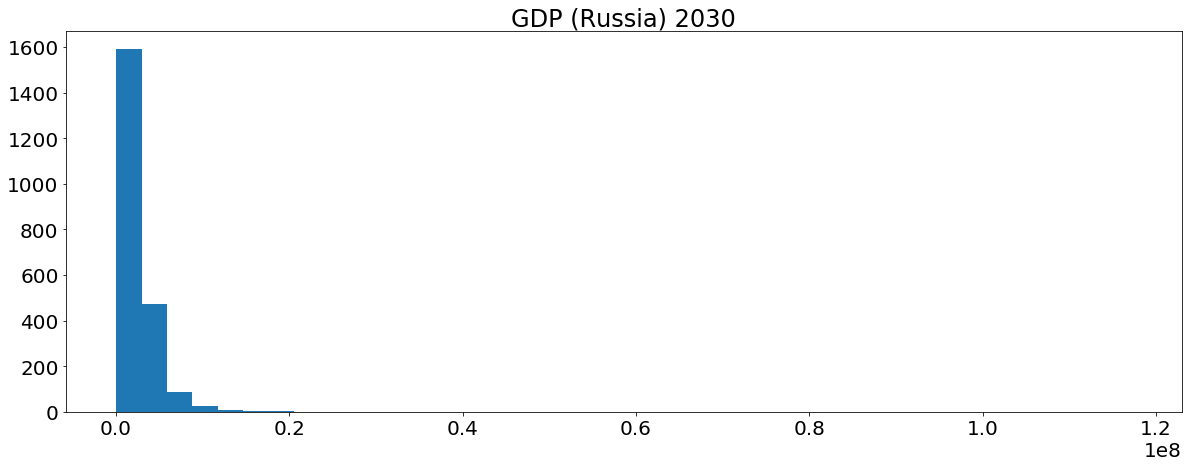

In [66]:
plt.figure(figsize=(20,7))
plt.hist(dfr1.GDP,40,weights=dfr1.prob)
plt.title('GDP (Russia) 2030')
plt.show()

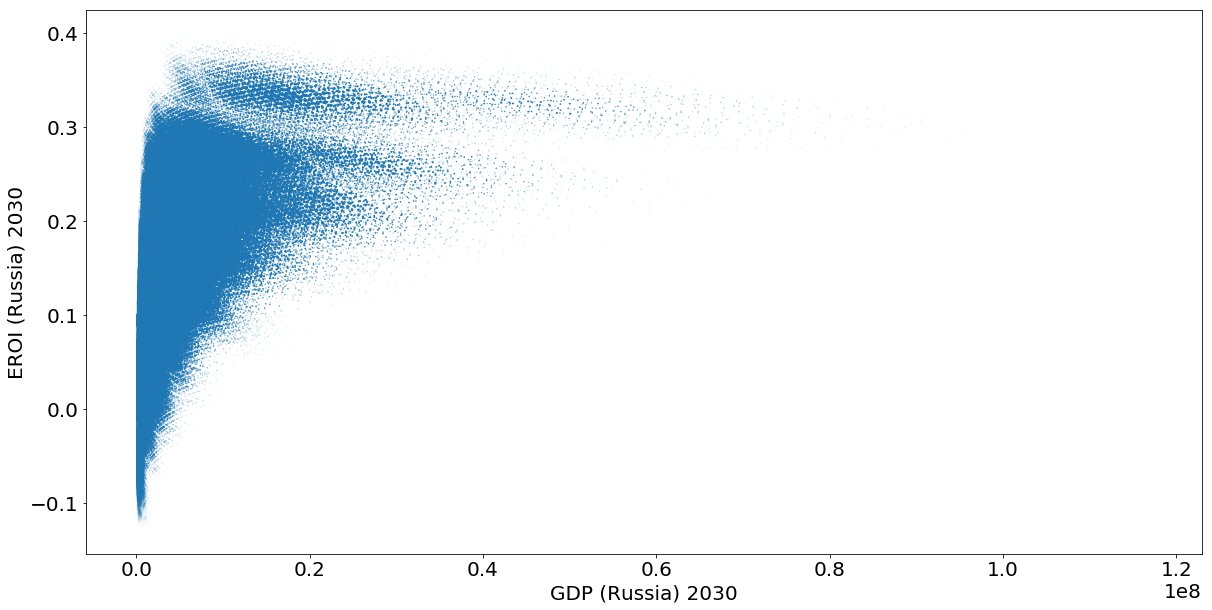

In [67]:
plt.figure(figsize=(20,10))
plt.scatter(dfr1.GDP,dfr1.EROI,dfr1.prob*1000)
plt.xlabel('GDP (Russia) 2030')
plt.ylabel('EROI (Russia) 2030')
plt.show()

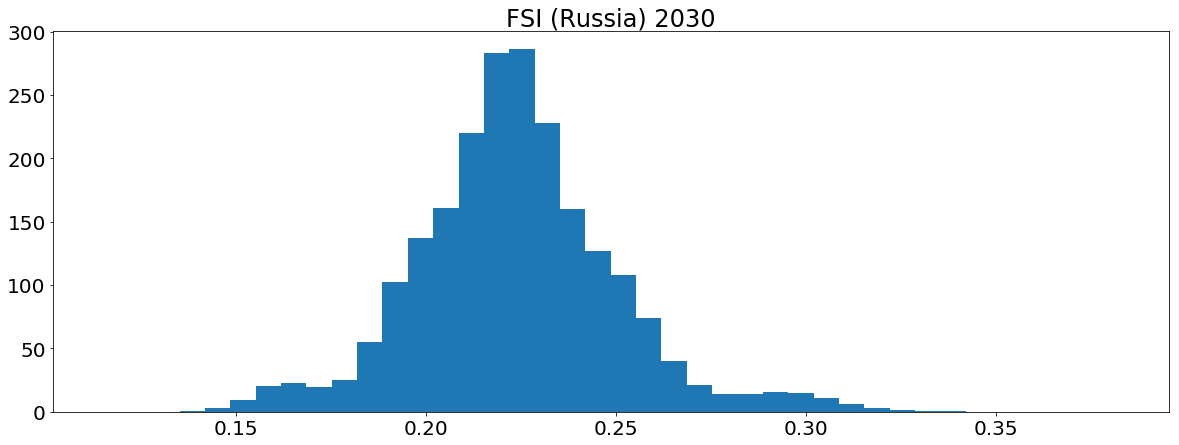

In [68]:
plt.figure(figsize=(20,7))
plt.hist(dfr1.FSI,40,weights=dfr1.prob)
plt.title('FSI (Russia) 2030')
plt.show()

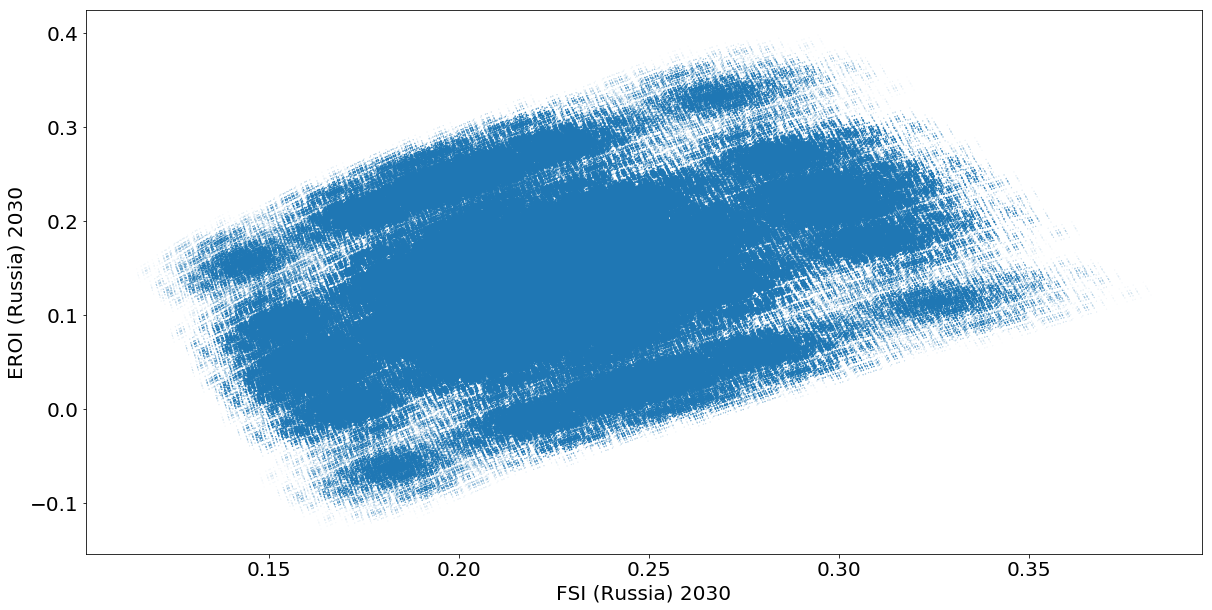

In [69]:
plt.figure(figsize=(20,10))
plt.scatter(dfr1.FSI,dfr1.EROI,dfr1.prob*1000)
plt.xlabel('FSI (Russia) 2030')
plt.ylabel('EROI (Russia) 2030')
plt.show()

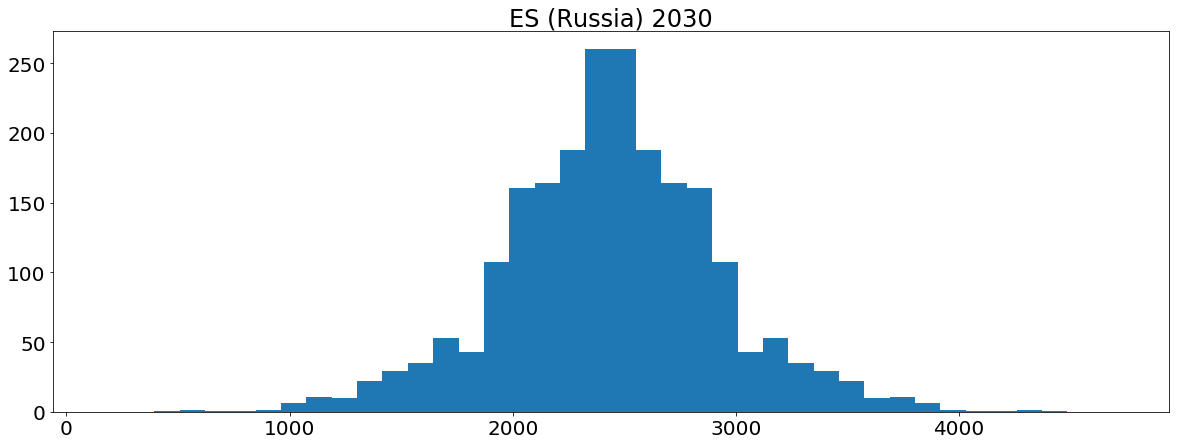

In [70]:
plt.figure(figsize=(20,7))
plt.hist(dfr1.ES,40,weights=dfr1.prob)
plt.title('ES (Russia) 2030')
plt.show()

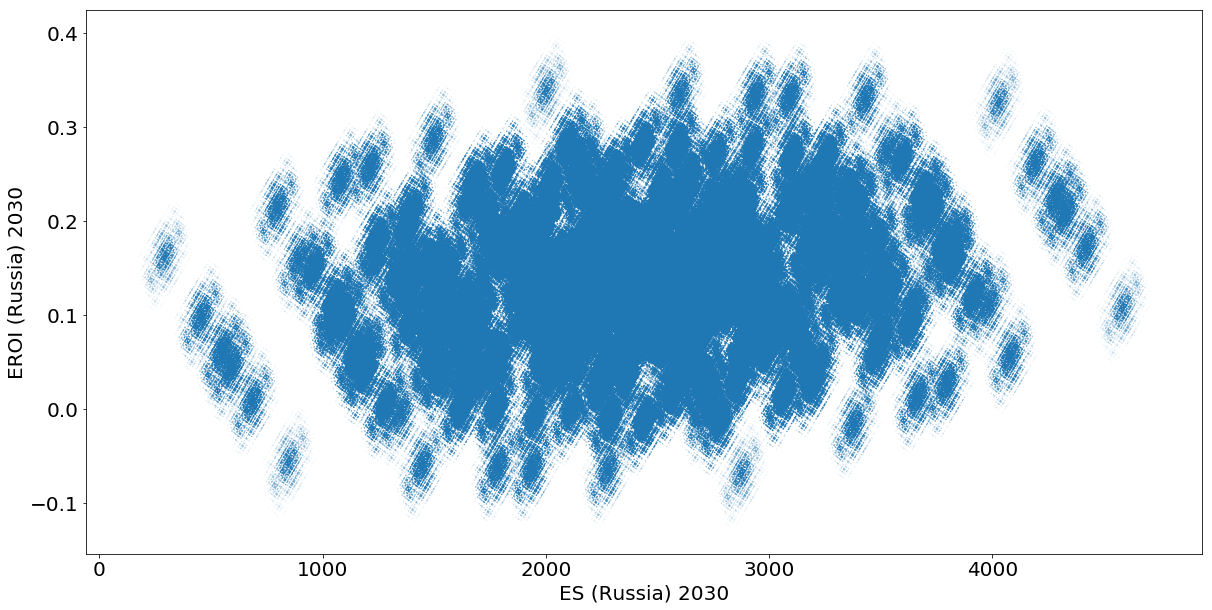

In [71]:
plt.figure(figsize=(20,10))
plt.scatter(dfr1.ES,dfr1.EROI,dfr1.prob*1000)
plt.xlabel('ES (Russia) 2030')
plt.ylabel('EROI (Russia) 2030')
plt.show()

In [72]:
meroi=[]
msgh=[]
mfsi=[]
mes=[]
mgdp=[]
for el in range(2017,2031):
    dfc1=dfr[dfr.year==el]
    eroi=np.sum(dfc1.EROI*dfc1.prob)/np.sum(dfc1.prob)
    seroi=np.sqrt(np.sum(((dfc1.EROI-eroi)**2)*dfc1.prob)/np.sum(dfc1.prob))
    meroi.append([eroi,seroi])
    sgh=np.sum(dfc1.SGR*dfc1.prob)/np.sum(dfc1.prob)
    ssgh=np.sqrt(np.sum(((dfc1.SGR-sgh)**2)*dfc1.prob)/np.sum(dfc1.prob))
    msgh.append([sgh,ssgh])
    fsi=np.sum(dfc1.FSI*dfc1.prob)/np.sum(dfc1.prob)
    sfsi=np.sqrt(np.sum(((dfc1.FSI-fsi)**2)*dfc1.prob)/np.sum(dfc1.prob))
    mfsi.append([fsi,sfsi])
    es=np.sum(dfc1.ES*dfc1.prob)/np.sum(dfc1.prob)
    ses=np.sqrt(np.sum(((dfc1.ES-es)**2)*dfc1.prob)/np.sum(dfc1.prob))
    mes.append([es,ses])
    gdp=np.sum(dfc1.GDP*dfc1.prob)/np.sum(dfc1.prob)
    sgdp=np.sqrt(np.sum(((dfc1.GDP-gdp)**2)*dfc1.prob)/np.sum(dfc1.prob))
    mgdp.append([gdp,sgdp])

In [88]:
peroi=pd.DataFrame(meroi,columns=['EROI','sEROI'],index=list(map(lambda x: datetime(x,1,1,0,0,0),range(2017,2031))))
psgh=pd.DataFrame(msgh,columns=['SGR','sSGR'],index=list(map(lambda x: datetime(x,1,1,0,0,0),range(2017,2031))))
pfsi=pd.DataFrame(mfsi,columns=['FSI','sFSI'],index=list(map(lambda x: datetime(x,1,1,0,0,0),range(2017,2031))))
pes=pd.DataFrame(mes,columns=['ES','sES'],index=list(map(lambda x: datetime(x,1,1,0,0,0),range(2017,2031))))
pgdp=pd.DataFrame(mgdp,columns=['GDP','sGDP'],index=list(map(lambda x: datetime(x,1,1,0,0,0),range(2017,2031))))


In [89]:
pgdp['mmm']=np.array(list(map(lambda x: 0 if x<0 else x,pgdp.GDP-2*pgdp.sGDP)))
pgdp.mmm

2017-01-01    893376.775763
2018-01-01    583401.406208
2019-01-01    446233.638148
2020-01-01    595298.668264
2021-01-01    376875.735251
2022-01-01    297683.216160
2023-01-01    235108.923129
2024-01-01    163289.542699
2025-01-01     37582.754154
2026-01-01         0.000000
2027-01-01         0.000000
2028-01-01         0.000000
2029-01-01         0.000000
2030-01-01         0.000000
Name: mmm, dtype: float64

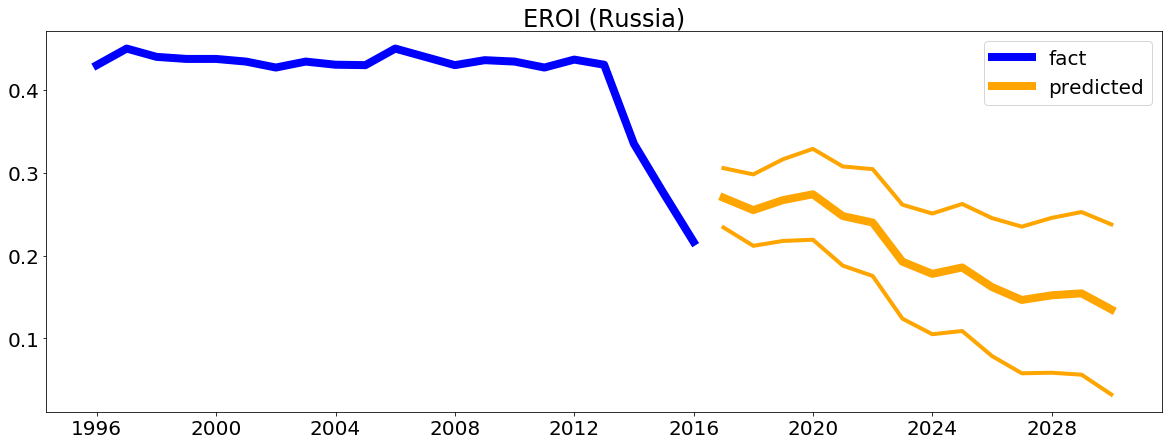

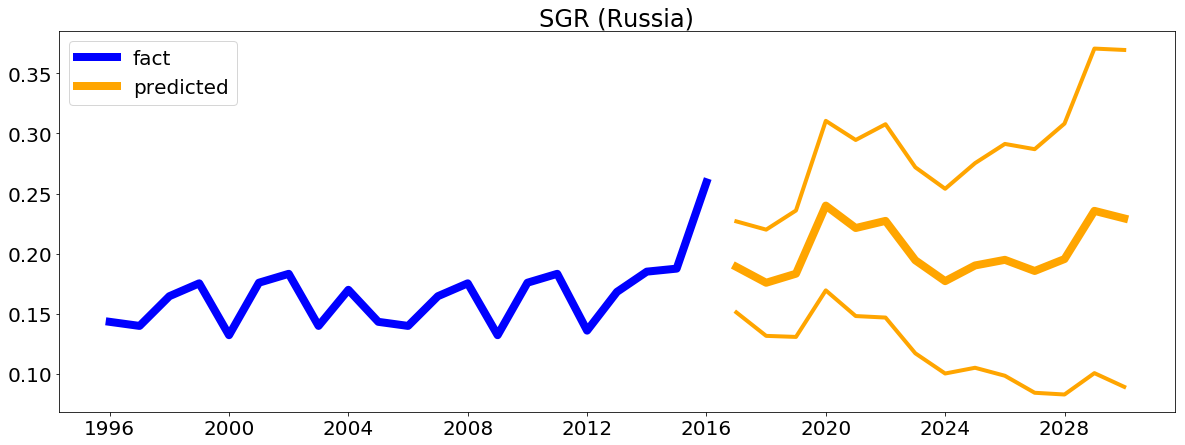

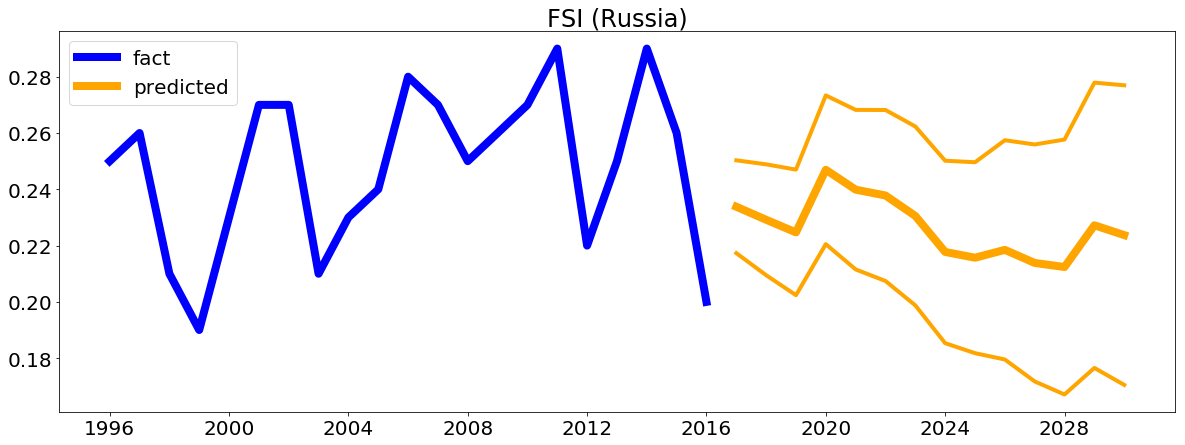

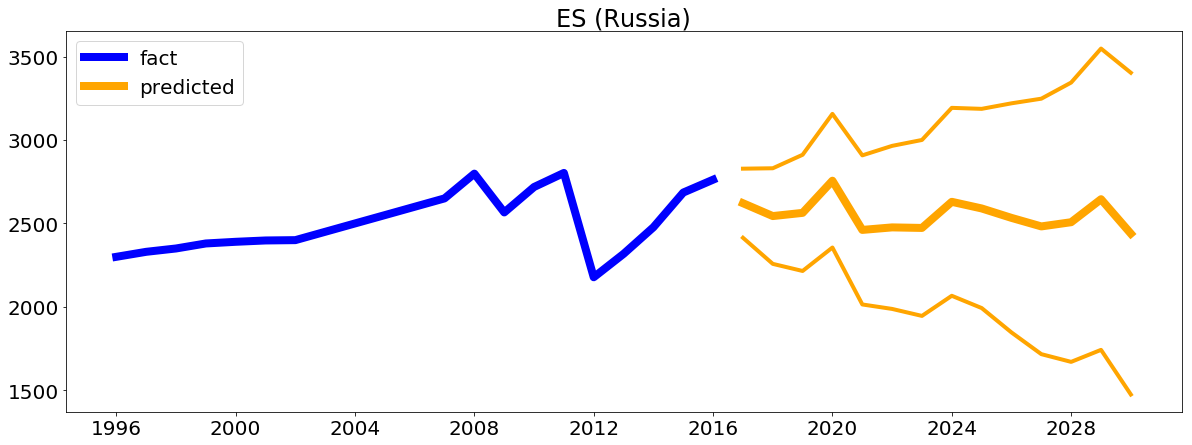

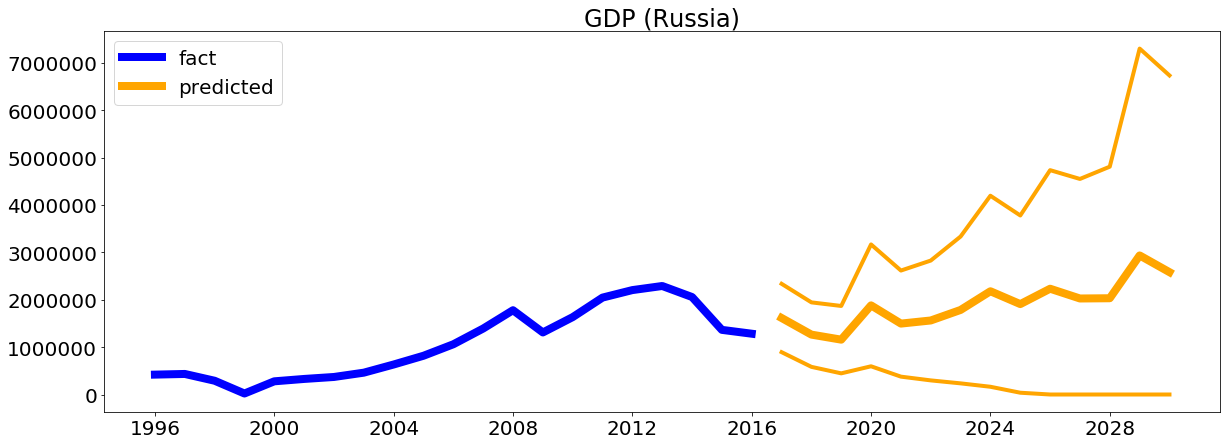

In [90]:
plt.rcParams['font.size'] = 20
plt.figure(figsize=(20,7))
plt.plot(srf1.EROI,linewidth=8,color='blue')
plt.plot(peroi.EROI,linewidth=8,color='orange')
plt.plot(peroi.EROI+2*peroi.sEROI,linewidth=4,color='orange')
plt.plot(peroi.EROI-2*peroi.sEROI,linewidth=4,color='orange')
plt.title('EROI (Russia)')
plt.legend(['fact','predicted'])
plt.show()
plt.figure(figsize=(20,7))
plt.plot(srf1.SGR,linewidth=8,color='blue')
plt.plot(psgh.SGR,linewidth=8,color='orange')
plt.plot(psgh.SGR+2*psgh.sSGR,linewidth=4,color='orange')
plt.plot(psgh.SGR-2*psgh.sSGR,linewidth=4,color='orange')
plt.title('SGR (Russia)')
plt.legend(['fact','predicted'])
plt.show()
plt.figure(figsize=(20,7))
plt.plot(srf1.FSI,linewidth=8,color='blue')
plt.plot(pfsi.FSI,linewidth=8,color='orange')
plt.plot(pfsi.FSI+2*pfsi.sFSI,linewidth=4,color='orange')
plt.plot(pfsi.FSI-2*pfsi.sFSI,linewidth=4,color='orange')
plt.title('FSI (Russia)')
plt.legend(['fact','predicted'])
plt.show()
plt.figure(figsize=(20,7))
plt.plot(srf1.ES,linewidth=8,color='blue')
plt.plot(pes.ES,linewidth=8,color='orange')
plt.plot(pes.ES+2*pes.sES,linewidth=4,color='orange')
plt.plot(pes.ES-2*pes.sES,linewidth=4,color='orange')
plt.title('ES (Russia)')
plt.legend(['fact','predicted'])
plt.show()
plt.figure(figsize=(20,7))
plt.plot(srf1.GDP,linewidth=8,color='blue')
plt.plot(pgdp.GDP,linewidth=8,color='orange')
pgdp['mGDP']=np.array(list(map(lambda x: 0 if x<0 else x,pgdp.GDP-2*pgdp.sGDP)))
plt.plot(pgdp.GDP+2*pgdp.sGDP,linewidth=4,color='orange')
plt.plot(pgdp.mGDP,linewidth=4,color='orange')
plt.title('GDP (Russia)')
plt.legend(['fact','predicted'])
plt.show()

In [93]:
it=itertools.product(np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),
                     np.arange(0.1,1,0.4),np.arange(0.1,1,0.4),np.arange(0.1,1,0.4))
ll=3**7
ii=0
pii=0.01
ssl=list(map(lambda x: 'lower c'+str(x+1),range(7)))
ssu=list(map(lambda x: 'upper c'+str(x+1),range(7)))
ssp=list(map(lambda x: 'prob c'+str(x+1),range(7)))
it2=list(itertools.product(['lower c1','upper c1'],['lower c2','upper c2'],['lower c3','upper c3'],['lower c4','upper c4'],
                          ['lower c5','upper c5'],['lower c6','upper c6'],['lower c7','upper c7']))
clmns=list(map(lambda x: 'c'+str(x+1),range(7)))
yrs=np.array([range(2017,2031)]).T
mmm=np.zeros((0,36))
for rr in it:
    rrs=np.array([[np.product(rr)]*14]).T
    ii+=1
#    print(ii)    
    res_lo= models_c[0].conf_int(alpha=rr[0])
    for el in range(1,7):
        res_lo[ssl[el]]= models_c[el].conf_int(alpha=rr[el])[ssl[el]]
        res_lo[ssu[el]]= models_c[el].conf_int(alpha=rr[el])[ssu[el]]
    mm1=np.zeros((0,36))
    for el in it2:
        mm1=np.vstack((mm1,np.hstack((mms.inverse_transform(mdl.inverse_transform(res_lo[list(el)])),yrs,rrs))))
    mmm=np.vstack((mmm,mm1))
    del mm1
mmm

array([[ 3.70545237e+00,  1.21550346e+00, -2.48668804e+00, ...,
         1.42155412e+00,  2.01700000e+03,  1.00000000e-07],
       [ 3.72671902e+00,  1.38011945e+00, -2.50889083e+00, ...,
         1.49453781e+00,  2.01800000e+03,  1.00000000e-07],
       [ 3.74518589e+00,  1.50001564e+00, -2.52919782e+00, ...,
         1.53599642e+00,  2.01900000e+03,  1.00000000e-07],
       ...,
       [ 3.76921623e+00,  1.69636764e+00, -4.20777990e+00, ...,
         1.53004588e+00,  2.02800000e+03,  4.78296900e-01],
       [ 3.77683928e+00,  1.74579881e+00, -4.29615535e+00, ...,
         1.54942173e+00,  2.02900000e+03,  4.78296900e-01],
       [ 3.78446127e+00,  1.79449094e+00, -4.38173779e+00, ...,
         1.56864444e+00,  2.03000000e+03,  4.78296900e-01]])

In [94]:
mmm1=mmm.T
del mmm
for num,el in enumerate(srf1.columns):
    mmm1[num]= (mmm1[num] if preobr[el]==0 else np.exp(mmm1[num]) if preobr[el]==1 else 
        ((np.exp(mmm1[num])/(1+ np.exp(mmm1[num]))-0.01)/0.98))
mmm=mmm1.T
del mmm1


In [95]:
dfc=pd.DataFrame(mmm,columns=list(scf2.columns)+['year','prob'])
dfc.head()

GINI       HDI        ER  Footprint  Biocapacity           GDP  \
0  40.668440  0.776807  0.083185   1.013687     1.775499  2.129018e+07   
1  41.542584  0.805112  0.081358   0.923180     1.676243  4.086197e+07   
2  42.316873  0.824058  0.079723   0.861682     1.603533  6.460496e+07   
3  43.040305  0.840817  0.073786   0.824052     1.568182  1.071060e+08   
4  43.729306  0.854582  0.067333   0.796922     1.548077  1.698363e+08   

   GDP_growth  GDP_per_capita  GDP_Annual_growth  Energy_Intensity_index  \
0    0.057700       -7.678507           0.062171                4.968882   
1    0.059262      -35.533568           0.127967                3.733928   
2    0.060845      -74.825473           0.177872                2.864357   
3    0.061335     -111.486561           0.226080                2.003188   
4    0.062190     -149.223270           0.268150                1.221253   

       ...            EBIT      WACC        RG       NPG       NAG        FL  \
0      ...       13.955777  0.133818  0.090032 -0.344640  0.026960  0.588751   
1      ...       17.978924  0.026294  0.060501 -0.482821  0.047994  0.682012   
2      ...       20.555510 -0.036948  0.047184 -0.563890  0.061487  0.745326   
3      ...       22.074485 -0.083537  0.042920 -0.594925  0.074910  0.790509   
4      ...       23.379776 -0.121790  0.031686 -0.624797  0.086118  0.821846   

        DOL       DER    year          prob  
0 -1.188129  1.421554  2017.0  1.000000e-07  
1  0.143628  1.494538  2018.0  1.000000e-07  
2  1.009106  1.535996  2019.0  1.000000e-07  
3  1.866477  1.574770  2020.0  1.000000e-07  
4  2.584019  1.612462  2021.0  1.000000e-07  

[5 rows x 36 columns]

In [96]:
del mmm

In [ ]:
dfc.to_csv('china_progn.csv',index=False,sep=';')

In [97]:
dfc1=dfc[dfc.year==2030]

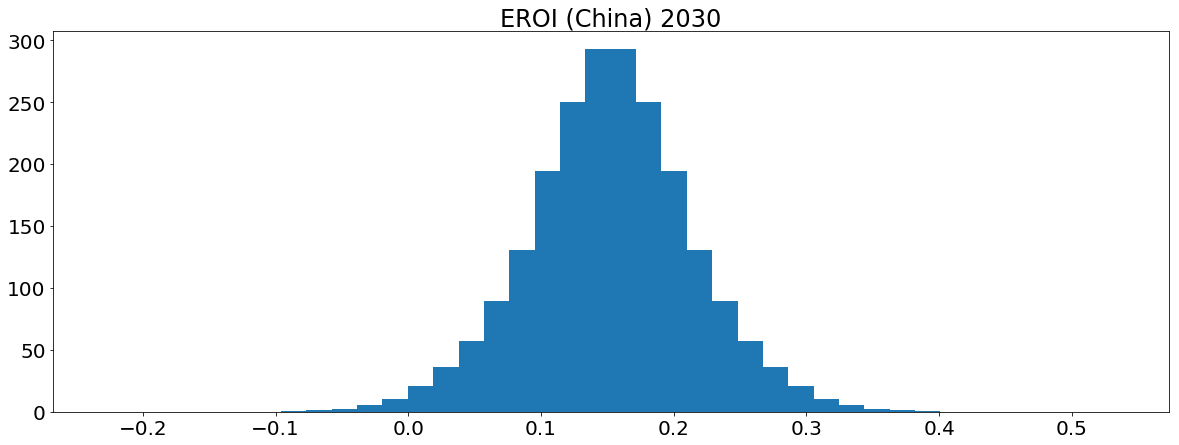

In [98]:
plt.figure(figsize=(20,7))
plt.hist(dfc1.EROI,40,weights=dfc1.prob)
plt.title('EROI (China) 2030')

plt.show()

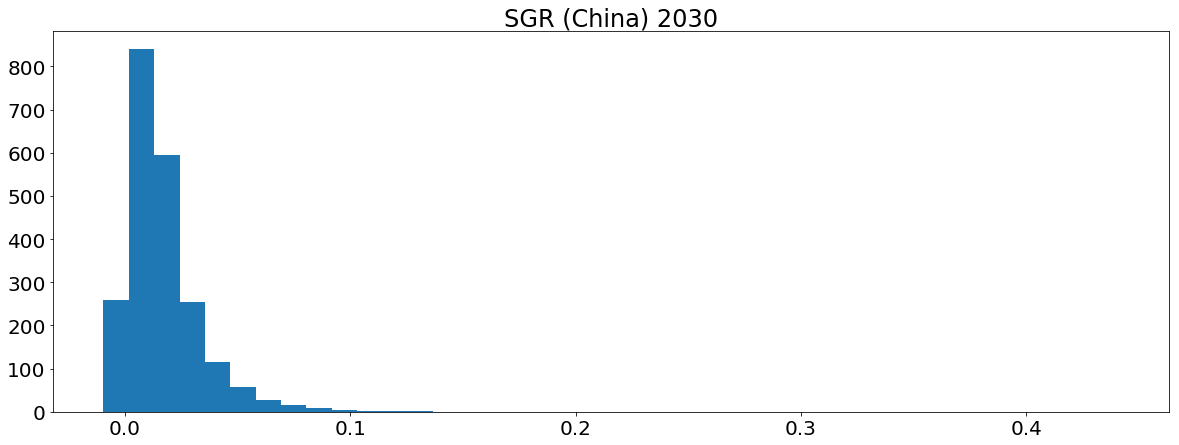

In [99]:
plt.figure(figsize=(20,7))
plt.hist(dfc1.SGR,40,weights=dfc1.prob)
plt.title('SGR (China) 2030')

plt.show()

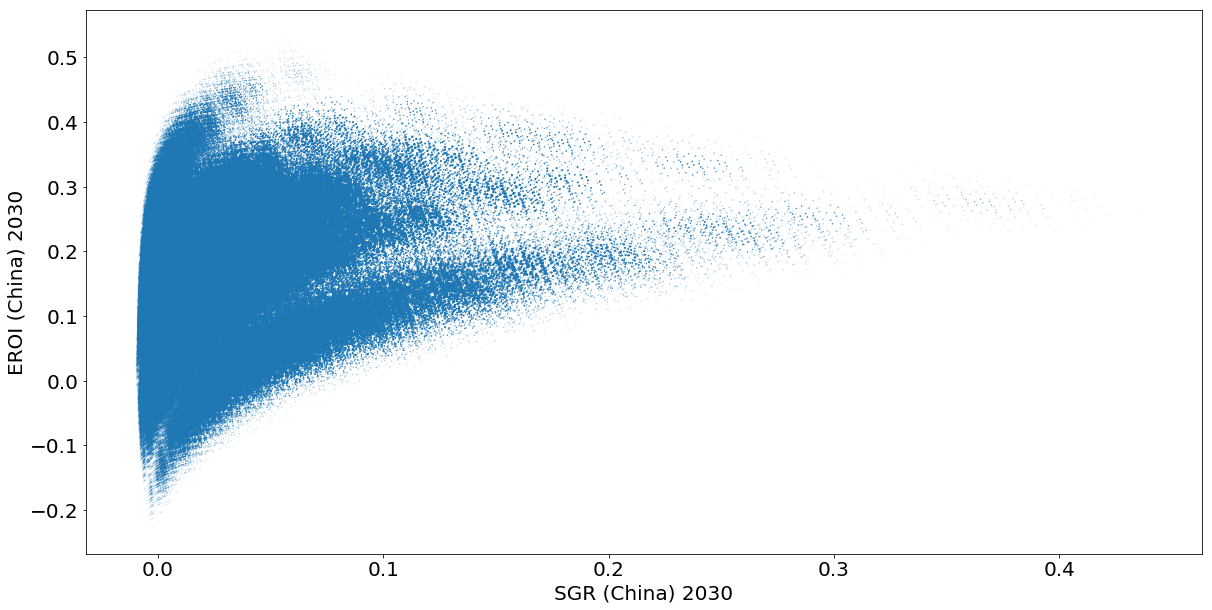

In [100]:
plt.figure(figsize=(20,10))
plt.scatter(dfc1.SGR,dfc1.EROI,dfc1.prob*1000)
plt.xlabel('SGR (China) 2030')
plt.ylabel('EROI (China) 2030')

plt.show()

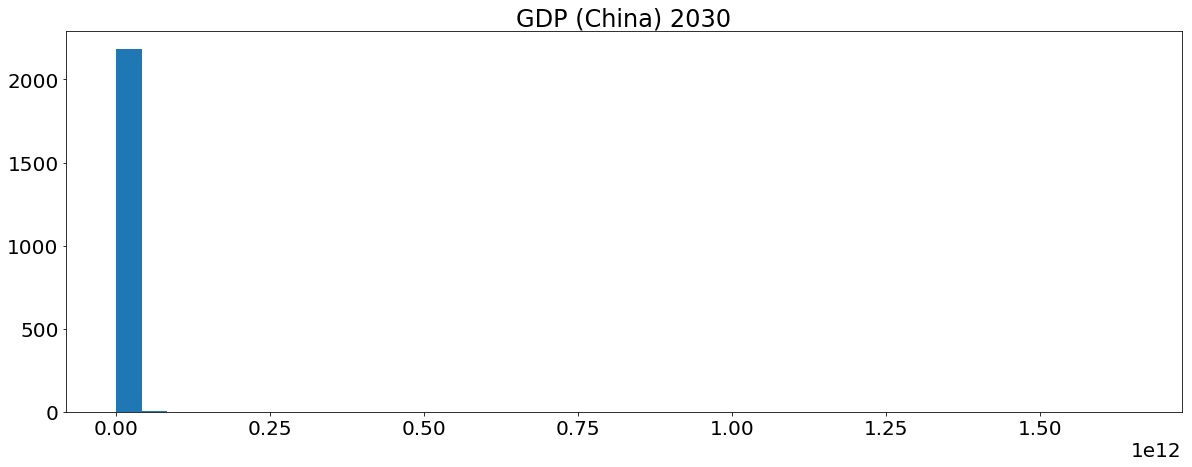

In [101]:
plt.figure(figsize=(20,7))
plt.hist(dfc1.GDP,40,weights=dfc1.prob)
plt.title('GDP (China) 2030')

plt.show()

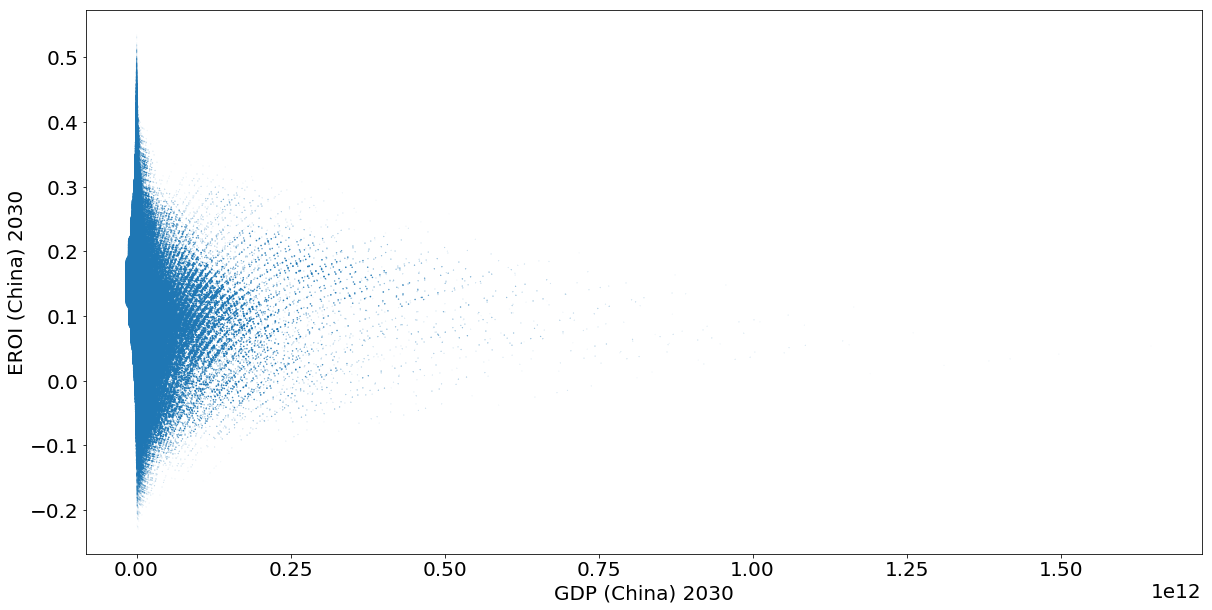

In [102]:
plt.figure(figsize=(20,10))
plt.scatter(dfc1.GDP,dfc1.EROI,dfc1.prob*1000)
plt.xlabel('GDP (China) 2030')
plt.ylabel('EROI (China) 2030')

plt.show()

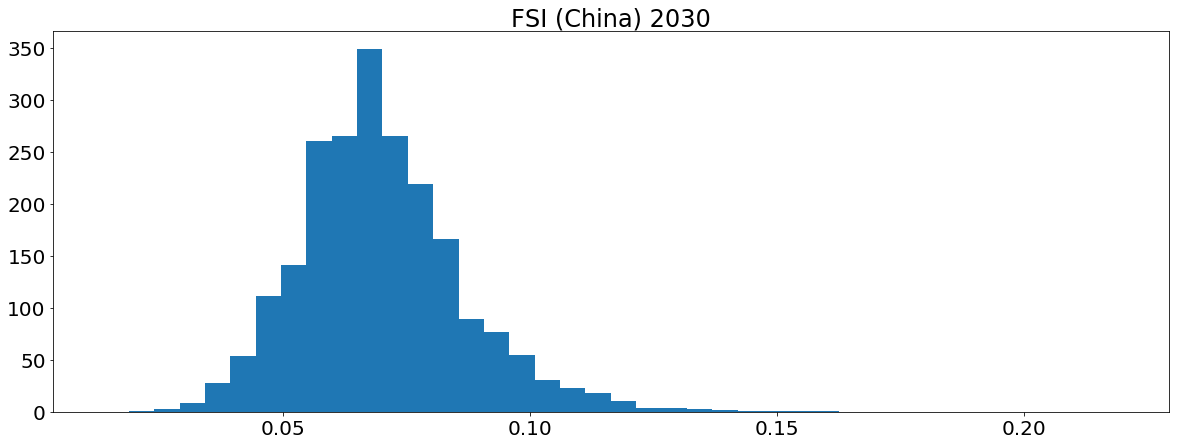

In [103]:
plt.figure(figsize=(20,7))
plt.hist(dfc1.FSI,40,weights=dfc1.prob)
plt.title('FSI (China) 2030')

plt.show()

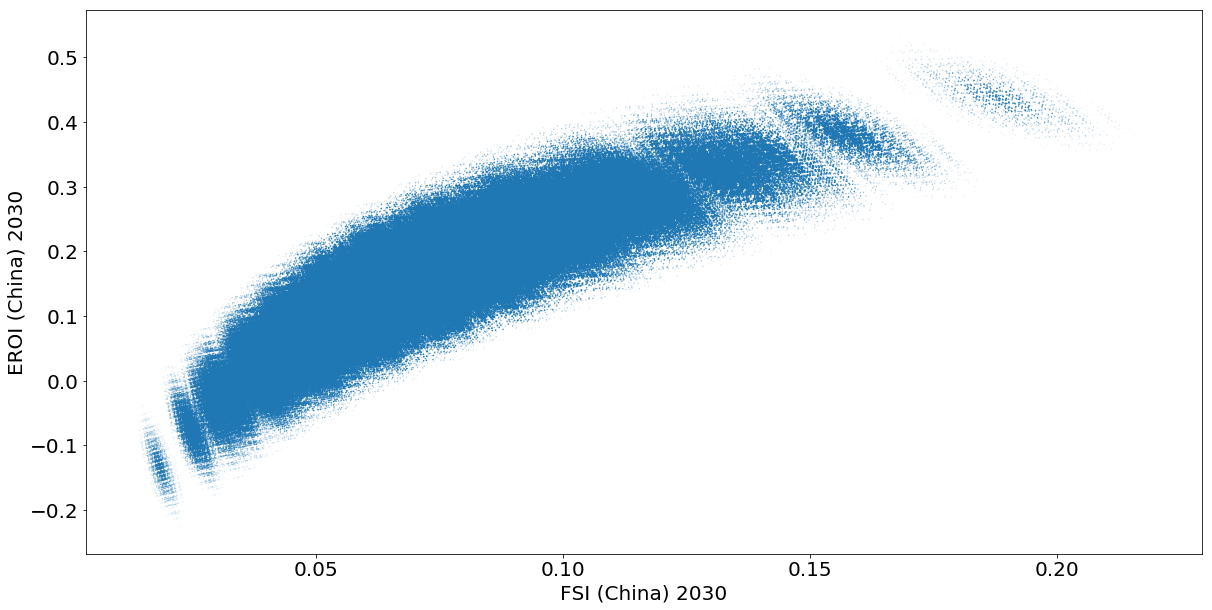

In [104]:
plt.figure(figsize=(20,10))
plt.scatter(dfc1.FSI,dfc1.EROI,dfc1.prob*1000)
plt.xlabel('FSI (China) 2030')
plt.ylabel('EROI (China) 2030')

plt.show()

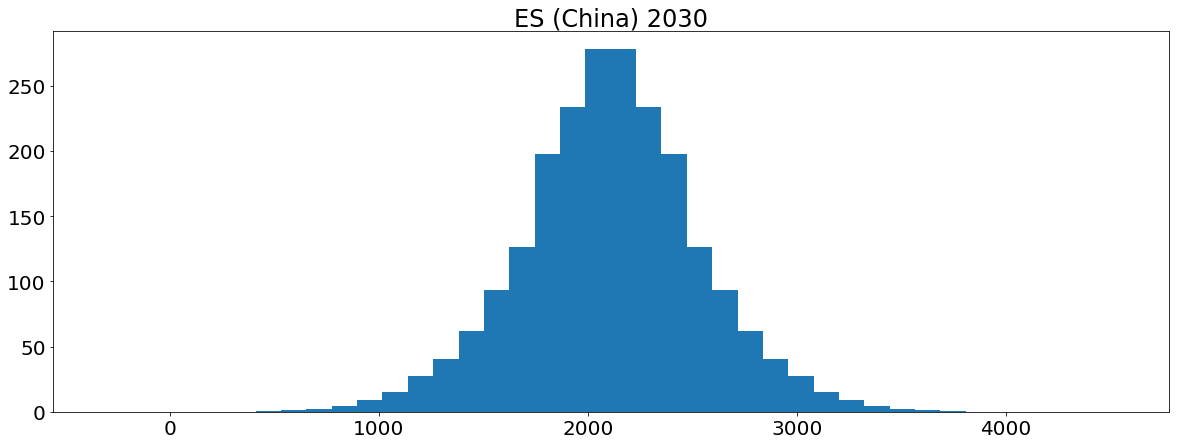

In [105]:
plt.figure(figsize=(20,7))
plt.hist(dfc1.ES,40,weights=dfc1.prob)
plt.title('ES (China) 2030')

plt.show()

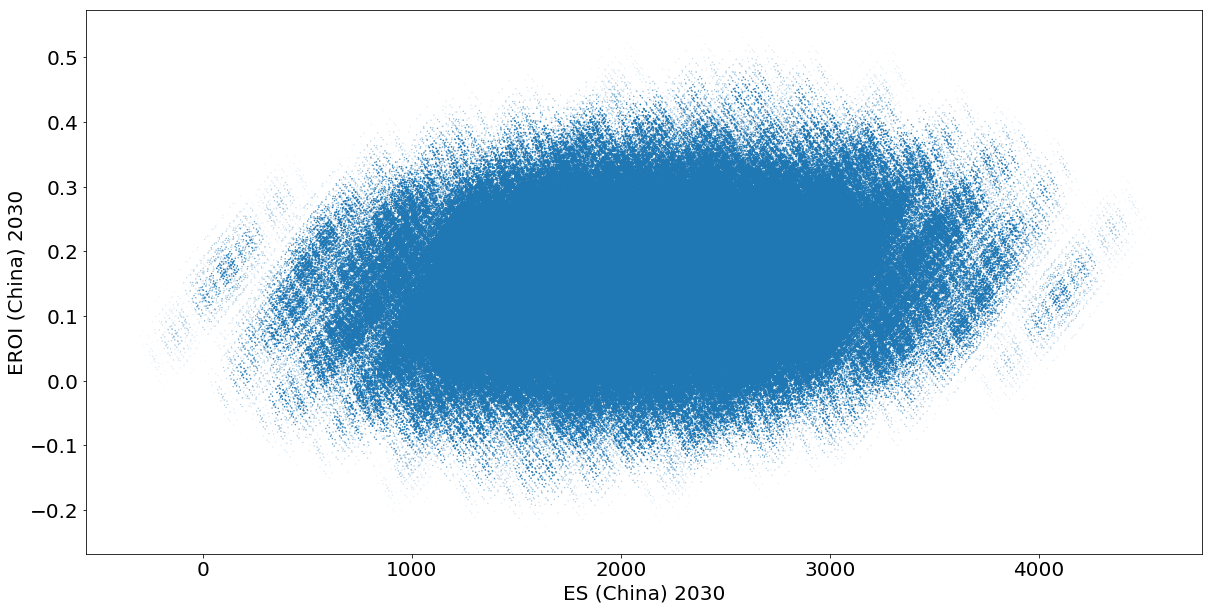

In [106]:
plt.figure(figsize=(20,10))
plt.scatter(dfc1.ES,dfc1.EROI,dfc1.prob*1000)
plt.xlabel('ES (China) 2030')
plt.ylabel('EROI (China) 2030')

plt.show()

In [107]:
meroi=[]
msgh=[]
mfsi=[]
mes=[]
mgdp=[]
for el in range(2017,2031):
    dfc1=dfc[dfc.year==el]
    eroi=np.sum(dfc1.EROI*dfc1.prob)/np.sum(dfc1.prob)
    seroi=np.sqrt(np.sum(((dfc1.EROI-eroi)**2)*dfc1.prob)/np.sum(dfc1.prob))
    meroi.append([eroi,seroi])
    sgh=np.sum(dfc1.SGR*dfc1.prob)/np.sum(dfc1.prob)
    ssgh=np.sqrt(np.sum(((dfc1.SGR-sgh)**2)*dfc1.prob)/np.sum(dfc1.prob))
    msgh.append([sgh,ssgh])
    fsi=np.sum(dfc1.FSI*dfc1.prob)/np.sum(dfc1.prob)
    sfsi=np.sqrt(np.sum(((dfc1.FSI-fsi)**2)*dfc1.prob)/np.sum(dfc1.prob))
    mfsi.append([fsi,sfsi])
    es=np.sum(dfc1.ES*dfc1.prob)/np.sum(dfc1.prob)
    ses=np.sqrt(np.sum(((dfc1.ES-es)**2)*dfc1.prob)/np.sum(dfc1.prob))
    mes.append([es,ses])
    gdp=np.sum(dfc1.GDP*dfc1.prob)/np.sum(dfc1.prob)
    sgdp=np.sqrt(np.sum(((dfc1.GDP-gdp)**2)*dfc1.prob)/np.sum(dfc1.prob))
    mgdp.append([gdp,sgdp])

In [108]:
peroi=pd.DataFrame(meroi,columns=['EROI','sEROI'],index=list(map(lambda x: datetime(x,1,1,0,0,0),range(2017,2031))))
peroi.head()

EROI     sEROI
2017-01-01  0.117331  0.020298
2018-01-01  0.122806  0.026484
2019-01-01  0.128752  0.031533
2020-01-01  0.132349  0.035888
2021-01-01  0.133959  0.039771

In [109]:
psgh=pd.DataFrame(msgh,columns=['SGR','sSGR'],index=list(map(lambda x: datetime(x,1,1,0,0,0),range(2017,2031))))
pfsi=pd.DataFrame(mfsi,columns=['FSI','sFSI'],index=list(map(lambda x: datetime(x,1,1,0,0,0),range(2017,2031))))
pes=pd.DataFrame(mes,columns=['ES','sES'],index=list(map(lambda x: datetime(x,1,1,0,0,0),range(2017,2031))))
pgdp=pd.DataFrame(mgdp,columns=['GDP','sGDP'],index=list(map(lambda x: datetime(x,1,1,0,0,0),range(2017,2031))))
psgh.head()

SGR      sSGR
2017-01-01  0.008419  0.002664
2018-01-01  0.009522  0.004289
2019-01-01  0.010756  0.005734
2020-01-01  0.011117  0.006856
2021-01-01  0.011254  0.007824

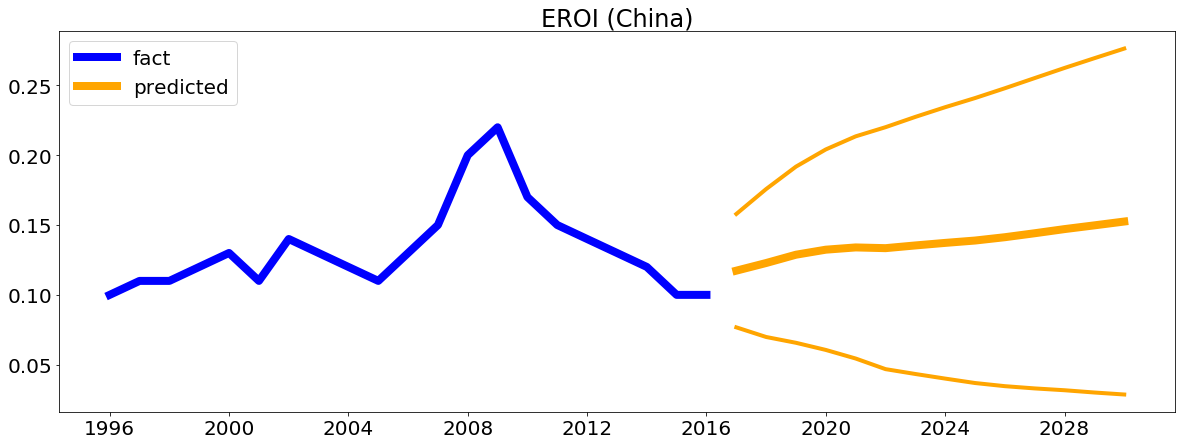

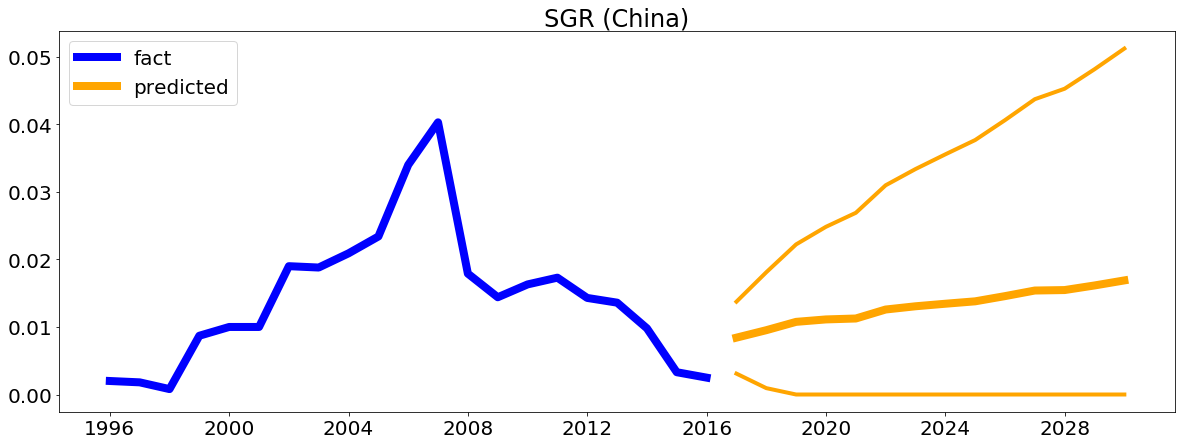

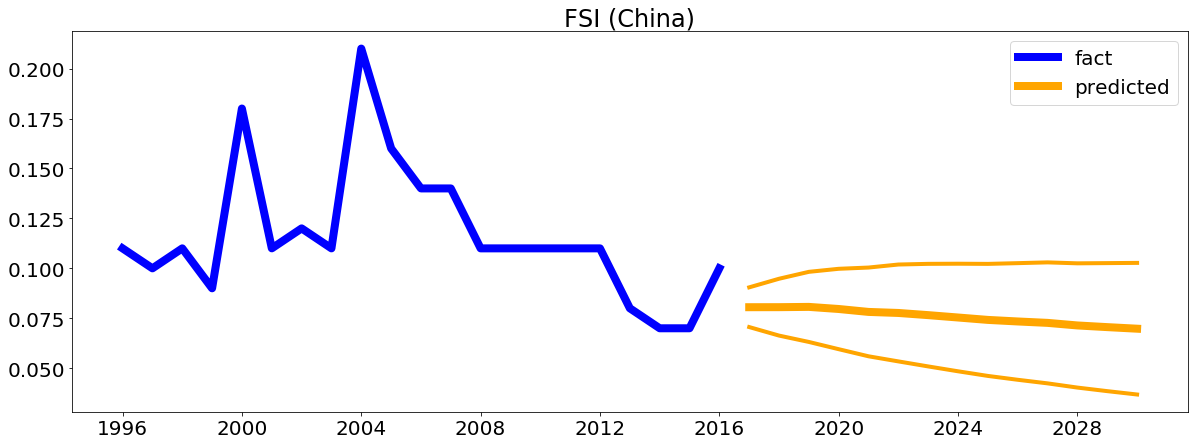

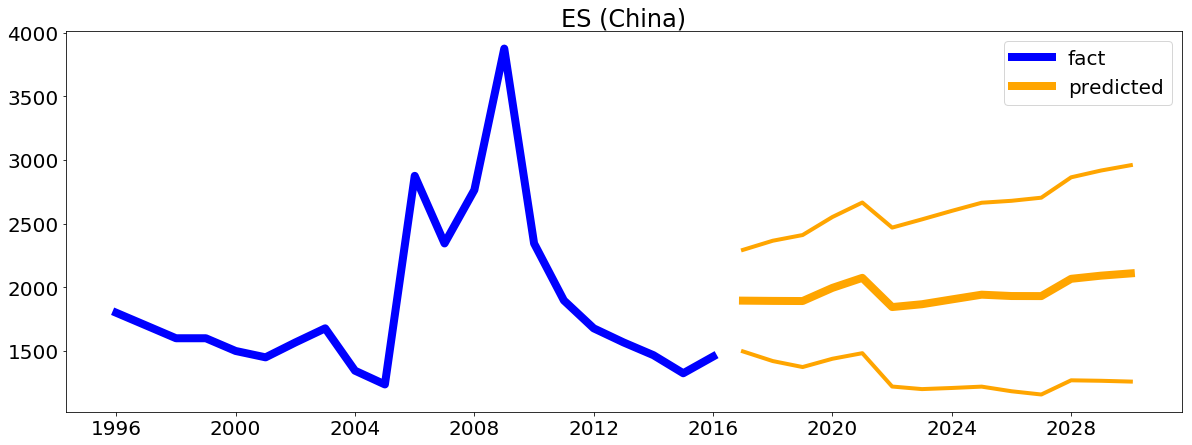

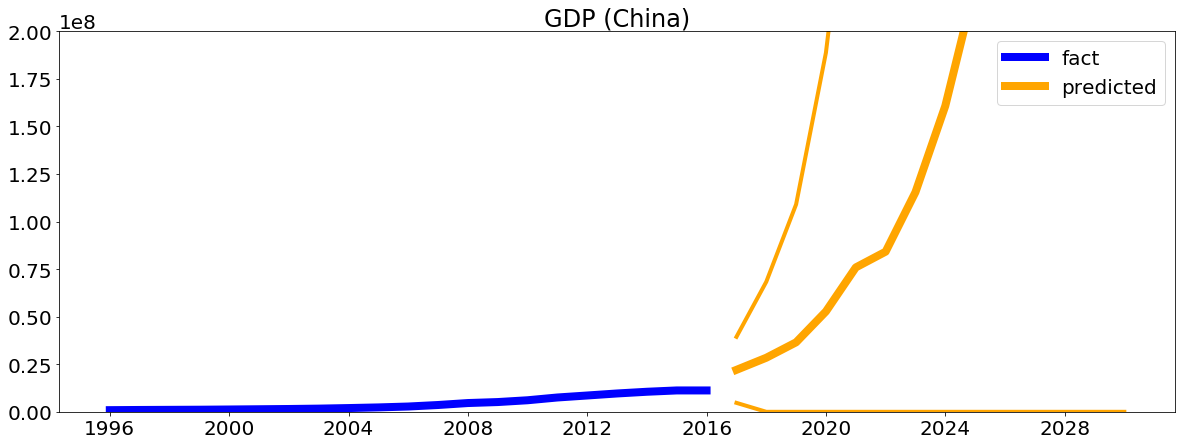

In [115]:
plt.rcParams['font.size'] = 20
plt.figure(figsize=(20,7))
plt.plot(scf1.EROI,linewidth=8,color='blue')
plt.plot(peroi.EROI,linewidth=8,color='orange')
plt.plot(peroi.EROI+2*peroi.sEROI,linewidth=4,color='orange')
plt.plot(peroi.EROI-2*peroi.sEROI,linewidth=4,color='orange')
plt.title('EROI (China)')
plt.legend(['fact','predicted'])
plt.show()
plt.figure(figsize=(20,7))
plt.plot(scf1.SGR,linewidth=8,color='blue')
plt.plot(psgh.SGR,linewidth=8,color='orange')
plt.plot(psgh.SGR+2*psgh.sSGR,linewidth=4,color='orange')
psgh['mSGR']=np.array(list(map(lambda x: 0 if x<0 else x,psgh.SGR-2*psgh.sSGR)))
plt.plot(psgh.mSGR,linewidth=4,color='orange')
plt.title('SGR (China)')
plt.legend(['fact','predicted'])
plt.show()
plt.figure(figsize=(20,7))
plt.plot(scf1.FSI,linewidth=8,color='blue')
plt.plot(pfsi.FSI,linewidth=8,color='orange')
plt.plot(pfsi.FSI+2*pfsi.sFSI,linewidth=4,color='orange')
plt.plot(pfsi.FSI-2*pfsi.sFSI,linewidth=4,color='orange')
plt.title('FSI (China)')
plt.legend(['fact','predicted'])
plt.show()
plt.figure(figsize=(20,7))
plt.plot(scf1.ES,linewidth=8,color='blue')
plt.plot(pes.ES,linewidth=8,color='orange')
plt.plot(pes.ES+2*pes.sES,linewidth=4,color='orange')
plt.plot(pes.ES-2*pes.sES,linewidth=4,color='orange')
plt.title('ES (China)')
plt.legend(['fact','predicted'])
plt.show()
plt.figure(figsize=(20,7))
plt.ylim((0,200000000))
plt.plot(scf1.GDP,linewidth=8,color='blue')
plt.plot(pgdp.GDP,linewidth=8,color='orange')
pgdp['mGDP']=np.array(list(map(lambda x: 0 if x<0 else x,pgdp.GDP-2*pgdp.sGDP)))
plt.plot(pgdp.GDP+2*pgdp.sGDP,linewidth=4,color='orange')
plt.plot(pgdp.mGDP,linewidth=4,color='orange')
plt.title('GDP (China)')
plt.legend(['fact','predicted'])
plt.show()